# Default of credit card clients

### Objectives

    This research aimed at the case of customers default payments in Taiwan and compares the predictive accuracy of probability of default in September month.



- Loading the data
- Preprocessing the data
- Explore features or charecteristics to predict default of credit card clients
- Develop prediction models
- Evaluate and refine prediction models

In [62]:
# #load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

#misc libraries
import random
import time

import pickle

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)


Python version: 3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
pandas version: 1.4.4
matplotlib version: 3.5.2
NumPy version: 1.21.5
SciPy version: 1.9.1
IPython version: 7.31.1
scikit-learn version: 1.2.2
-------------------------


In [2]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegressionCV

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import roc_auc_score

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.width', 75)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 30)

#### Read Data

We use pandas.read_csv() function to read the csv file. In the bracket, we put the file path along with a quotation mark, so that pandas will read the file into a data frame from that address. The file path can be either an URL or your local file address.

Because the data has first row has header, we can add an argument headers = 1 inside the read_csv() method, so that pandas will automatically set the first row as a header.
You can also assign the dataset to any variable you create.

The dataset can be downloaded from [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls)

In [3]:
# load the data and read sample 
df = pd.read_excel("default_of_credit_card_clients.xls",header= 1)
df.sample(7)

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  \
5084    5085     140000    1          3         1   45      2      2   
24720  24721     300000    1          2         2   29      0      0   
563      564     360000    1          2         2   38     -1      0   
9098    9099     130000    2          1         1   37      2      2   
8853    8854      50000    2          2         2   29      0      0   
25837  25838      60000    2          2         2   31      2      2   
11343  11344      50000    1          2         2   27      2      0   

       PAY_3  PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
5084       2      2  ...     136280     136247     134089         0   
24720      0      0  ...      51818      50244      49484      5000   
563        0      0  ...      63723      65108      66078      8005   
9098       2      2  ...      45365      46093      47185      3100   
8853       0      0  ...      50686      46805      47220      1866   
25837      2      2  ...      35305      17655      77775         0   
11343      0      0  ...      30963      30505      28696      1600   

       PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
5084      10707      5014      5091      4608        42   
24720      5000      5000      5000      5000      5000   
563        8004      5000      5000      5000    105700   
9098       1500      2000      1600      2000      2000   
8853       1733      1724      1684      2058      1341   
25837      4058        34      3000     40793      4952   
11343      1712      1016      2500         0      2848   

       default payment next month  
5084                            1  
24720                           0  
563                             0  
9098                            1  
8853                            0  
25837                           1  
11343                           1  

[7 rows x 25 columns]

In [4]:
# dataset columns
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'default payment next month'],
      dtype='object')

In [5]:
# Summary of dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [6]:
# check data has any null value
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [7]:
# Ratio between Male and female (1 = male; 2 = female)
df.SEX.value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [8]:
# Check for duplicate ID 
df.ID.value_counts().sum()   #shape of dataset (30000 X 25

30000

## Rename Columns by month

PAY_0 to PAY_6 history of past payment. We tracked the past monthly payment records (from April to September, 2005), similarly for BILL_AMT & PAY_AMT columns respectively.

To change the columns accordingly to respective month to get clear idea of what the features does.  
- PAY_0,	PAY_2,	PAY_3,	PAY_4,	PAY_5,	PAY_6 changed to PAY_September,	PAY_August,	PAY_July,	PAY_June, PAY_May, PAY_April
- BILL_AMT1,	BILL_AMT2,	BILL_AMT3,	BILL_AMT4,	BILL_AMT5,	BILL_AMT6, to BILL_AMT_September,	BILL_AMT_August,	BILL_AMT_July,	BILL_AMT_June,	BILL_AMT_May,	BILL_AMT_April
- PAY_AMT1,	PAY_AMT2,	PAY_AMT3,	PAY_AMT4,	PAY_AMT5,	PAY_AMT6, to PAY_AMT_September,	PAY_AMT_August,	PAY_AMT_July,	PAY_AMT_June,	PAY_AMT_May,	PAY_AMT_April


In [9]:
# Rename all PAY, BILL_AMT & PAY_AMT accoding to info from UCL e.g - data from April to September, 2005
import calendar
mnt = []
for month in range(9, 3,-1):  #print months in reverse order Sept - April
    mnt.append(calendar.month_name[month])
print(mnt)

['September', 'August', 'July', 'June', 'May', 'April']


In [10]:
df_pay = df.iloc[:,6:12].set_axis(mnt, axis='columns')
df_pay = df_pay.add_prefix('PAY_')

In [11]:
# Before Rename
df.iloc[:,6:12].head()

PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6
0      2      2     -1     -1     -2     -2
1     -1      2      0      0      0      2
2      0      0      0      0      0      0
3      0      0      0      0      0      0
4     -1      0     -1      0      0      0

In [12]:
# AFter Rename PAY_ data
df_pay.head()

PAY_September  PAY_August  PAY_July  PAY_June  PAY_May  PAY_April
0              2           2        -1        -1       -2         -2
1             -1           2         0         0        0          2
2              0           0         0         0        0          0
3              0           0         0         0        0          0
4             -1           0        -1         0        0          0

In [13]:
df_bill_amt = df.iloc[:,12:18].set_axis(mnt, axis='columns')
df_bill_amt = df_bill_amt.add_prefix('BILL_AMT_')

In [14]:
df.iloc[:,12:18].head()

BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6
0       3913       3102        689          0          0          0
1       2682       1725       2682       3272       3455       3261
2      29239      14027      13559      14331      14948      15549
3      46990      48233      49291      28314      28959      29547
4       8617       5670      35835      20940      19146      19131

In [15]:
df_bill_amt.head()

BILL_AMT_September  BILL_AMT_August  BILL_AMT_July  BILL_AMT_June  \
0                3913             3102            689              0   
1                2682             1725           2682           3272   
2               29239            14027          13559          14331   
3               46990            48233          49291          28314   
4                8617             5670          35835          20940   

   BILL_AMT_May  BILL_AMT_April  
0             0               0  
1          3455            3261  
2         14948           15549  
3         28959           29547  
4         19146           19131

In [16]:
df_pay_amt = df.iloc[:,18:24].set_axis(mnt, axis='columns')
df_pay_amt = df_pay_amt.add_prefix('PAY_AMT_')

In [17]:
df.iloc[:,18:24].head()

PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6
0         0       689         0         0         0         0
1         0      1000      1000      1000         0      2000
2      1518      1500      1000      1000      1000      5000
3      2000      2019      1200      1100      1069      1000
4      2000     36681     10000      9000       689       679

In [18]:
df_pay_amt.head()

PAY_AMT_September  PAY_AMT_August  PAY_AMT_July  PAY_AMT_June  \
0                  0             689             0             0   
1                  0            1000          1000          1000   
2               1518            1500          1000          1000   
3               2000            2019          1200          1100   
4               2000           36681         10000          9000   

   PAY_AMT_May  PAY_AMT_April  
0            0              0  
1            0           2000  
2         1000           5000  
3         1069           1000  
4          689            679

In [19]:
df2 = df.iloc[:,:6]

In [20]:
y = df.iloc[:,-1:]

In [21]:
dfren = pd.concat([df2,df_pay,df_bill_amt,df_pay_amt,y],axis=1)

In [22]:
dfren.head(5)

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_September  \
0   1      20000    2          2         1   24              2   
1   2     120000    2          2         2   26             -1   
2   3      90000    2          2         2   34              0   
3   4      50000    2          2         1   37              0   
4   5      50000    1          2         1   57             -1   

   PAY_August  PAY_July  PAY_June  ...  BILL_AMT_June  BILL_AMT_May  \
0           2        -1        -1  ...              0             0   
1           2         0         0  ...           3272          3455   
2           0         0         0  ...          14331         14948   
3           0         0         0  ...          28314         28959   
4           0        -1         0  ...          20940         19146   

   BILL_AMT_April  PAY_AMT_September  PAY_AMT_August  PAY_AMT_July  \
0               0                  0             689             0   
1            3261                  0            1000          1000   
2           15549               1518            1500          1000   
3           29547               2000            2019          1200   
4           19131               2000           36681         10000   

   PAY_AMT_June  PAY_AMT_May  PAY_AMT_April  default payment next month  
0             0            0              0                           1  
1          1000            0           2000                           1  
2          1000         1000           5000                           0  
3          1100         1069           1000                           0  
4          9000          689            679                           0  

[5 rows x 25 columns]

In [23]:
# rename the Target column to avoid space/column length
dfren.rename(columns={'default payment next month': 'Target'},inplace=True)

In [24]:
# overall default payment for next Month

print("overall default payment next month",dfren.Target.mean())
print(dfren.Target.value_counts(normalize=True))

overall default payment next month 0.2212
0   0.78
1   0.22
Name: Target, dtype: float64


In [25]:
cat_cols = ['SEX','EDUCATION','MARRIAGE']

In [26]:
# Category data default payment next month
for x in cat_cols:
    if dfren[x].dtype != 'float':
        print('default payment Correlation by :', x)
        print(dfren[[x,'Target']].groupby(x, as_index=True).mean())
        print("-"*20,'\n')


default payment Correlation by : SEX
     Target
SEX        
1      0.24
2      0.21
-------------------- 

default payment Correlation by : EDUCATION
           Target
EDUCATION        
0            0.00
1            0.19
2            0.24
3            0.25
4            0.06
5            0.06
6            0.16
-------------------- 

default payment Correlation by : MARRIAGE
          Target
MARRIAGE        
0           0.09
1           0.23
2           0.21
3           0.26
-------------------- 



In [27]:
# Copy df to before changing the values
df_clean= dfren.copy(deep=True)

In [28]:
# rounding the value to four categories to understand easily
df_clean['EDUCATION'].replace(to_replace=[0, 5, 6],value=4, inplace=True) #change all 0,5,6  category to others 
df_clean['MARRIAGE'].replace(to_replace=0,value=3, inplace=True)   #change incorrect value to othes
# Cleaned Category data default payment next month
for x in cat_cols:
    if df_clean[x].dtype != 'float':
        print('default payment Correlation by :', x)
        print(df_clean[[x,'Target']].groupby(x, as_index=True).mean())
        print("-"*20,'\n')


default payment Correlation by : SEX
     Target
SEX        
1      0.24
2      0.21
-------------------- 

default payment Correlation by : EDUCATION
           Target
EDUCATION        
1            0.19
2            0.24
3            0.25
4            0.07
-------------------- 

default payment Correlation by : MARRIAGE
          Target
MARRIAGE        
1           0.23
2           0.21
3           0.24
-------------------- 



In [29]:
# Mapping the value to exact text to get visual output below data use only for visuals cannot predict the output
df_clean[['EDUCATION_Cat',"SEX_cat",'MARRIAGE_cat']] = "none"
cat_mapping_EDU = {1: "graduate school",\
                2: "university",\
                3: "high school",\
                4: "others"}
cat_mapping_married = {1: "married",\
                2: "single",\
                3: "others"}
cat_mapping_Sex = {1: "male",\
                2: "female"}
df_clean['EDUCATION_Cat'] = df_clean['EDUCATION'].map(cat_mapping_EDU)
df_clean['MARRIAGE_cat'] = df_clean['MARRIAGE'].map(cat_mapping_married)
df_clean['SEX_cat'] = df_clean['SEX'].map(cat_mapping_Sex)
df_clean["AgeBin"] = pd.qcut(df_clean['AGE'],q = [0,0.25,0.50,0.75,0.95,1],precision=0)
df_clean[['EDUCATION_Cat','EDUCATION','MARRIAGE_cat','MARRIAGE','SEX_cat','SEX']].sample(5)

EDUCATION_Cat  EDUCATION MARRIAGE_cat  MARRIAGE SEX_cat  SEX
25922  graduate school          1       single         2  female    2
16478      high school          3      married         1  female    2
15747       university          2       single         2  female    2
17286      high school          3      married         1  female    2
3991        university          2       single         2  female    2

In [30]:
df_dummy = df_clean.copy(deep=True)
df_dummy.drop(columns=['EDUCATION','MARRIAGE','SEX'],inplace=True)

### Data Visualization

- Below graph shows Male mosty get defaulted than Female
- highschool gets defaulted than other categories 
- Married person get defaulted than single 


Text(0.5, 1.0, 'Marriage vs Default payment Comparison')

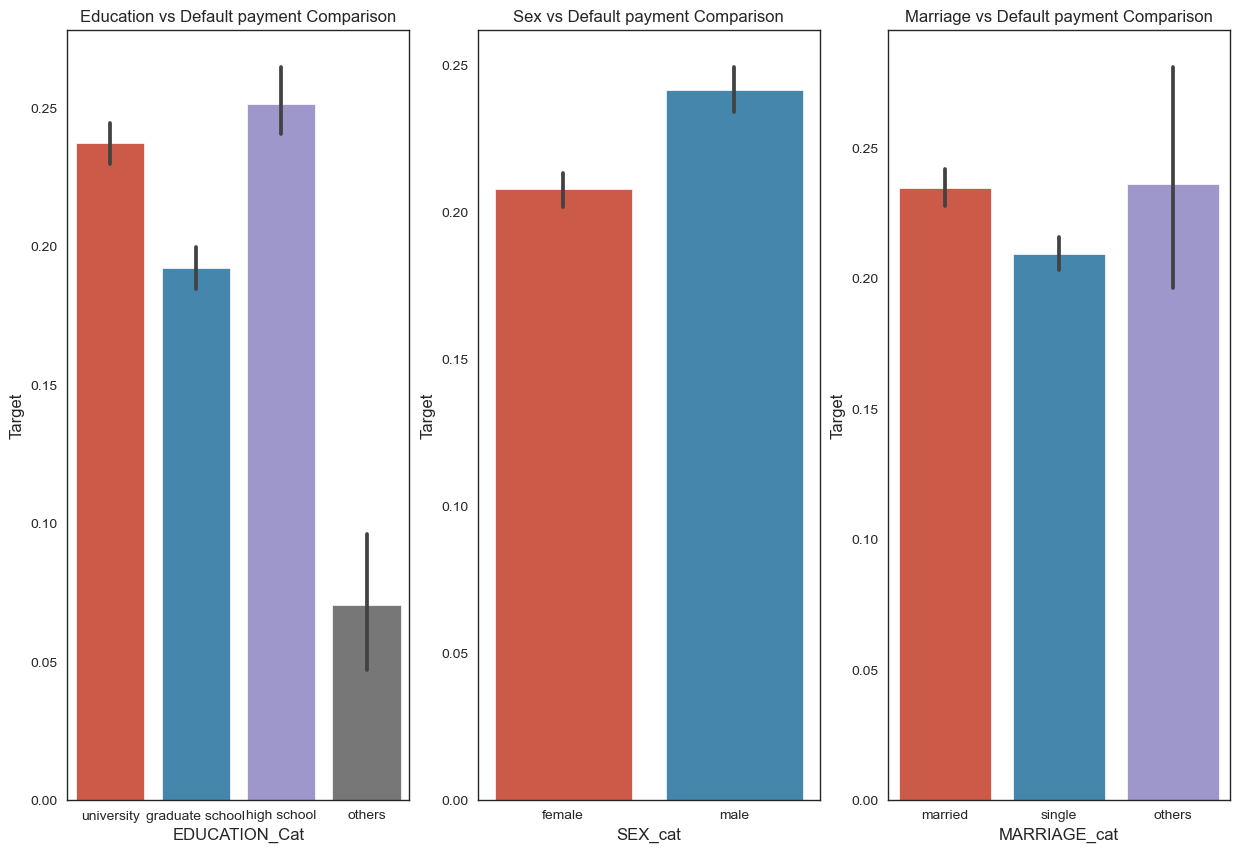

In [31]:

fig ,(axe1,axe2,axe3) = plt.subplots(ncols =3,figsize = (15,10))

sns.barplot(x = "EDUCATION_Cat", y='Target',data = df_dummy,ax = axe1)
axe1.set_title('Education vs Default payment Comparison',fontsize=12)

sns.barplot(x = "SEX_cat", y='Target',data = df_dummy,ax = axe2)
axe2.set_title('Sex vs Default payment Comparison',fontsize=12)

sns.barplot(x = "MARRIAGE_cat", y='Target',data = df_dummy,ax = axe3)
axe3.set_title('Marriage vs Default payment Comparison',fontsize=12)


Text(0.5, 1.0, 'Age vs SEX Default payment Comparison')

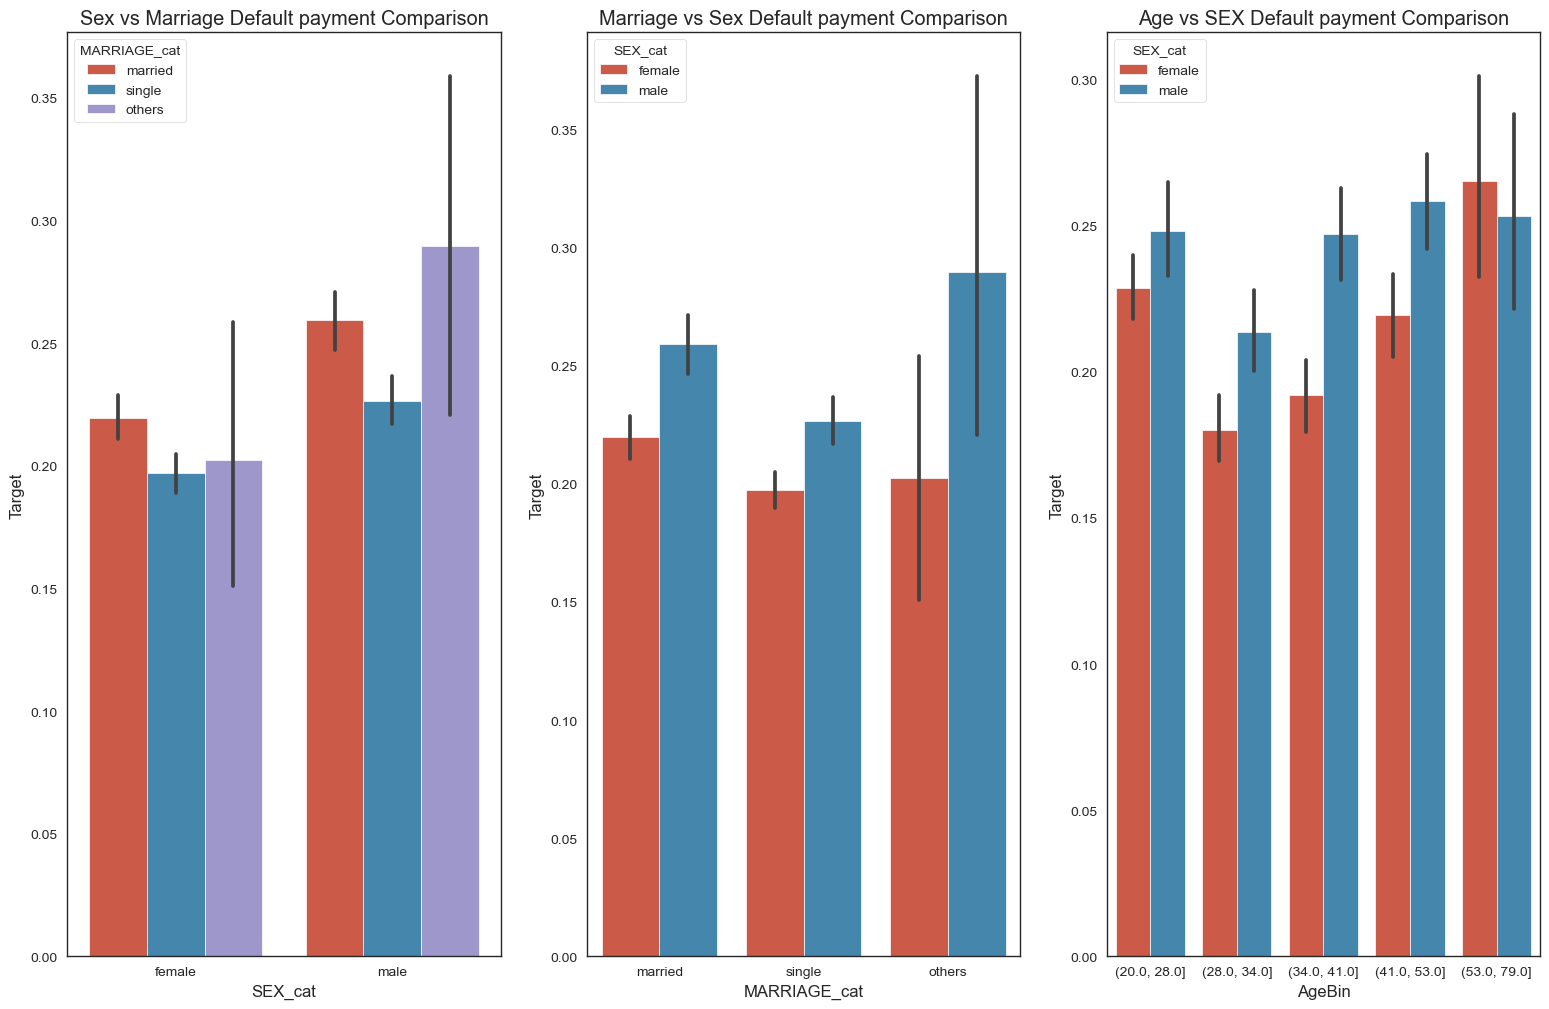

In [32]:
# Male at all age bins get defaulted than Female
# as we seen above married male gets default than married female
fig, qaxis = plt.subplots(1,3,figsize=(19,12))

sns.barplot(x = 'SEX_cat', y = 'Target', hue = 'MARRIAGE_cat', data=df_dummy, ax = qaxis[0])
qaxis[0].set_title('Sex vs Marriage Default payment Comparison')

sns.barplot(x = 'MARRIAGE_cat', y = 'Target', hue = 'SEX_cat', data=df_dummy, ax  = qaxis[1])
qaxis[1].set_title('Marriage vs Sex Default payment Comparison')

sns.barplot(x = 'AgeBin', y = 'Target', hue = 'SEX_cat', data=df_dummy, ax  = qaxis[2])
qaxis[2].set_title('Age vs SEX Default payment Comparison')

In [33]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  30000 non-null  int64   
 1   LIMIT_BAL           30000 non-null  int64   
 2   AGE                 30000 non-null  int64   
 3   PAY_September       30000 non-null  int64   
 4   PAY_August          30000 non-null  int64   
 5   PAY_July            30000 non-null  int64   
 6   PAY_June            30000 non-null  int64   
 7   PAY_May             30000 non-null  int64   
 8   PAY_April           30000 non-null  int64   
 9   BILL_AMT_September  30000 non-null  int64   
 10  BILL_AMT_August     30000 non-null  int64   
 11  BILL_AMT_July       30000 non-null  int64   
 12  BILL_AMT_June       30000 non-null  int64   
 13  BILL_AMT_May        30000 non-null  int64   
 14  BILL_AMT_April      30000 non-null  int64   
 15  PAY_AMT_September   30000 non-null  

In [34]:
# Encoding the category data into onehot encoded to avoid orderd Correlation

cols_cat = ['EDUCATION_Cat','SEX_cat','MARRIAGE_cat']
data_dummy  = pd.get_dummies(df_dummy[cols_cat],drop_first= True)


In [35]:
data_dummy

EDUCATION_Cat_high school  EDUCATION_Cat_others  \
0                              0                     0   
1                              0                     0   
2                              0                     0   
3                              0                     0   
4                              0                     0   
...                          ...                   ...   
29995                          1                     0   
29996                          1                     0   
29997                          0                     0   
29998                          1                     0   
29999                          0                     0   

       EDUCATION_Cat_university  SEX_cat_male  MARRIAGE_cat_others  \
0                             1             0                    0   
1                             1             0                    0   
2                             1             0                    0   
3                             1             0                    0   
4                             1             1                    0   
...                         ...           ...                  ...   
29995                         0             1                    0   
29996                         0             1                    0   
29997                         1             1                    0   
29998                         0             1                    0   
29999                         1             1                    0   

       MARRIAGE_cat_single  
0                        0  
1                        1  
2                        1  
3                        0  
4                        0  
...                    ...  
29995                    0  
29996                    1  
29997                    1  
29998                    0  
29999                    0  

[30000 rows x 6 columns]

In [36]:
cols = ['LIMIT_BAL', 'AGE', 'PAY_September', 'PAY_August',
       'PAY_July', 'PAY_June', 'PAY_May', 'PAY_April',
       'BILL_AMT_September', 'BILL_AMT_August', 'BILL_AMT_July',
       'BILL_AMT_June', 'BILL_AMT_May', 'BILL_AMT_April',
       'PAY_AMT_September', 'PAY_AMT_August', 'PAY_AMT_July',
       'PAY_AMT_June', 'PAY_AMT_May', 'PAY_AMT_April','Target']

In [37]:
# Final df to predict the output
df_data = pd.concat([data_dummy,df_dummy[cols]],axis= 1)

In [38]:
df_data.head()

EDUCATION_Cat_high school  EDUCATION_Cat_others  \
0                          0                     0   
1                          0                     0   
2                          0                     0   
3                          0                     0   
4                          0                     0   

   EDUCATION_Cat_university  SEX_cat_male  MARRIAGE_cat_others  \
0                         1             0                    0   
1                         1             0                    0   
2                         1             0                    0   
3                         1             0                    0   
4                         1             1                    0   

   MARRIAGE_cat_single  LIMIT_BAL  AGE  PAY_September  PAY_August  ...  \
0                    0      20000   24              2           2  ...   
1                    1     120000   26             -1           2  ...   
2                    1      90000   34              0           0  ...   
3                    0      50000   37              0           0  ...   
4                    0      50000   57             -1           0  ...   

   BILL_AMT_June  BILL_AMT_May  BILL_AMT_April  PAY_AMT_September  \
0              0             0               0                  0   
1           3272          3455            3261                  0   
2          14331         14948           15549               1518   
3          28314         28959           29547               2000   
4          20940         19146           19131               2000   

   PAY_AMT_August  PAY_AMT_July  PAY_AMT_June  PAY_AMT_May  \
0             689             0             0            0   
1            1000          1000          1000            0   
2            1500          1000          1000         1000   
3            2019          1200          1100         1069   
4           36681         10000          9000          689   

   PAY_AMT_April  Target  
0              0       1  
1           2000       1  
2           5000       0  
3           1000       0  
4            679       0  

[5 rows x 27 columns]

In [39]:
# Split the Target value from df
y = df_data['Target'].values

In [40]:
# Assign mask for default and Non-Default
pos_mask = y == 1
neg_mask = y == 0

In [46]:
bin_edges = list(range(0,850000,50000))

Text(0.5, 1.0, 'Normalized distributions of credit limits by response variable')

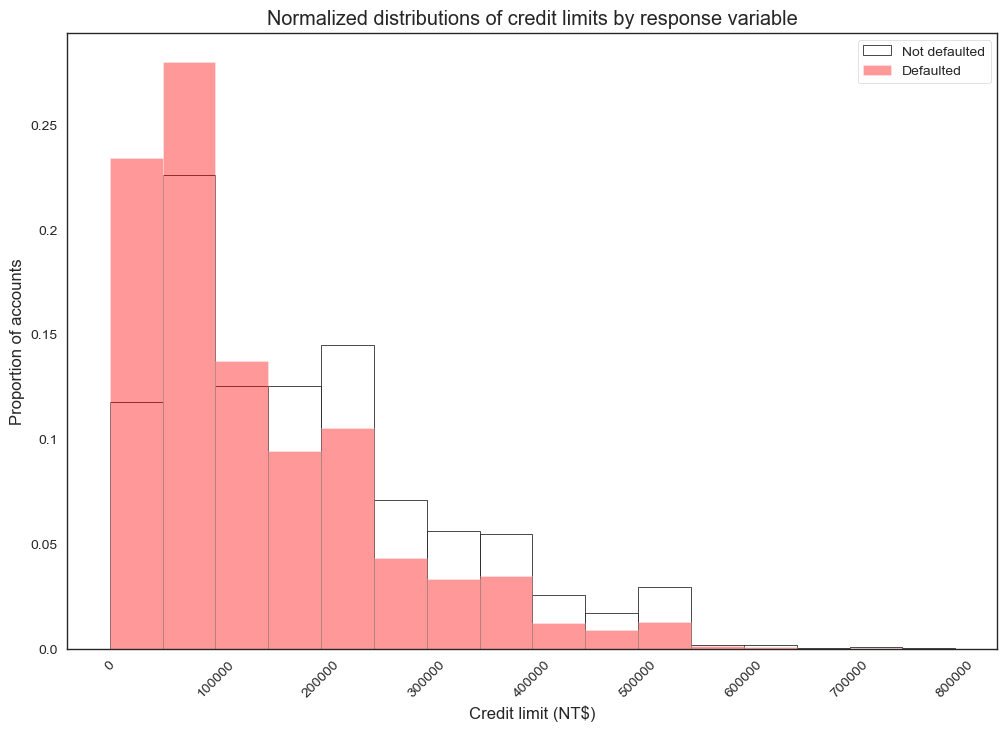

In [47]:
# as we seen below low limit score mostly to get default  
mpl.rcParams['figure.dpi'] = 100 
axes = plt.axes()
axes.hist(df_data.loc[neg_mask, 'LIMIT_BAL'],bins=bin_edges, density=True,   #Normalized Y value since Not default count(23364) > default(6636)
    edgecolor='black', color='white')
axes.hist(df_data.loc[pos_mask, 'LIMIT_BAL'],bins=bin_edges, density=True, alpha=0.4,
    edgecolor=None, color='red')
axes.tick_params(axis='x', labelrotation=45)
axes.set_xlabel('Credit limit (NT$)')
axes.set_ylabel('Proportion of accounts')
y_ticks = axes.get_yticks()
axes.set_yticklabels(np.round(y_ticks*50000,2))
axes.legend(['Not defaulted', 'Defaulted'])
axes.set_title('Normalized distributions of '
               'credit limits by response variable')

In [48]:
df_data.describe()

EDUCATION_Cat_high school  EDUCATION_Cat_others  \
count                  30,000.00             30,000.00   
mean                        0.16                  0.02   
std                         0.37                  0.12   
min                         0.00                  0.00   
25%                         0.00                  0.00   
50%                         0.00                  0.00   
75%                         0.00                  0.00   
max                         1.00                  1.00   

       EDUCATION_Cat_university  SEX_cat_male  MARRIAGE_cat_others  \
count                 30,000.00     30,000.00            30,000.00   
mean                       0.47          0.40                 0.01   
std                        0.50          0.49                 0.11   
min                        0.00          0.00                 0.00   
25%                        0.00          0.00                 0.00   
50%                        0.00          0.00                 0.00   
75%                        1.00          1.00                 0.00   
max                        1.00          1.00                 1.00   

       MARRIAGE_cat_single    LIMIT_BAL       AGE  PAY_September  \
count            30,000.00    30,000.00 30,000.00      30,000.00   
mean                  0.53   167,484.32     35.49          -0.02   
std                   0.50   129,747.66      9.22           1.12   
min                   0.00    10,000.00     21.00          -2.00   
25%                   0.00    50,000.00     28.00          -1.00   
50%                   1.00   140,000.00     34.00           0.00   
75%                   1.00   240,000.00     41.00           0.00   
max                   1.00 1,000,000.00     79.00           8.00   

       PAY_August  ...  BILL_AMT_June  BILL_AMT_May  BILL_AMT_April  \
count   30,000.00  ...      30,000.00     30,000.00       30,000.00   
mean        -0.13  ...      43,262.95     40,311.40       38,871.76   
std          1.20  ...      64,332.86     60,797.16       59,554.11   
min         -2.00  ...    -170,000.00    -81,334.00     -339,603.00   
25%         -1.00  ...       2,326.75      1,763.00        1,256.00   
50%          0.00  ...      19,052.00     18,104.50       17,071.00   
75%          0.00  ...      54,506.00     50,190.50       49,198.25   
max          8.00  ...     891,586.00    927,171.00      961,664.00   

       PAY_AMT_September  PAY_AMT_August  PAY_AMT_July  PAY_AMT_June  \
count          30,000.00       30,000.00     30,000.00     30,000.00   
mean            5,663.58        5,921.16      5,225.68      4,826.08   
std            16,563.28       23,040.87     17,606.96     15,666.16   
min                 0.00            0.00          0.00          0.00   
25%             1,000.00          833.00        390.00        296.00   
50%             2,100.00        2,009.00      1,800.00      1,500.00   
75%             5,006.00        5,000.00      4,505.00      4,013.25   
max           873,552.00    1,684,259.00    896,040.00    621,000.00   

       PAY_AMT_May  PAY_AMT_April    Target  
count    30,000.00      30,000.00 30,000.00  
mean      4,799.39       5,215.50      0.22  
std      15,278.31      17,777.47      0.42  
min           0.00           0.00      0.00  
25%         252.50         117.75      0.00  
50%       1,500.00       1,500.00      0.00  
75%       4,031.50       4,000.00      0.00  
max     426,529.00     528,666.00      1.00  

[8 rows x 27 columns]

In [49]:
# overall Default rate from df
overall_def_rate = df_data['Target'].mean()
overall_def_rate

0.2212

In [50]:
# Grouping the Sept payment status and aggregating with Target mean
group_by_sept_mean = df_data.groupby('PAY_September').agg({'Target':np.mean})
group_by_sept_mean

Target
PAY_September        
-2               0.13
-1               0.17
 0               0.13
 1               0.34
 2               0.69
 3               0.76
 4               0.68
 5               0.50
 6               0.55
 7               0.78
 8               0.58

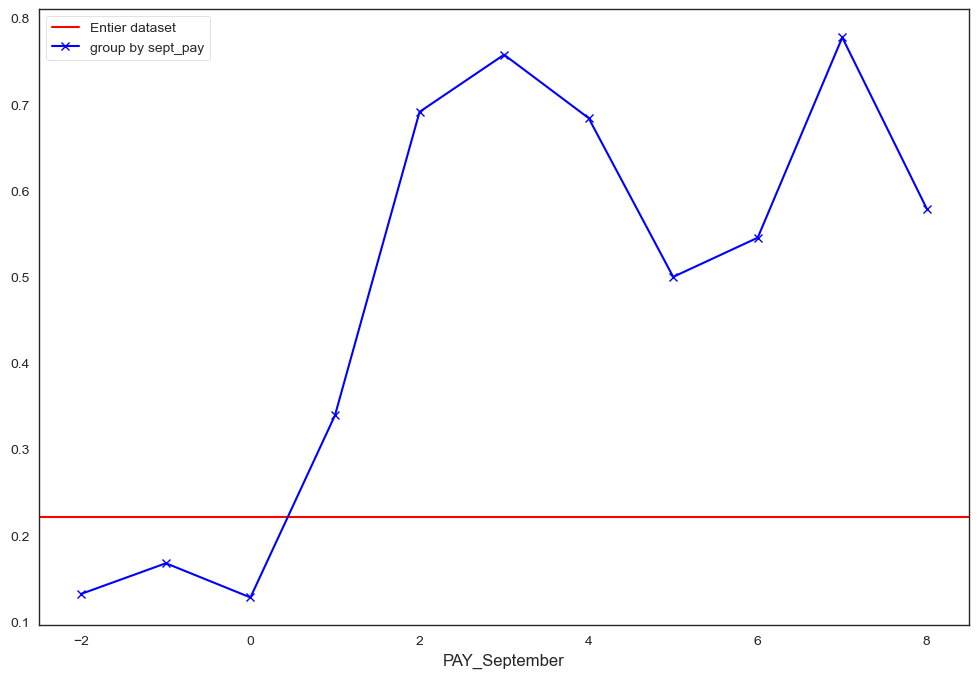

In [51]:
axes = plt.axes()
axes.axhline(overall_def_rate,color = 'red')
group_by_sept_mean.plot(marker = 'x',color = 'b',legend = False,ax = axes)
axes.legend(['Entier dataset','group by sept_pay'])

Pay_september status > 2 mostly gets defaulted 


In [49]:
feature = df_data.columns.to_list()

In [50]:
X = df_data.iloc[:,:-1].values

In [51]:
# Predicting the Good feature for our model using ANOVA for All features vs Target 
from sklearn.feature_selection import f_classif
[f_stat,f_p_value] = f_classif(X,y)

In [52]:
# Pay_status features will impact more thaan others lets compare later with feature importance 
f_test_df = pd.DataFrame({'feature':feature[:-1],
                          'F statistic': f_stat,
                         'P value': f_p_value})
f_test_df.sort_values('P value')

feature  F statistic  P value
8               PAY_September     3,537.71     0.00
9                  PAY_August     2,239.17     0.00
10                   PAY_July     1,757.47     0.00
11                   PAY_June     1,476.85     0.00
12                    PAY_May     1,304.59     0.00
13                  PAY_April     1,085.40     0.00
6                   LIMIT_BAL       724.07     0.00
20          PAY_AMT_September       160.40     0.00
21             PAY_AMT_August       103.29     0.00
23               PAY_AMT_June        97.19     0.00
22               PAY_AMT_July        95.22     0.00
24                PAY_AMT_May        91.43     0.00
25              PAY_AMT_April        85.09     0.00
1        EDUCATION_Cat_others        62.79     0.00
3                SEX_cat_male        47.98     0.00
2    EDUCATION_Cat_university        39.95     0.00
0   EDUCATION_Cat_high school        31.53     0.00
5         MARRIAGE_cat_single        28.15     0.00
14         BILL_AMT_September        11.58     0.00
15            BILL_AMT_August         6.04     0.01
16              BILL_AMT_July         5.94     0.01
7                         AGE         5.79     0.02
17              BILL_AMT_June         3.09     0.08
18               BILL_AMT_May         1.37     0.24
19             BILL_AMT_April         0.87     0.35
4         MARRIAGE_cat_others         0.49     0.48

In [53]:
from sklearn.feature_selection import SelectPercentile
selector = SelectPercentile(f_classif, percentile=25)
selector.fit(X,y)

SelectPercentile(percentile=25)

In [54]:
# Select Top 25% feature 
best_feature_x = selector.get_support()
feature_x = feature[:-1]
best_Feature = [feature_x[counter] for counter in range(len(feature_x)) if best_feature_x[counter]]
best_Feature

['LIMIT_BAL',
 'PAY_September',
 'PAY_August',
 'PAY_July',
 'PAY_June',
 'PAY_May',
 'PAY_April']

In [55]:
df_data.columns

Index(['EDUCATION_Cat_high school', 'EDUCATION_Cat_others',
       'EDUCATION_Cat_university', 'SEX_cat_male', 'MARRIAGE_cat_others',
       'MARRIAGE_cat_single', 'LIMIT_BAL', 'AGE', 'PAY_September',
       'PAY_August', 'PAY_July', 'PAY_June', 'PAY_May', 'PAY_April',
       'BILL_AMT_September', 'BILL_AMT_August', 'BILL_AMT_July',
       'BILL_AMT_June', 'BILL_AMT_May', 'BILL_AMT_April',
       'PAY_AMT_September', 'PAY_AMT_August', 'PAY_AMT_July',
       'PAY_AMT_June', 'PAY_AMT_May', 'PAY_AMT_April', 'Target'],
      dtype='object')

In [54]:
# Create Model separating X as input and Y as Target feature
#cols = ['PAY_September', 'LIMIT_BAL', 'PAY_AMT_September']

X = df_data.iloc[:,:-1]
y= df_data.iloc[:,-1]

In [55]:
# Split into Train and testing to avoid overfit the model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)


In [56]:
y_train.sum()/y_train.shape[0]

0.22245833333333334

In [57]:
print(y_train.value_counts())
print(y_train.value_counts(normalize=True))

0    18661
1     5339
Name: Target, dtype: int64
0   0.78
1   0.22
Name: Target, dtype: float64


In [58]:
print(y_test.value_counts())
print(y_test.value_counts(normalize=True))

0    4703
1    1297
Name: Target, dtype: int64
0   0.78
1   0.22
Name: Target, dtype: float64


In [59]:
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%


In [113]:
clf = LogisticRegressionCV(fit_intercept= True, solver= 'newton-cg', random_state=0)
cv_results = model_selection.cross_validate(clf, X_train, y_train, cv  = cv_split,scoring='roc_auc',return_train_score = True)


In [114]:
clf.fit(X_train, y_train)

LogisticRegressionCV(random_state=0, solver='newton-cg')

In [115]:
cv_results

{'fit_time': array([21.78126049, 26.21501732, 25.35022116, 23.35020971, 24.55597425,
        26.25675368, 24.66323781, 23.85291314, 24.0833652 , 24.11600351]),
 'score_time': array([0.01561904, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.0156312 , 0.        , 0.        ]),
 'test_score': array([0.71674053, 0.73678388, 0.72055455, 0.73425355, 0.71672482,
        0.72853386, 0.71554174, 0.72612323, 0.7349435 , 0.73093169]),
 'train_score': array([0.72740353, 0.72169699, 0.7266648 , 0.72162038, 0.72784308,
        0.72509312, 0.73176581, 0.72743601, 0.72456451, 0.72839547])}

In [116]:
print(f"train_auc_score {cv_results['train_score'].mean()}")
print(f"test_auc_score {cv_results['test_score'].mean()}")

train_auc_score 0.7262483709821674
test_auc_score 0.7261131355362566


In [117]:

clf = LogisticRegressionCV(fit_intercept= True, solver= 'newton-cg',cv=cv_split, random_state=0).fit(X_train, y_train)
#The best parameter for LogisticRegressionCV is {'fit_intercept': True, 'random_state': 0, 'solver': 'newton-cg'} with a runtime of 410.74 seconds.

print(clf.score(X_test, y_test))


0.8195


In [118]:
clf.scores_

{1: array([[0.77930556, 0.7975    , 0.80319444, 0.80486111, 0.80513889,
         0.80527778, 0.80527778, 0.80527778, 0.80527778, 0.80527778],
        [0.77819444, 0.79638889, 0.80347222, 0.80569444, 0.80597222,
         0.80611111, 0.80611111, 0.80611111, 0.80611111, 0.80611111],
        [0.78388889, 0.80055556, 0.80916667, 0.80986111, 0.81055556,
         0.81069444, 0.81083333, 0.81083333, 0.81083333, 0.81083333],
        [0.78388889, 0.80013889, 0.80680556, 0.81027778, 0.81069444,
         0.81041667, 0.81055556, 0.81055556, 0.81055556, 0.81055556],
        [0.78402778, 0.79833333, 0.80625   , 0.80902778, 0.80916667,
         0.80944444, 0.80930556, 0.80944444, 0.80944444, 0.80944444],
        [0.77666667, 0.79708333, 0.80472222, 0.80625   , 0.80611111,
         0.80652778, 0.80652778, 0.80652778, 0.80652778, 0.80652778],
        [0.78444444, 0.80194444, 0.80611111, 0.80666667, 0.80666667,
         0.80652778, 0.80652778, 0.80652778, 0.80652778, 0.80652778],
        [0.77972222, 0.7

In [119]:
y_pred_t = clf.predict(X_train)

In [120]:
y_pred = clf.predict(X_test)

In [121]:
print(f"confusion_matrix train: \n{metrics.confusion_matrix(y_train, y_pred_t)}")
print(f"confusion_matrix test: \n {metrics.confusion_matrix(y_test, y_pred)}")

confusion_matrix train: 
[[18134   527]
 [ 4073  1266]]
confusion_matrix test: 
 [[4606   97]
 [ 986  311]]


In [121]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_t))
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.95      0.89     18661
           1       0.70      0.37      0.49      5339

    accuracy                           0.83     24000
   macro avg       0.77      0.66      0.69     24000
weighted avg       0.81      0.83      0.80     24000

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      4703
           1       0.70      0.36      0.48      1297

    accuracy                           0.83      6000
   macro avg       0.77      0.66      0.69      6000
weighted avg       0.81      0.83      0.81      6000



In [122]:
from sklearn.metrics import roc_auc_score

auc_t = roc_auc_score(y_train, y_pred_t)
auc = roc_auc_score(y_test, y_pred)

print(f"AUC train: {auc_t}")
print(f"AUC test: {auc}")

AUC train: 0.6044411704102893
AUC test: 0.609579492149813


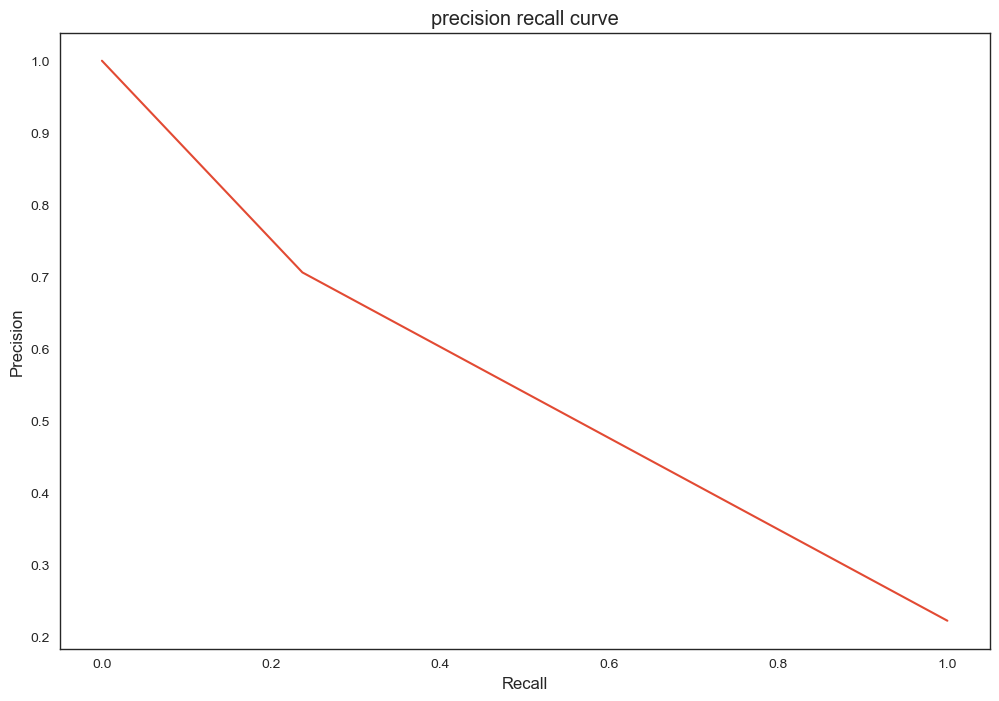

0.5564552934811385

In [125]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt


precision, recall, thresholds = precision_recall_curve(y_train, y_pred_t)

plt.plot(recall, precision)
plt.title('precision recall curve')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()
metrics.auc(recall, precision)

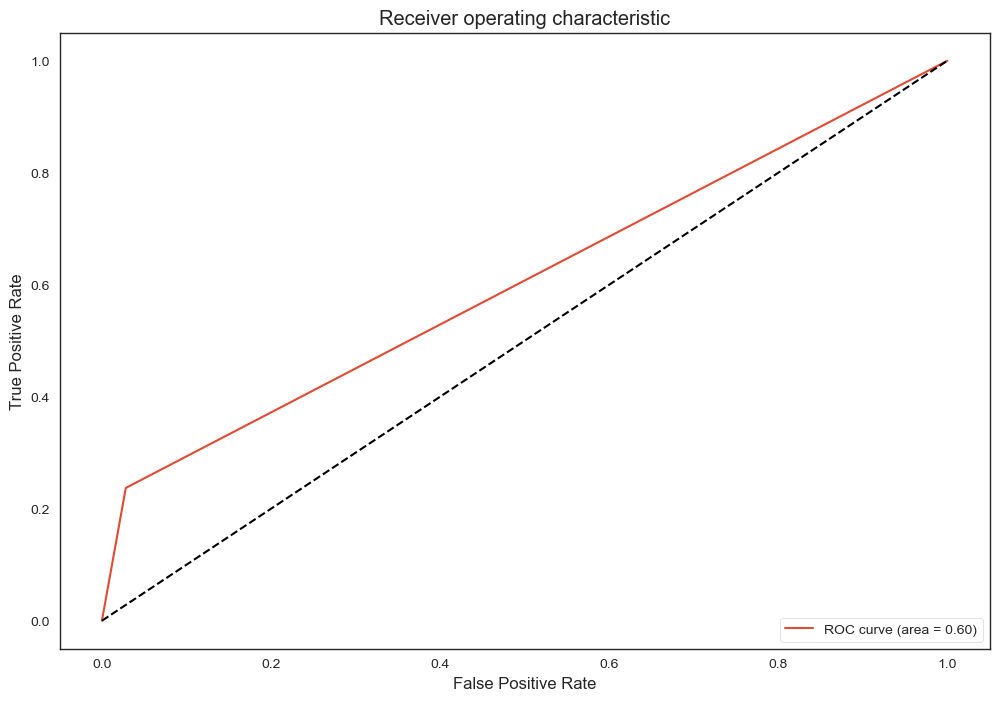

In [126]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt


fpr, tpr, thresholds = roc_curve(y_train, y_pred_t)

roc_auc = roc_auc_score(y_train, y_pred_t)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [62]:
#WARNING: Running is very computational intensive and time expensive.
#Code is written for experimental/developmental purposes and not production ready!
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

clf = XGBClassifier()
#Hyperparameter Tune with GridSearchCV: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
grid_n_estimator = [10, 50, 100, 300]
grid_ratio = [.1, .25, .5, .75, 1.0]
grid_learn = [.01, .03, .05, .1, .25]
grid_max_depth = [2, 4, 6, 8, 10, None]
grid_min_samples = [5, 10, .03, .05, .10]
grid_criterion = ['gini', 'entropy']
grid_bool = [True, False]
grid_seed = [0]


grid_param =  [{
            #XGBClassifier - http://xgboost.readthedocs.io/en/latest/parameter.html
            'learning_rate': grid_learn, #default: .3
            'max_depth': [1,2,4,6,8,10], #default 2
            'n_estimators': grid_n_estimator, 
            'seed': grid_seed  
             }]   

best_search = model_selection.GridSearchCV(estimator = clf, param_grid = grid_param, cv = cv_split, n_jobs = -1,scoring = 'roc_auc')
best_search.fit(X_train, y_train)


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.3, train_size=0.6),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     i...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid=[{'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.25],
                          'max_depth': [1, 2, 4, 6, 8, 10],
                          'n_estimators': [10, 50, 100, 300], 'seed': [0]}],
             scoring='roc_auc')

In [63]:
bst_parm = best_search.best_params_
bst_parm

{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100, 'seed': 0}

In [65]:
xg = clf.set_params(**bst_parm).fit(X_train, y_train)

In [66]:
xg.feature_importances_

array([0.01124357, 0.01508462, 0.00978178, 0.01390857, 0.        ,
       0.01446947, 0.02319281, 0.01112169, 0.43295965, 0.11043035,
       0.05573511, 0.0412968 , 0.02933029, 0.02667834, 0.02267481,
       0.01925944, 0.01206496, 0.01045873, 0.01304903, 0.01051647,
       0.02429371, 0.02611707, 0.02495699, 0.01859643, 0.0094235 ,
       0.01335577], dtype=float32)

In [77]:
Feature_imp = pd.DataFrame(xg.feature_importances_)

<BarContainer object of 26 artists>

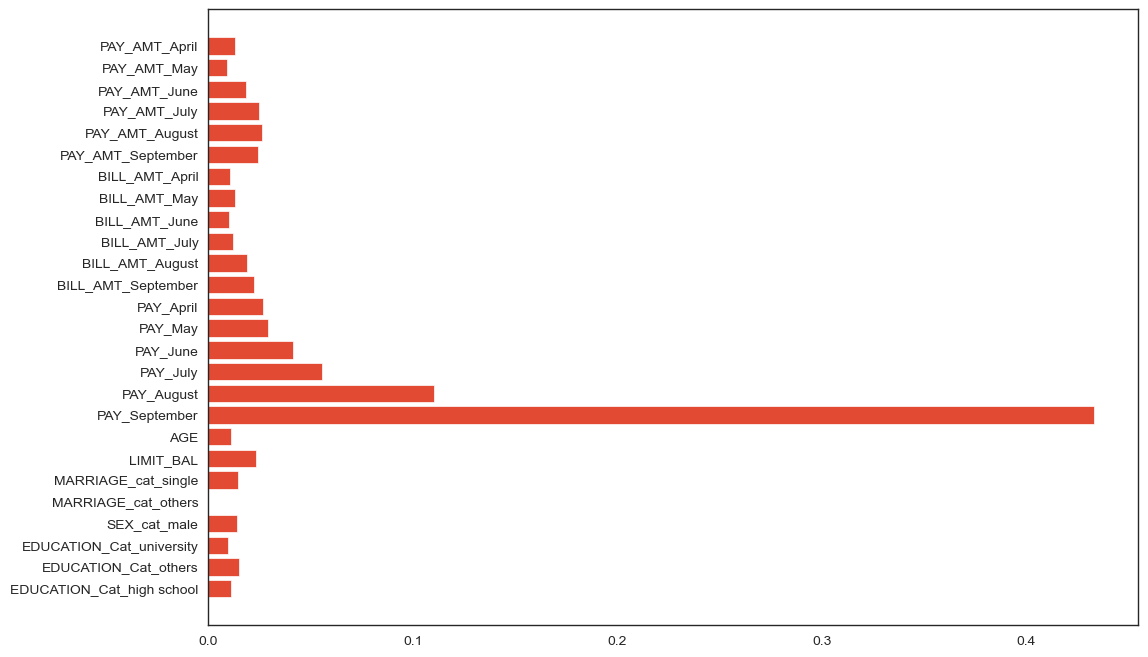

In [75]:
plt.barh(cols, xg.feature_importances_)


In [81]:
# SHAP (SHapley Additive exPlanations) is a game theoretic approach to explain the output of any machine learning model
import shap
explainer = shap.TreeExplainer(xg)
shap_values = explainer.shap_values(X_train)


In [82]:
X_train[cols].sample(5)

EDUCATION_Cat_high school  EDUCATION_Cat_others  \
3332                           0                     0   
13171                          0                     0   
25940                          0                     0   
7870                           0                     0   
18894                          0                     0   

       EDUCATION_Cat_university  SEX_cat_male  MARRIAGE_cat_others  \
3332                          0             1                    0   
13171                         1             0                    0   
25940                         1             0                    0   
7870                          0             1                    0   
18894                         1             0                    0   

       MARRIAGE_cat_single  LIMIT_BAL  AGE  PAY_September  PAY_August  \
3332                     0     500000   59             -2          -2   
13171                    0     240000   37             -1           0   
25940                    1     360000   30              0           0   
7870                     1     200000   26             -1          -1   
18894                    0     270000   27              0           0   

       ...  BILL_AMT_July  BILL_AMT_June  BILL_AMT_May  BILL_AMT_April  \
3332   ...            994           3342          1240             700   
13171  ...          86507          89138         91118           93229   
25940  ...           7672           8380          4581            3853   
7870   ...           -201           -201          -201            -201   
18894  ...          21345          14852         18669           25175   

       PAY_AMT_September  PAY_AMT_August  PAY_AMT_July  PAY_AMT_June  \
3332                   0             994          3342          1240   
13171              90500            3000          3000          2500   
25940               1115            1161          1026          1523   
7870                   0               0             0             0   
18894               4000            5000             0         10000   

       PAY_AMT_May  PAY_AMT_April  
3332           700           2250  
13171         2500           3000  
25940         3872           2626  
7870             0              0  
18894         7000           2000  

[5 rows x 26 columns]

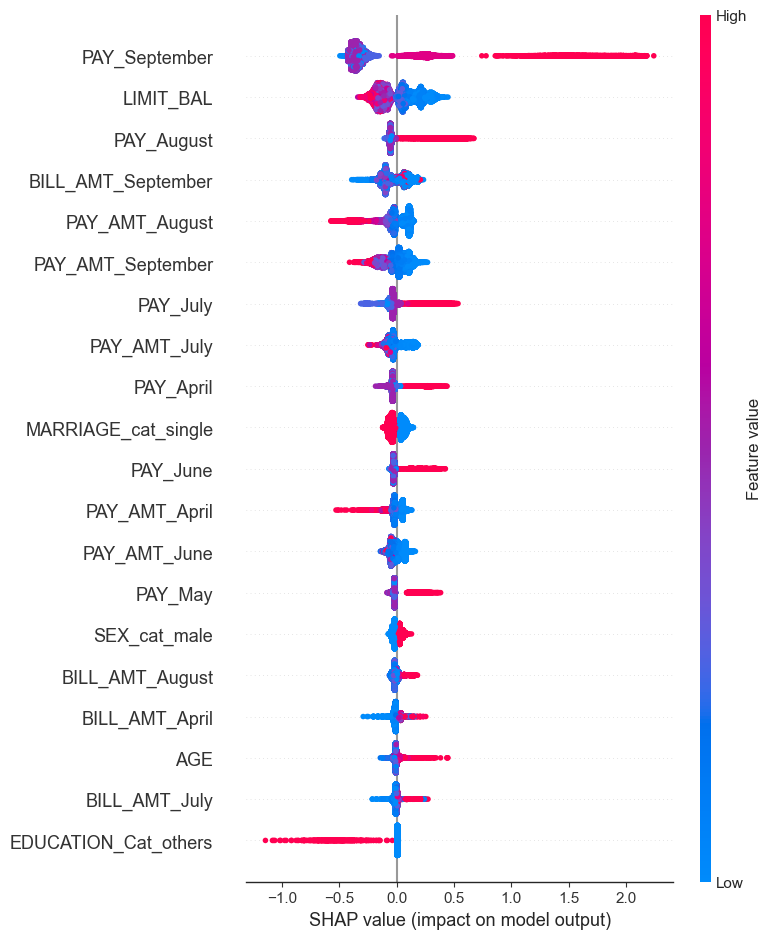

In [83]:
shap.summary_plot(shap_values, X_train)


In [85]:
#comparing ANOVA F-value with Top 25% features
print(best_Feature)

['LIMIT_BAL', 'PAY_September', 'PAY_August', 'PAY_July', 'PAY_June', 'PAY_May', 'PAY_April']


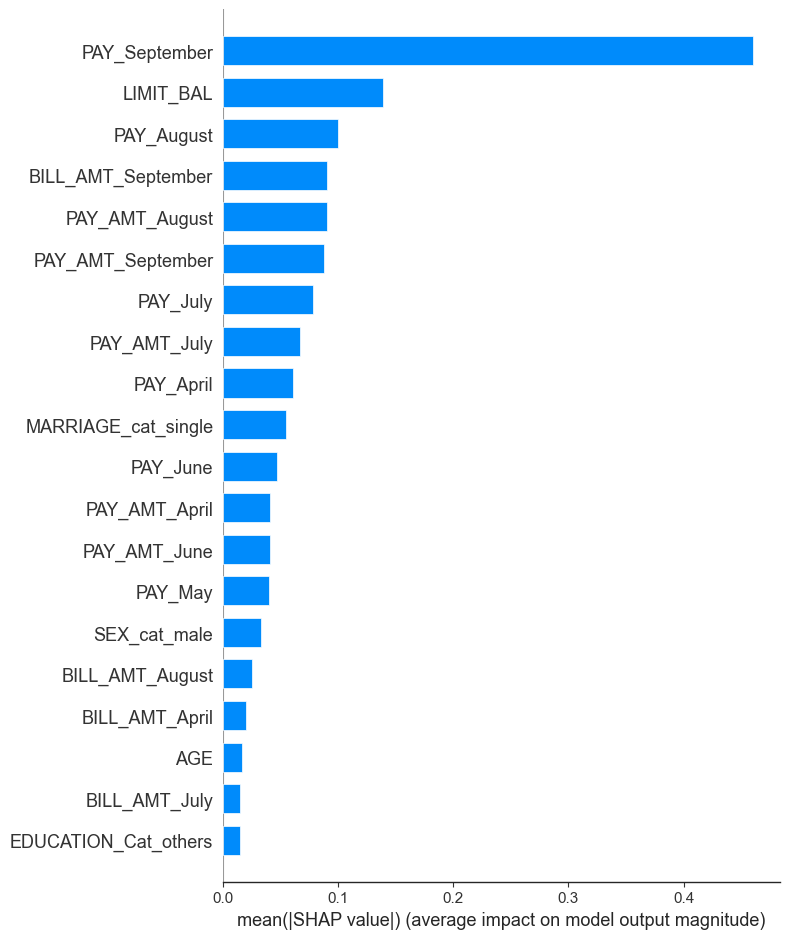

In [84]:
shap.summary_plot(shap_values, X_train,plot_type="bar")


- Statistical test and shap plot shows same result 
- Important features are "PAY_September", "LIMIT_BAL", "PAY_August", "BILL_AMT_September"

In [119]:
X_train.columns

Index(['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_September',
       'PAY_August', 'PAY_July', 'PAY_June', 'PAY_May', 'PAY_April',
       'BILL_AMT_September', 'BILL_AMT_August', 'BILL_AMT_July',
       'BILL_AMT_June', 'BILL_AMT_May', 'BILL_AMT_April',
       'PAY_AMT_September', 'PAY_AMT_August', 'PAY_AMT_July',
       'PAY_AMT_June', 'PAY_AMT_May', 'PAY_AMT_April', 'Male'],
      dtype='object')

In [52]:
# Train data with important features
cols = ['PAY_September','LIMIT_BAL','PAY_August','BILL_AMT_September']

In [60]:
# Split traning data into validation to make test data as unseen like production
X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(X_train[cols], y_train,test_size=0.2, random_state=24)

In [106]:
xgb = XGBClassifier()


In [107]:
xgb_model_4 = XGBClassifier(n_estimators=1000,max_depth=0,learning_rate=0.1,verbosity=1,
                                objective='binary:logistic',use_label_encoder=False,n_jobs=-1,
                                tree_method='hist',grow_policy='lossguide')

In [108]:
max_leaves_values = list(range(5,205,5))  #5,10,15,200

In [109]:
eval_set_2 = [(X_train_2, y_train_2), (X_val_2, y_val_2)]

In [110]:
from sklearn.metrics import roc_auc_score


In [111]:
%%time
val_aucs = []
for max_leaves in max_leaves_values:
#Set parameter and fit model
    xgb_model_4.set_params(**{'max_leaves':max_leaves})
    xgb_model_4.fit(X_train_2, y_train_2,eval_set=eval_set_2,eval_metric='auc',verbose=False,early_stopping_rounds=30)
    #Get validation score
    val_set_pred_proba = xgb_model_4.predict_proba(X_val_2)[:,1]
    val_aucs.append(roc_auc_score(y_val_2, val_set_pred_proba))

Wall time: 14.7 s


<AxesSubplot:xlabel='Max leaves'>

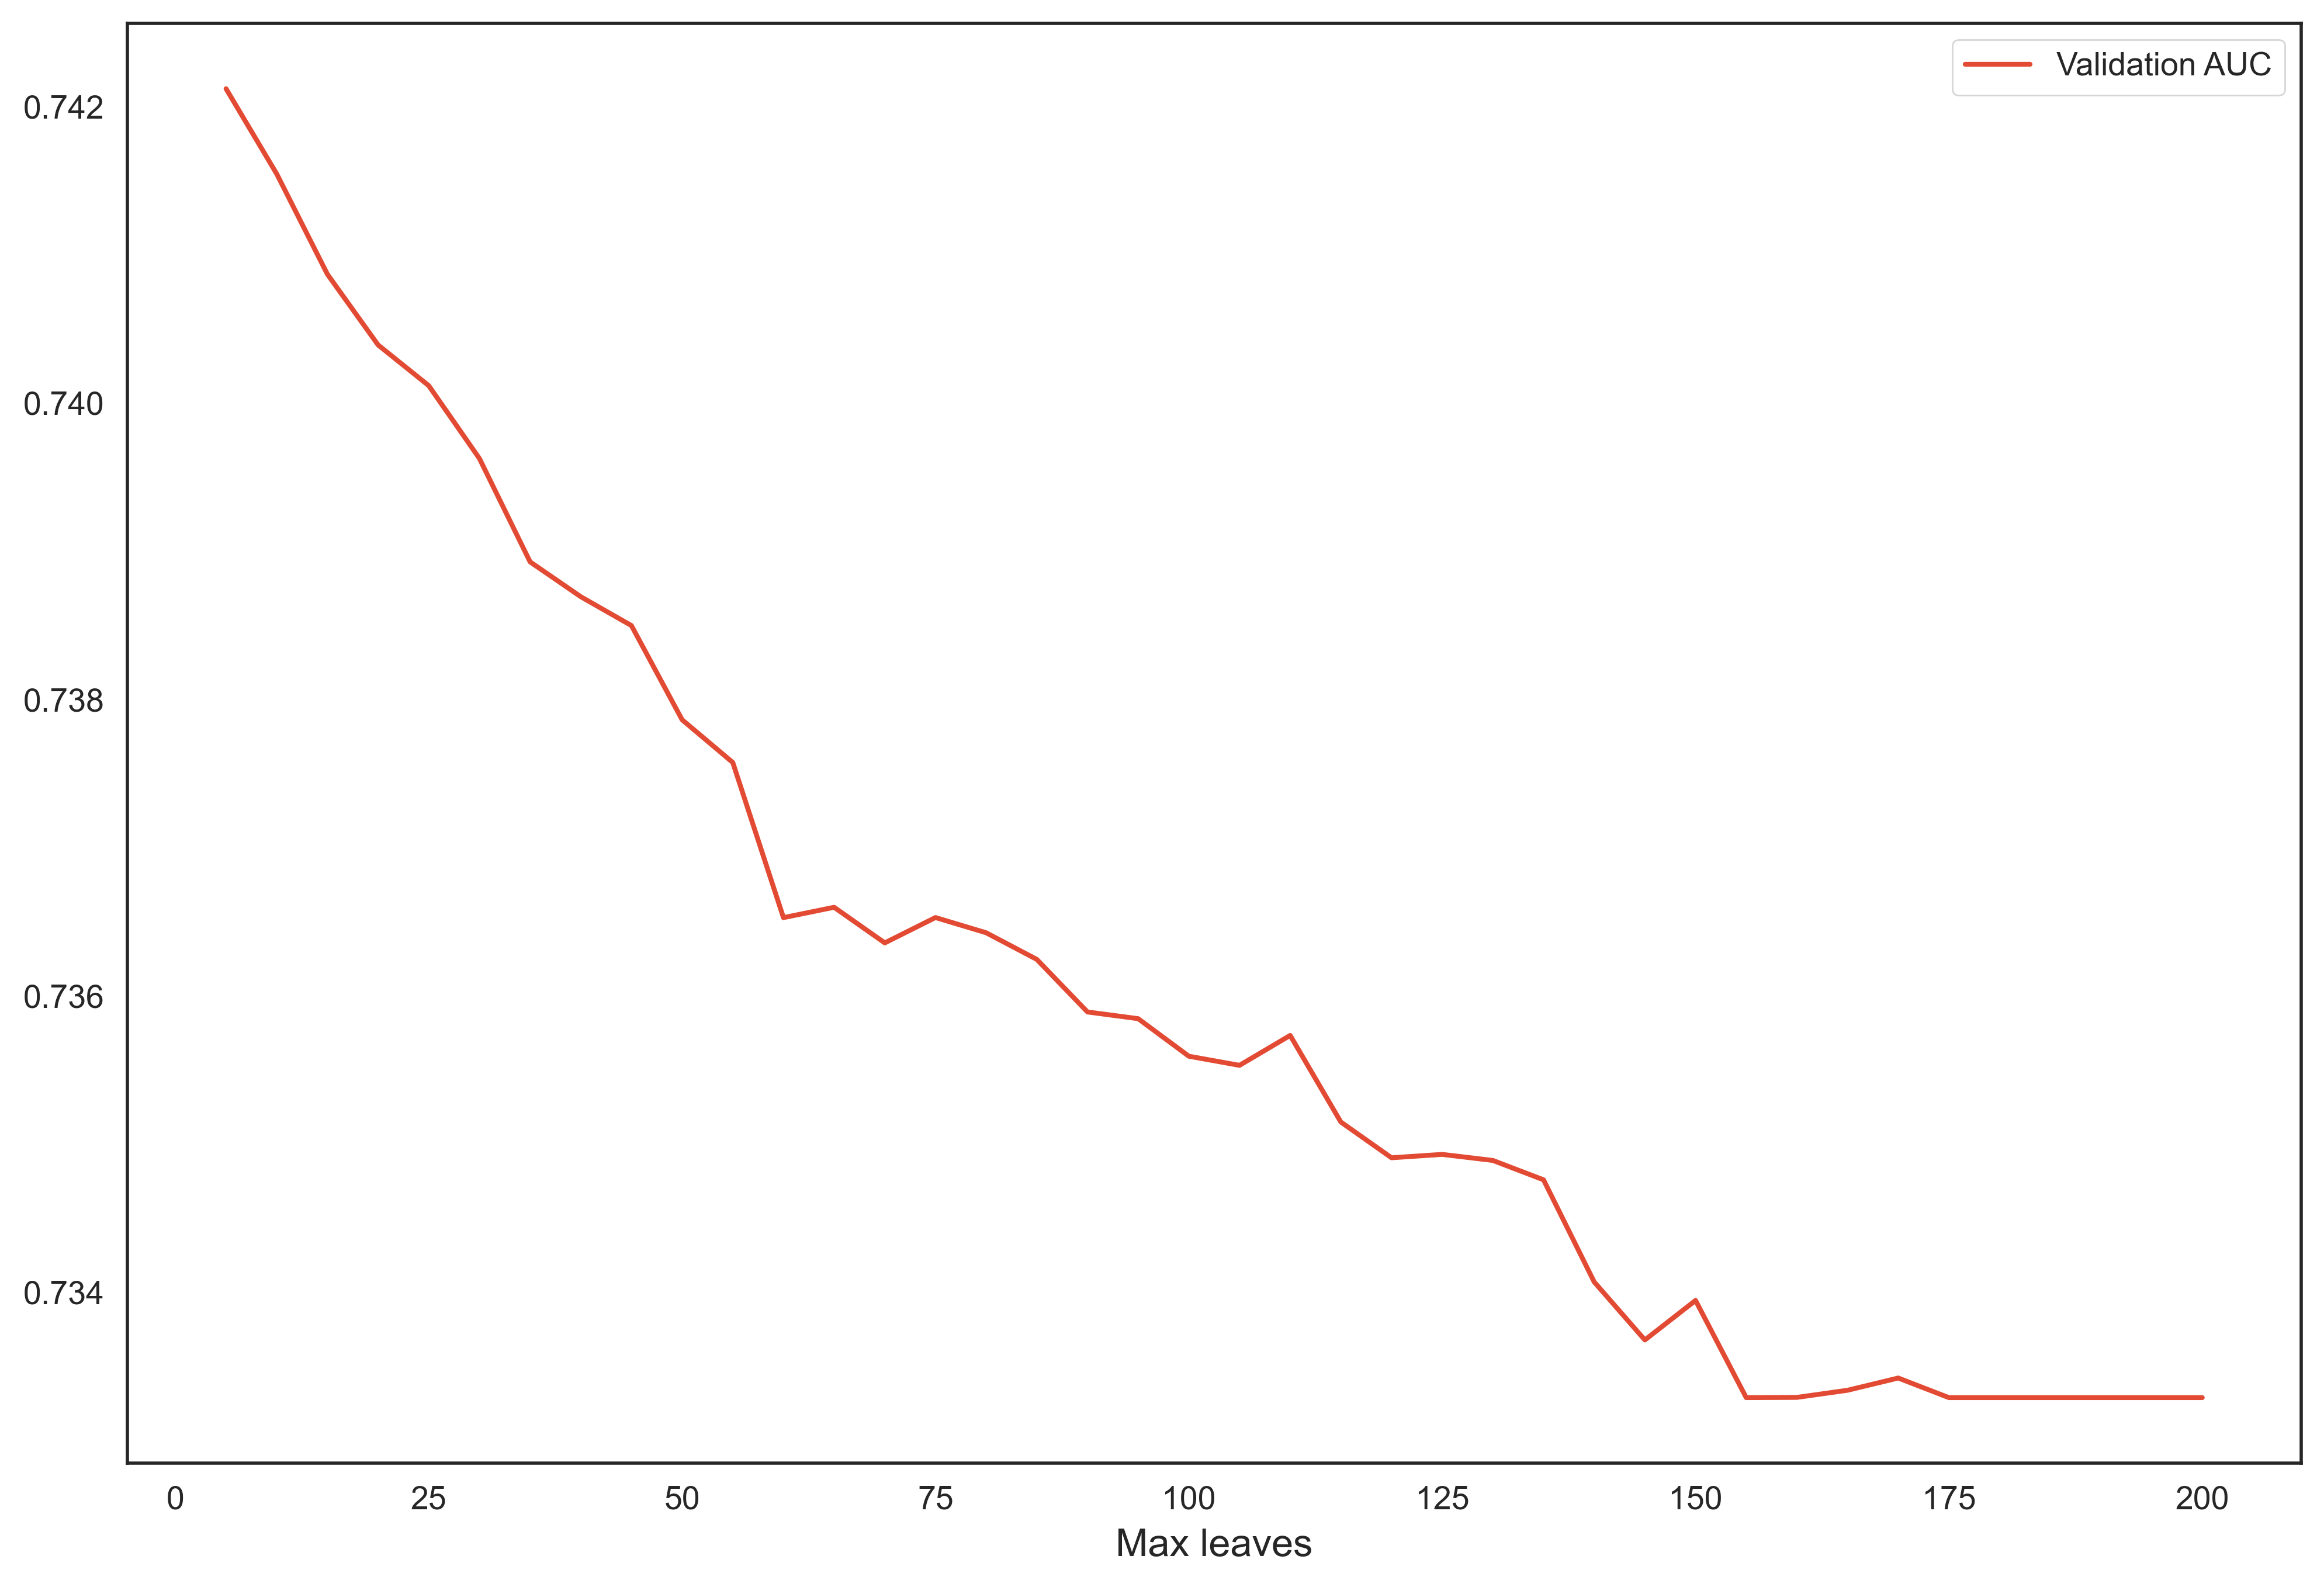

In [112]:
max_leaves_df_2 = pd.DataFrame({'Max leaves':max_leaves_values,'Validation AUC':val_aucs})
mpl.rcParams['figure.dpi'] = 400
max_leaves_df_2.set_index('Max leaves').plot()

In [113]:
# check max AUC for Validation df
max_auc_2 = max_leaves_df_2['Validation AUC'].max()
max_ix_2 = max_leaves_df_2['Validation AUC'] == max_auc_2
max_leaves_df_2[max_ix_2]

Max leaves  Validation AUC
0           5            0.74

In [114]:
xgb_model_4.set_params(**{'max_leaves':5})
xgb_model_4.fit(X_train_2, y_train_2,eval_set=eval_set_2,eval_metric='auc',verbose=False,early_stopping_rounds=0)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy='lossguide',
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=0,
              max_leaves=5, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=1000, n_jobs=-1,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [51]:
X_val_2_df = pd.DataFrame(data=X_val_2,columns=cols)

 97%|=================== | 4663/4800 [00:31<00:00]       

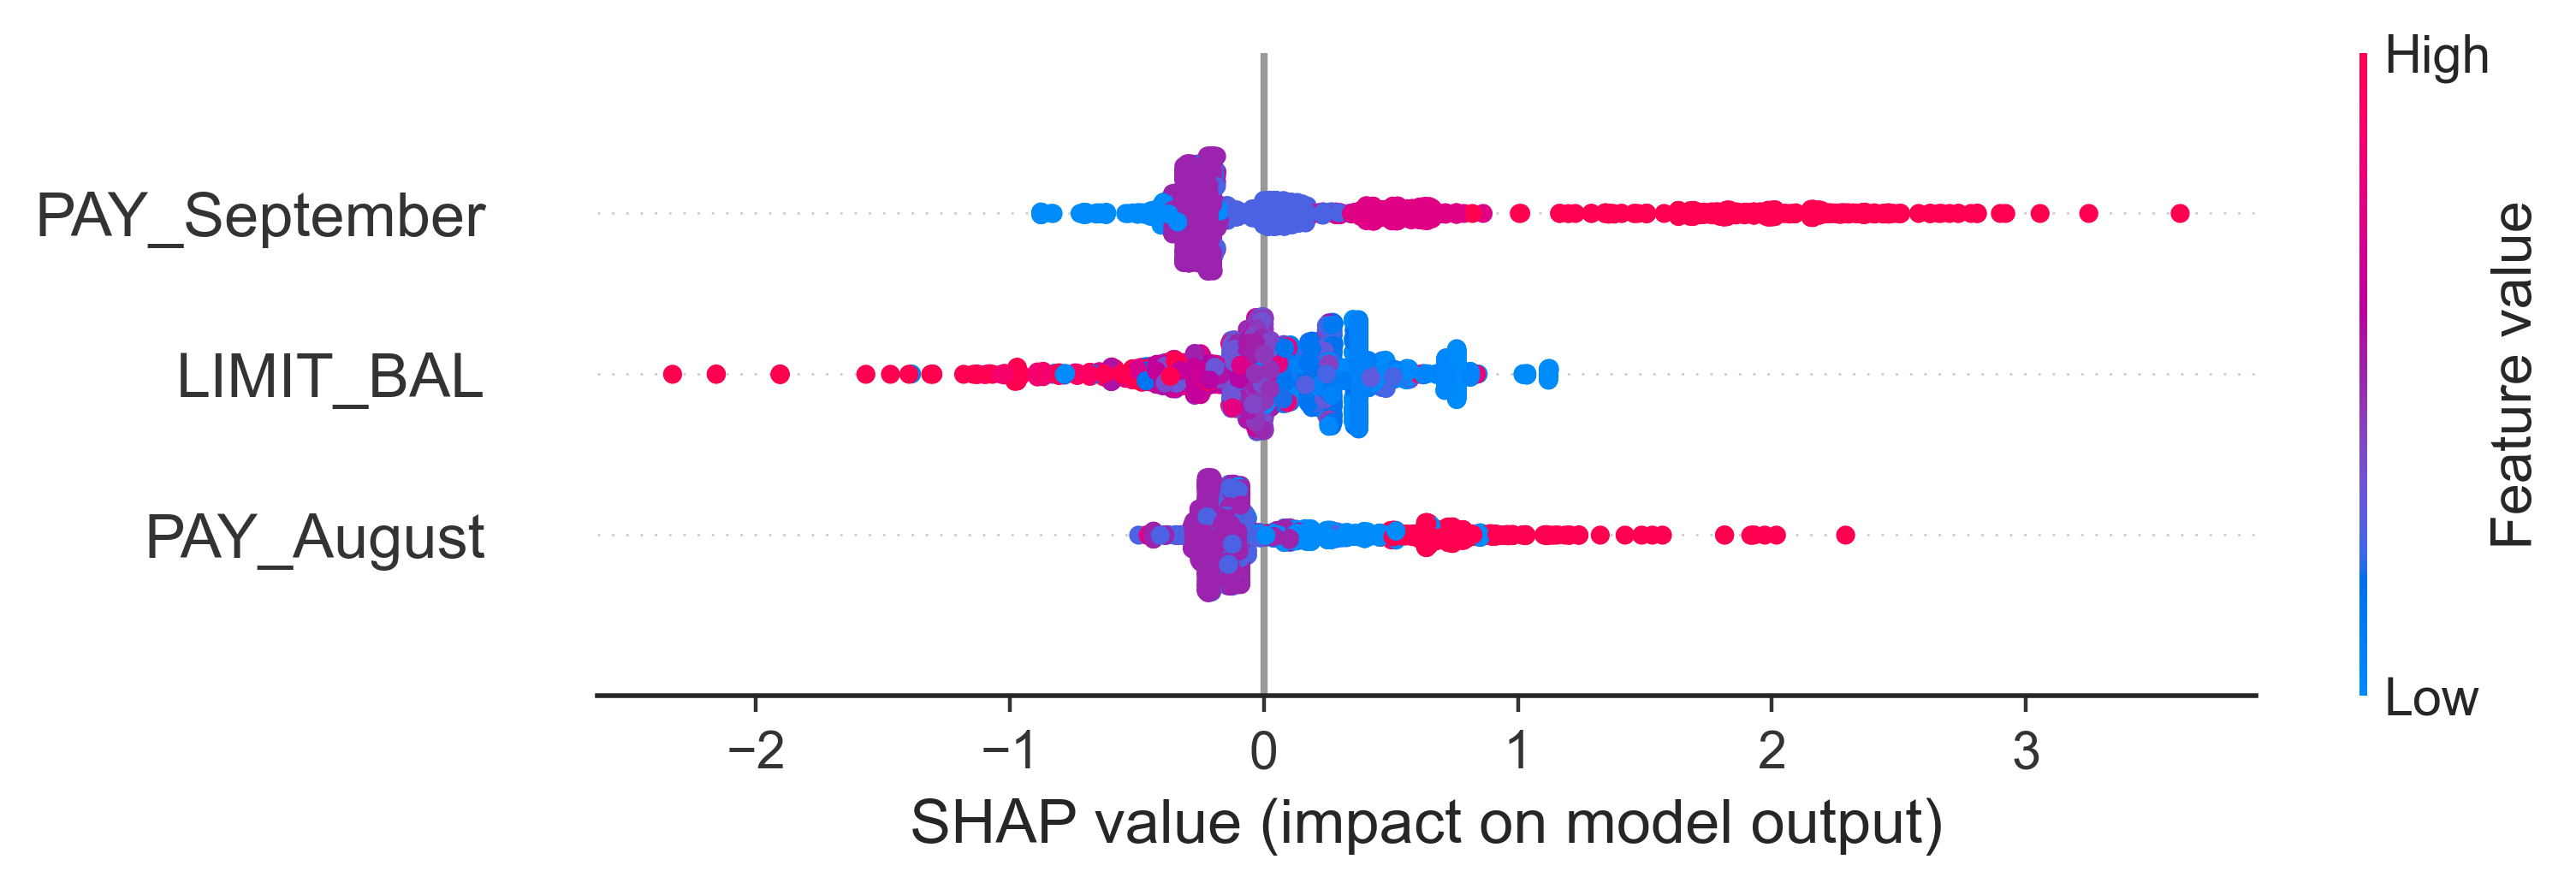

In [120]:
#as we seen in above graph value of Pay_sept & Pay_Aug gets higher mostly likely to get defaulted 
#Lower value for limit_bal move towards default list

explainer_2 = shap.explainers.Tree(xgb_model_4, data=X_val_2)
shap_values_2 = explainer_2(X_val_2)
mpl.rcParams['figure.dpi'] = 400
shap.summary_plot(shap_values_2.values, X_val_2)

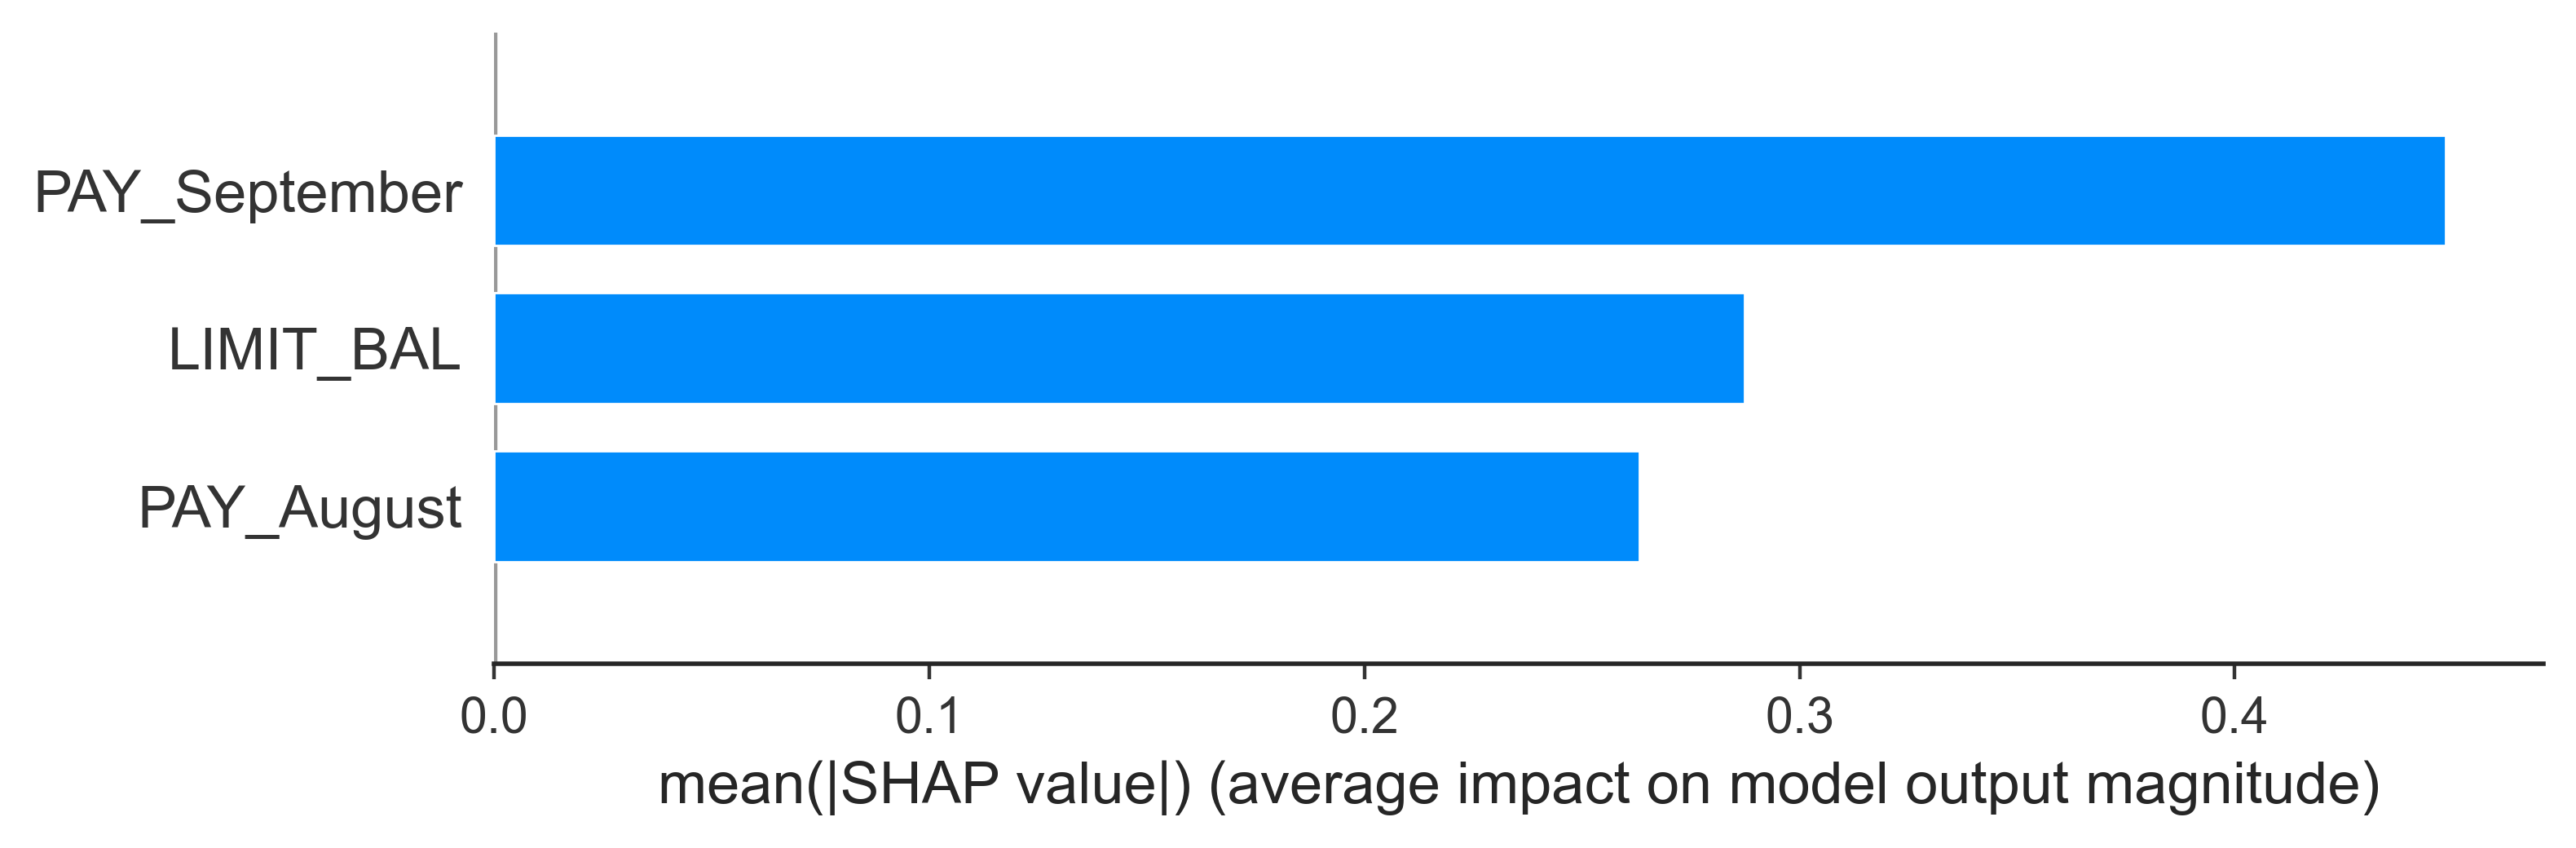

In [121]:
shap.summary_plot(shap_values_2.values, X_val_2,plot_type = 'bar')

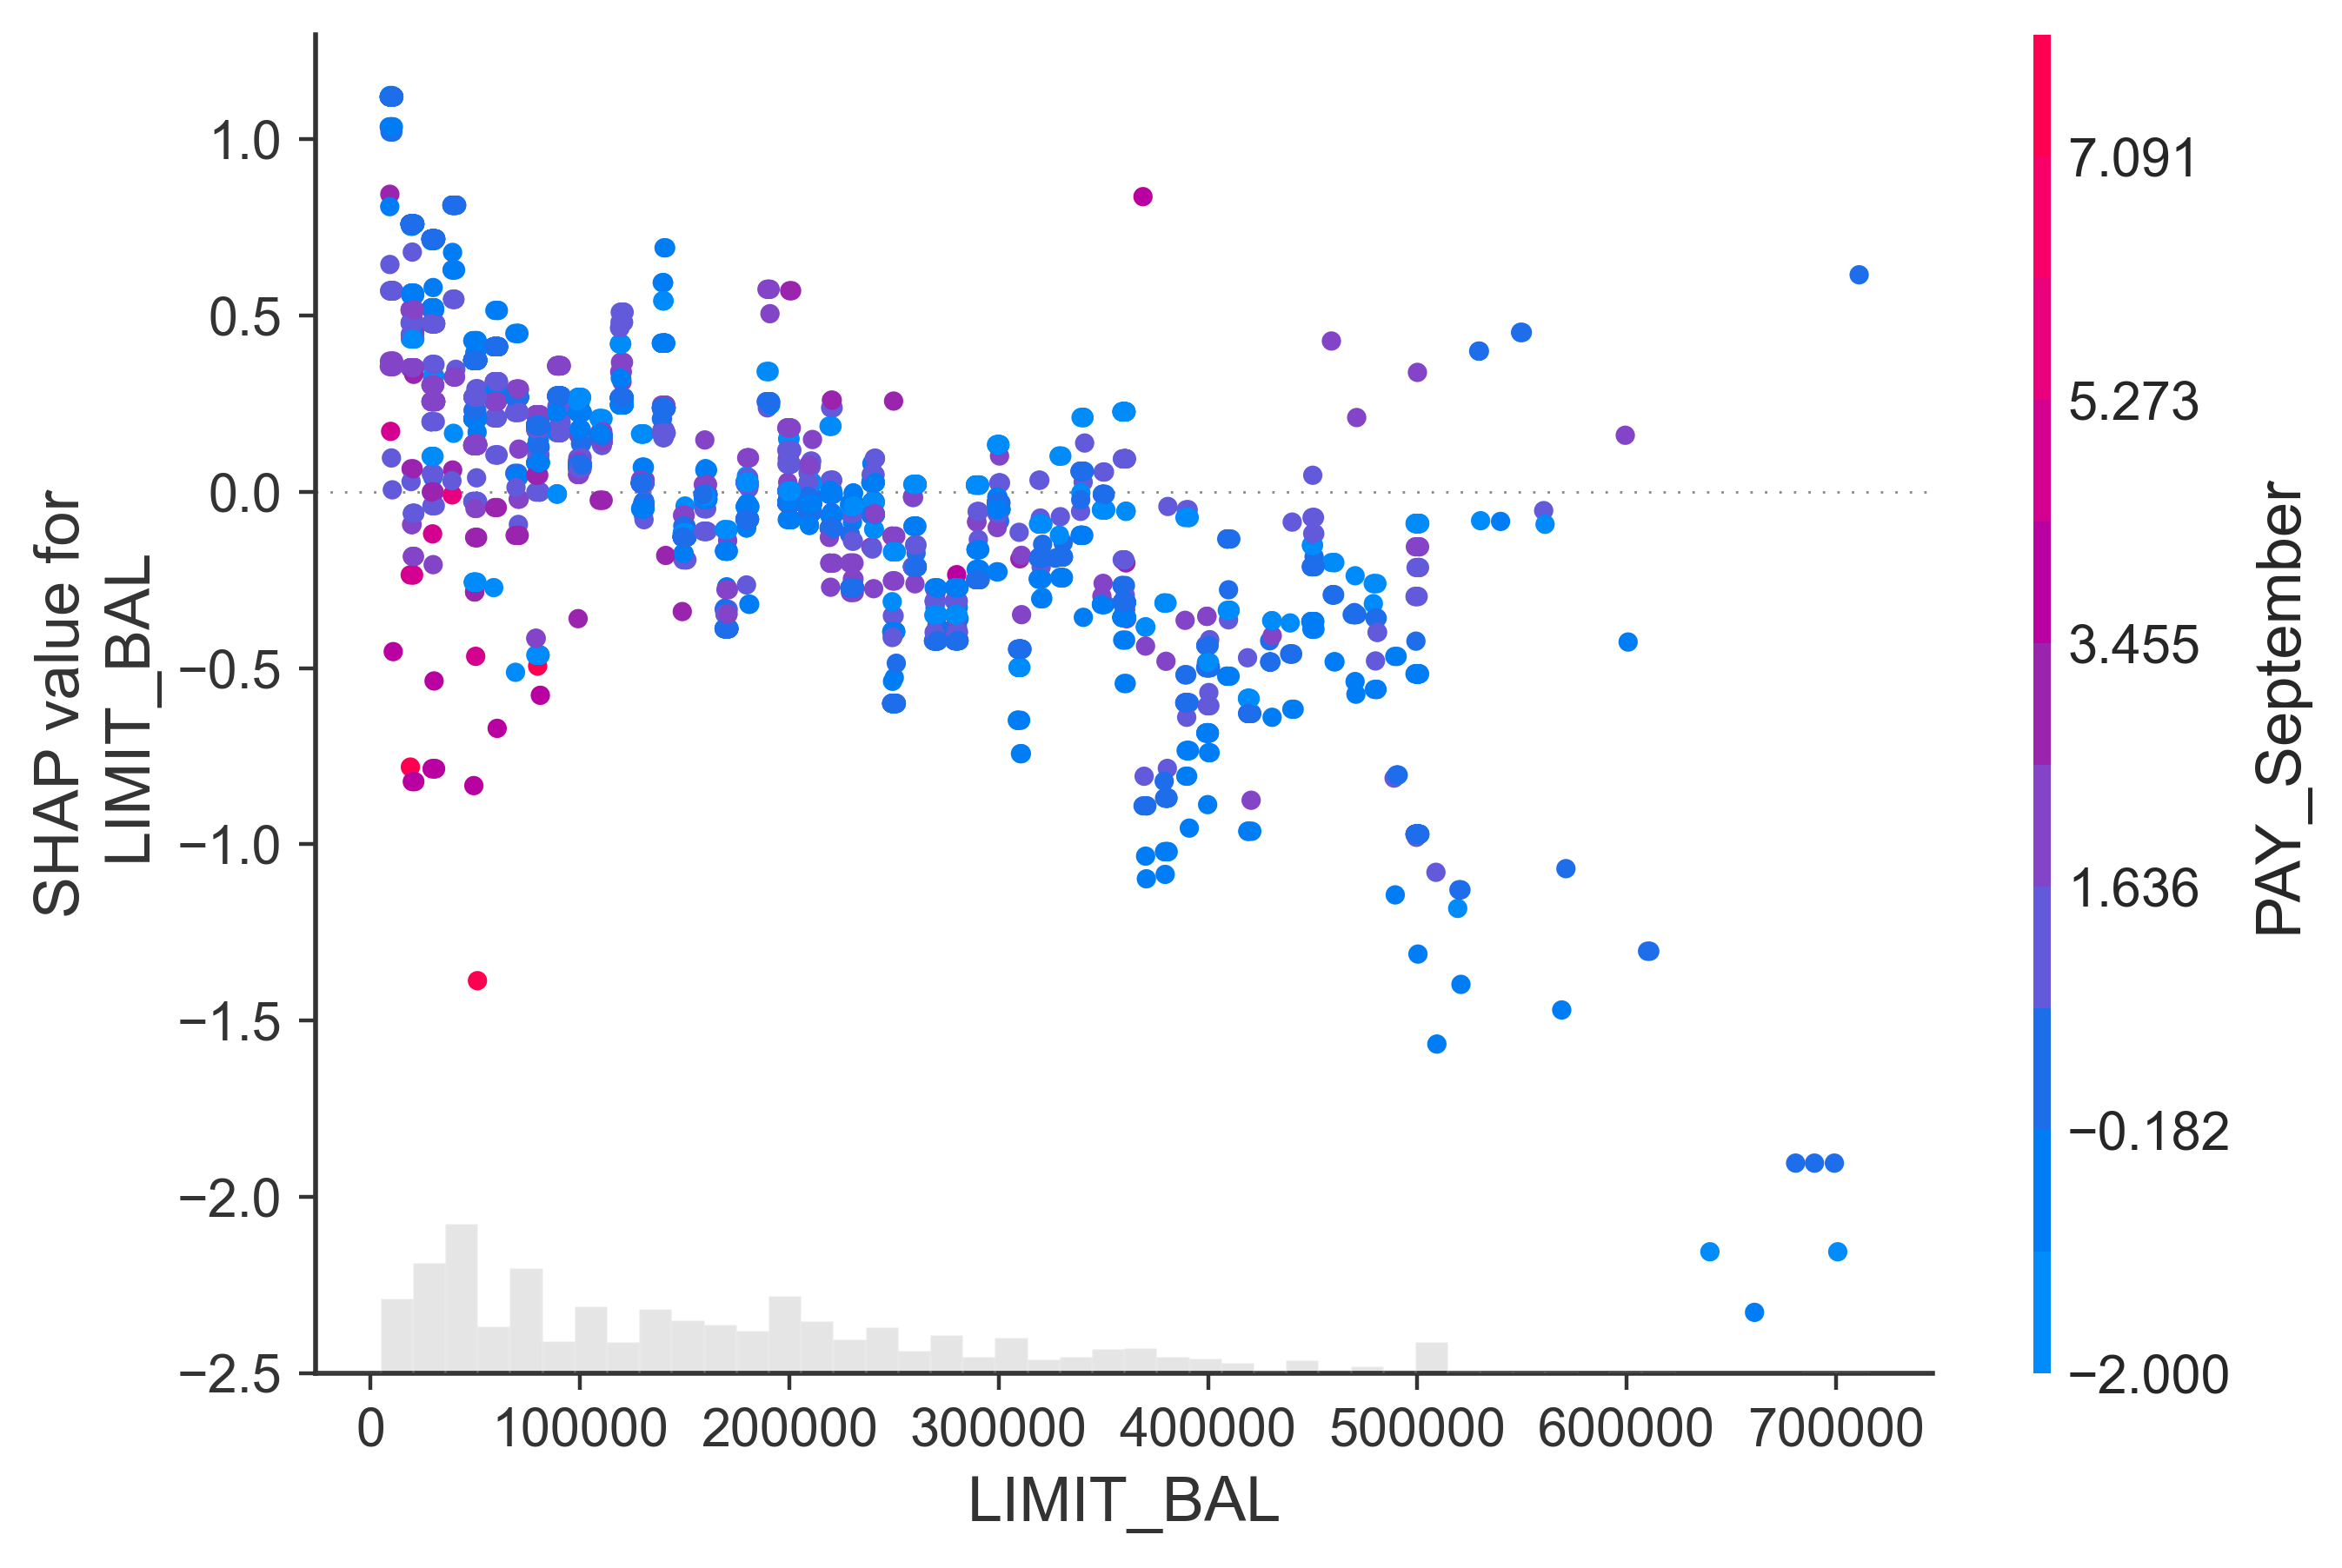

In [122]:
# lower limit_bal with Pay_sept >0 will mostly be default
shap.plots.scatter(shap_values_2[:,'LIMIT_BAL'],color=shap_values_2)

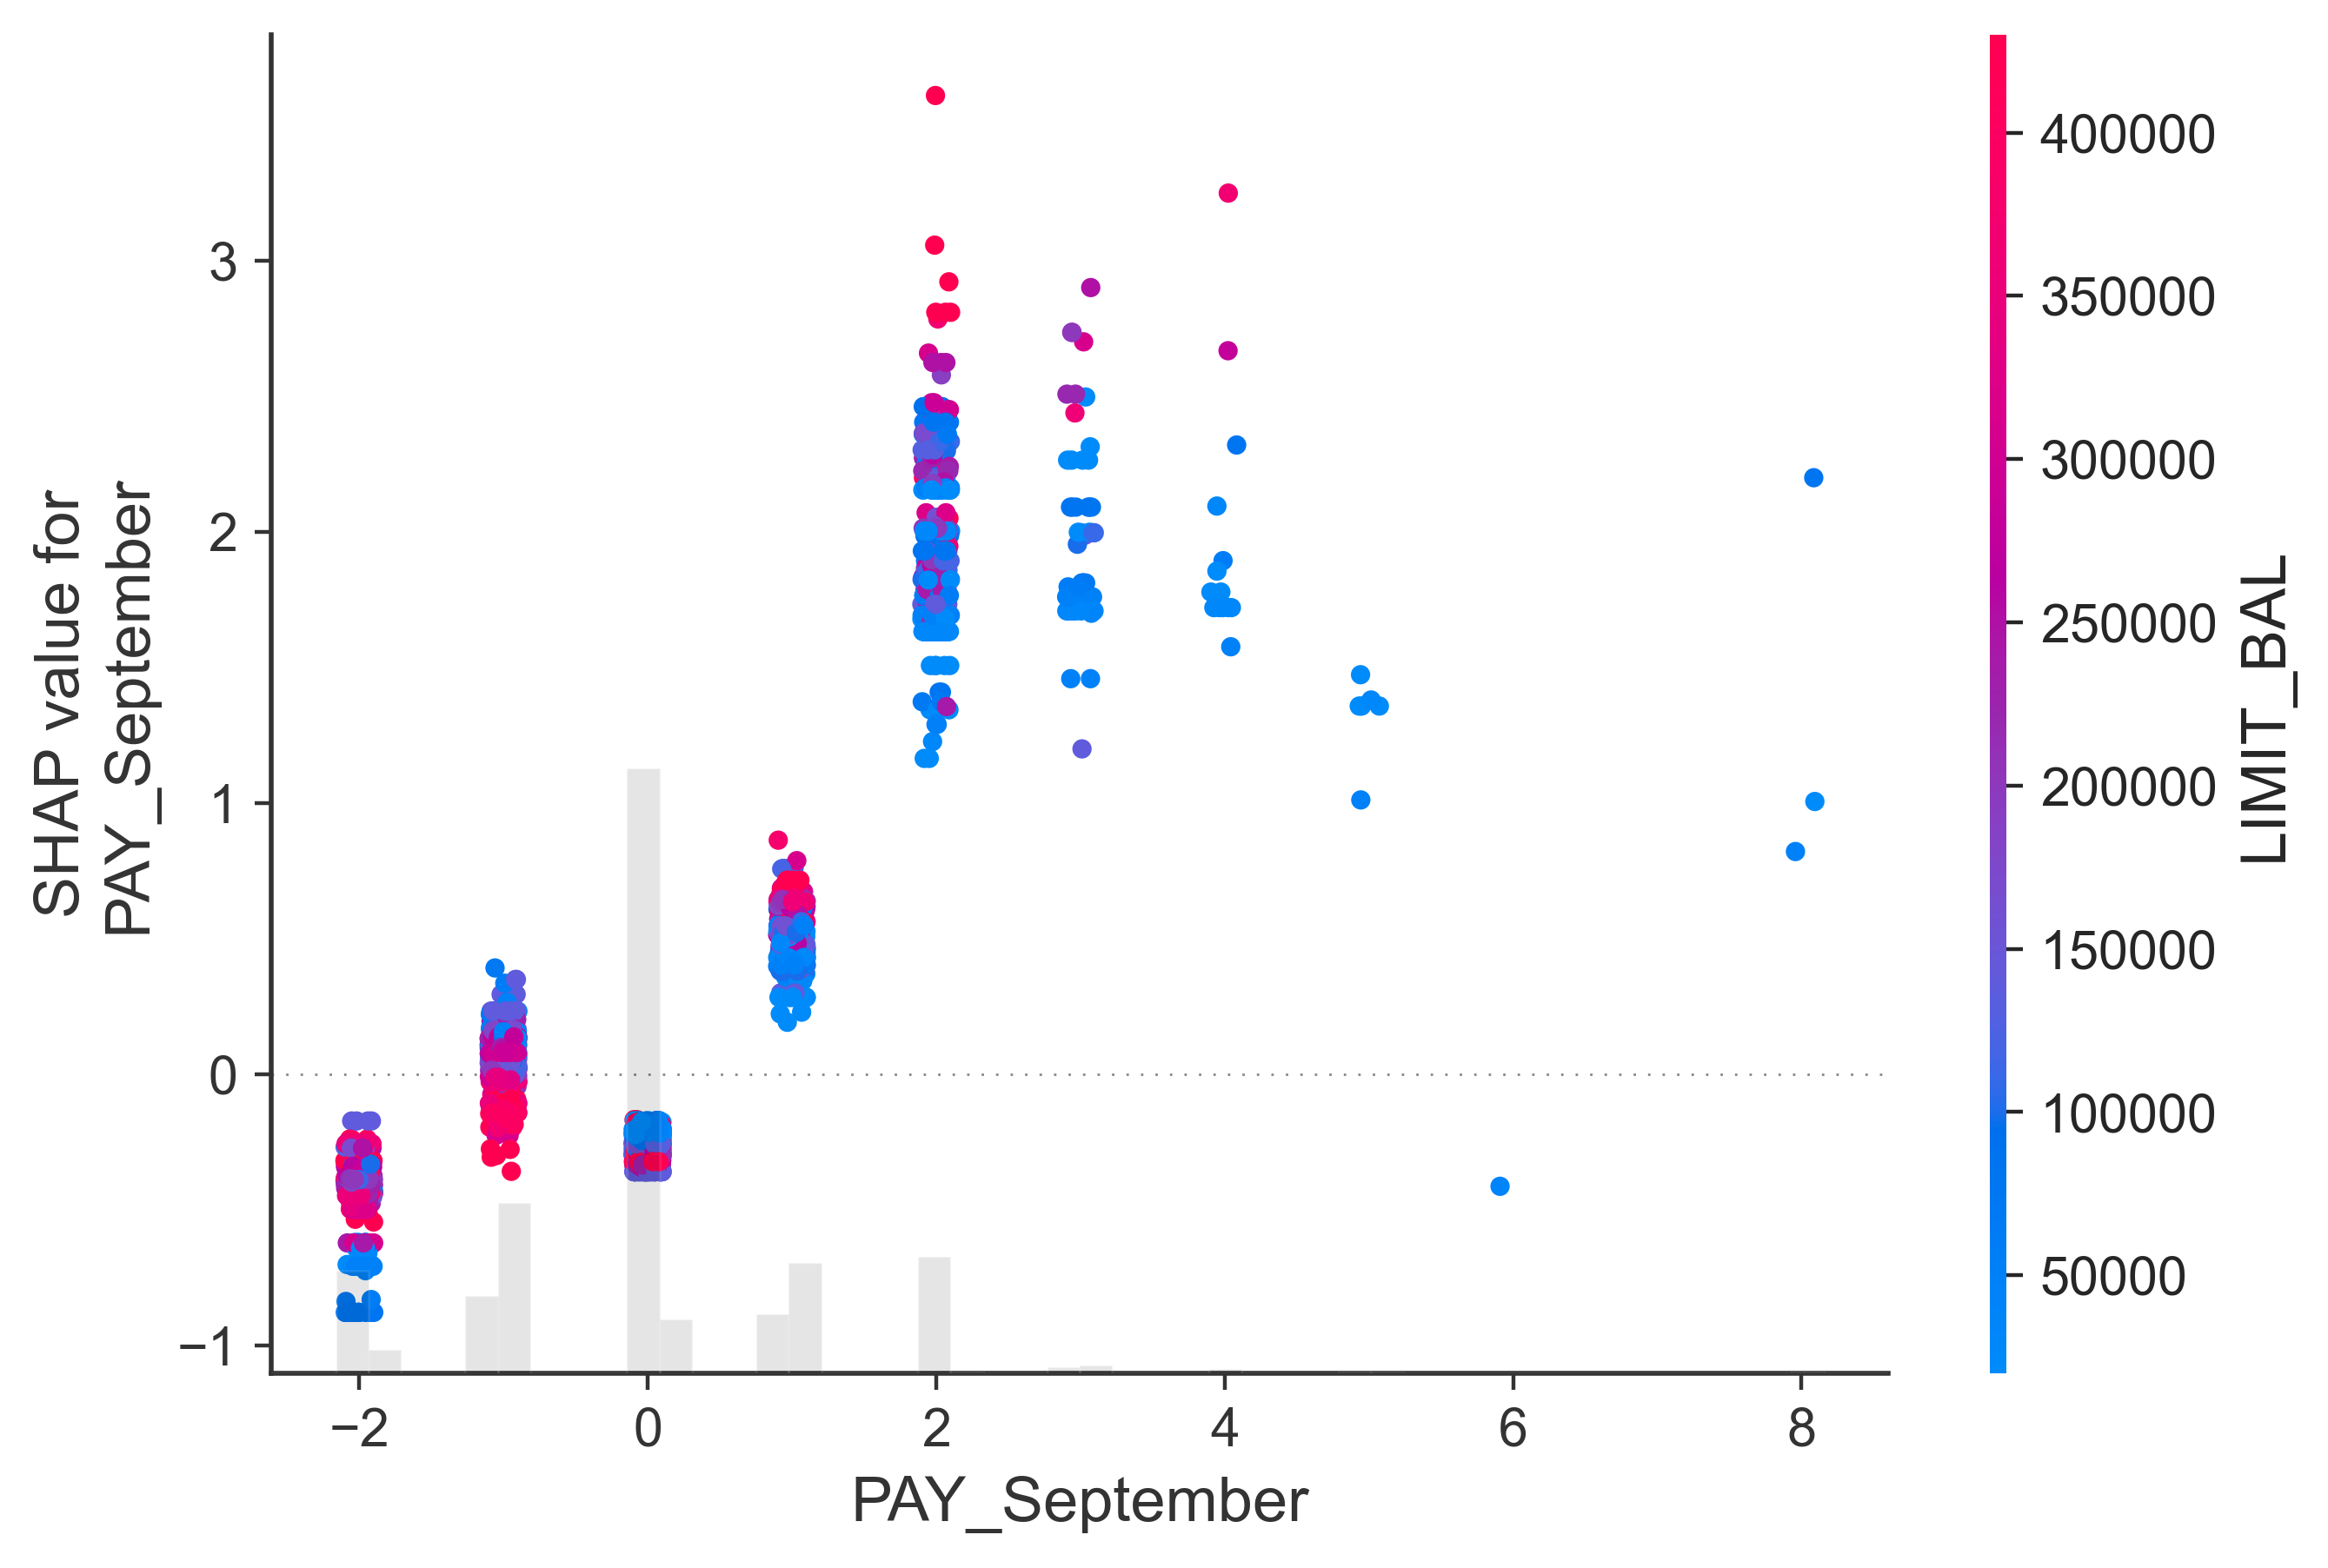

In [123]:
# below graph clearly can be seen Limit_bal <200000 mostly fall in Pay_sept[1-8] will get defaulted
shap.plots.scatter(shap_values_2[:,'PAY_September'],color=shap_values_2[:,'LIMIT_BAL'])

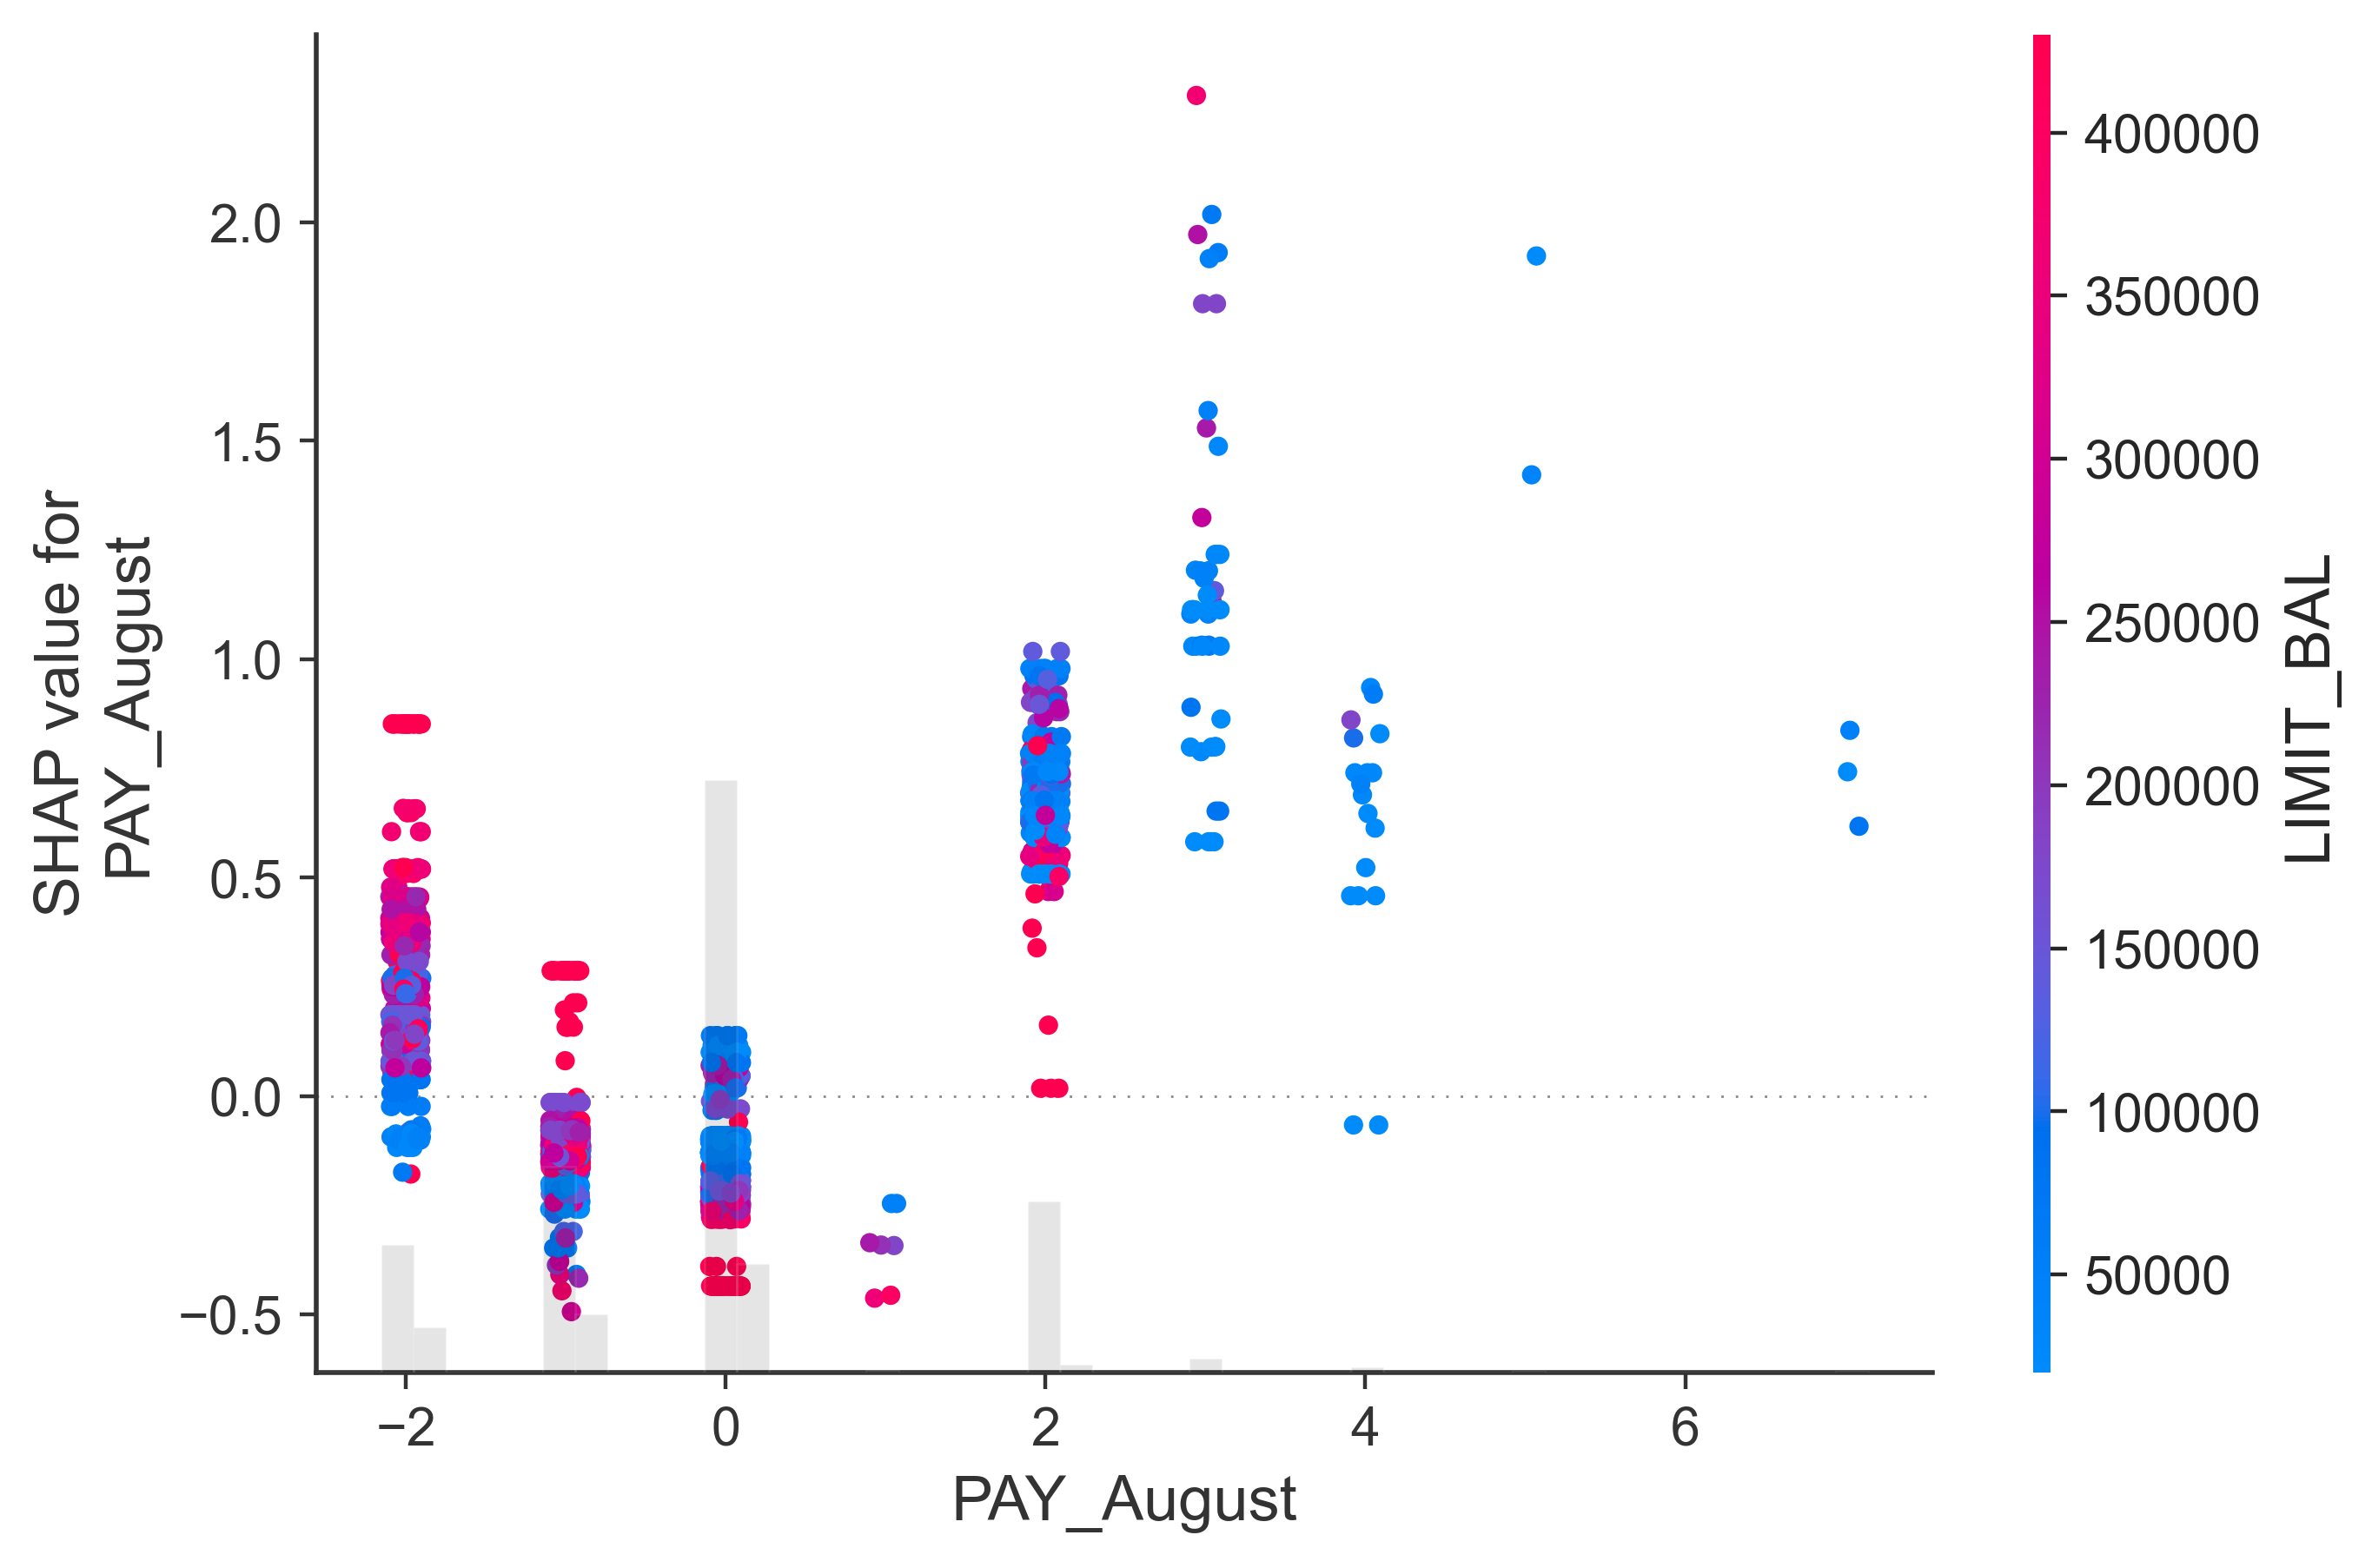

In [124]:
# Similar graph shows same as Pay_sept & Pay_Aug(past month)
shap.plots.scatter(shap_values_2[:,'PAY_August'],color=shap_values_2[:,'LIMIT_BAL'])

In [125]:
cols

['PAY_September', 'LIMIT_BAL', 'PAY_August']

In [126]:
# The process of converting a Python object into a byte stream to store it in a file/database
# dumping the Model and data
with open('xgb_model_impfea_final.pkl', 'wb') as f:
    pickle.dump([X_train,y_train,X_test,y_test,cols,xgb_model_4], f)

In [63]:
# deserializing the model and load data from pickel file
with open('xgb_model_impfea_final.pkl', 'rb') as f:
    X_train, y_train, X_test,y_test, cols,xgb_model_4 = pickle.load(f)

In [64]:
# Predict the probability for 1
test_set_pred_proba = xgb_model_4.predict_proba(X_test[cols])[:,1]

In [65]:
y_pred = xgb_model_4.predict(X_test[cols])

In [66]:
# AUC for unseen test data
from sklearn.metrics import roc_auc_score
test_auc = roc_auc_score(y_test, y_pred)
test_auc

0.6515754392240651

Text(0, 0.5, 'Number of samples')

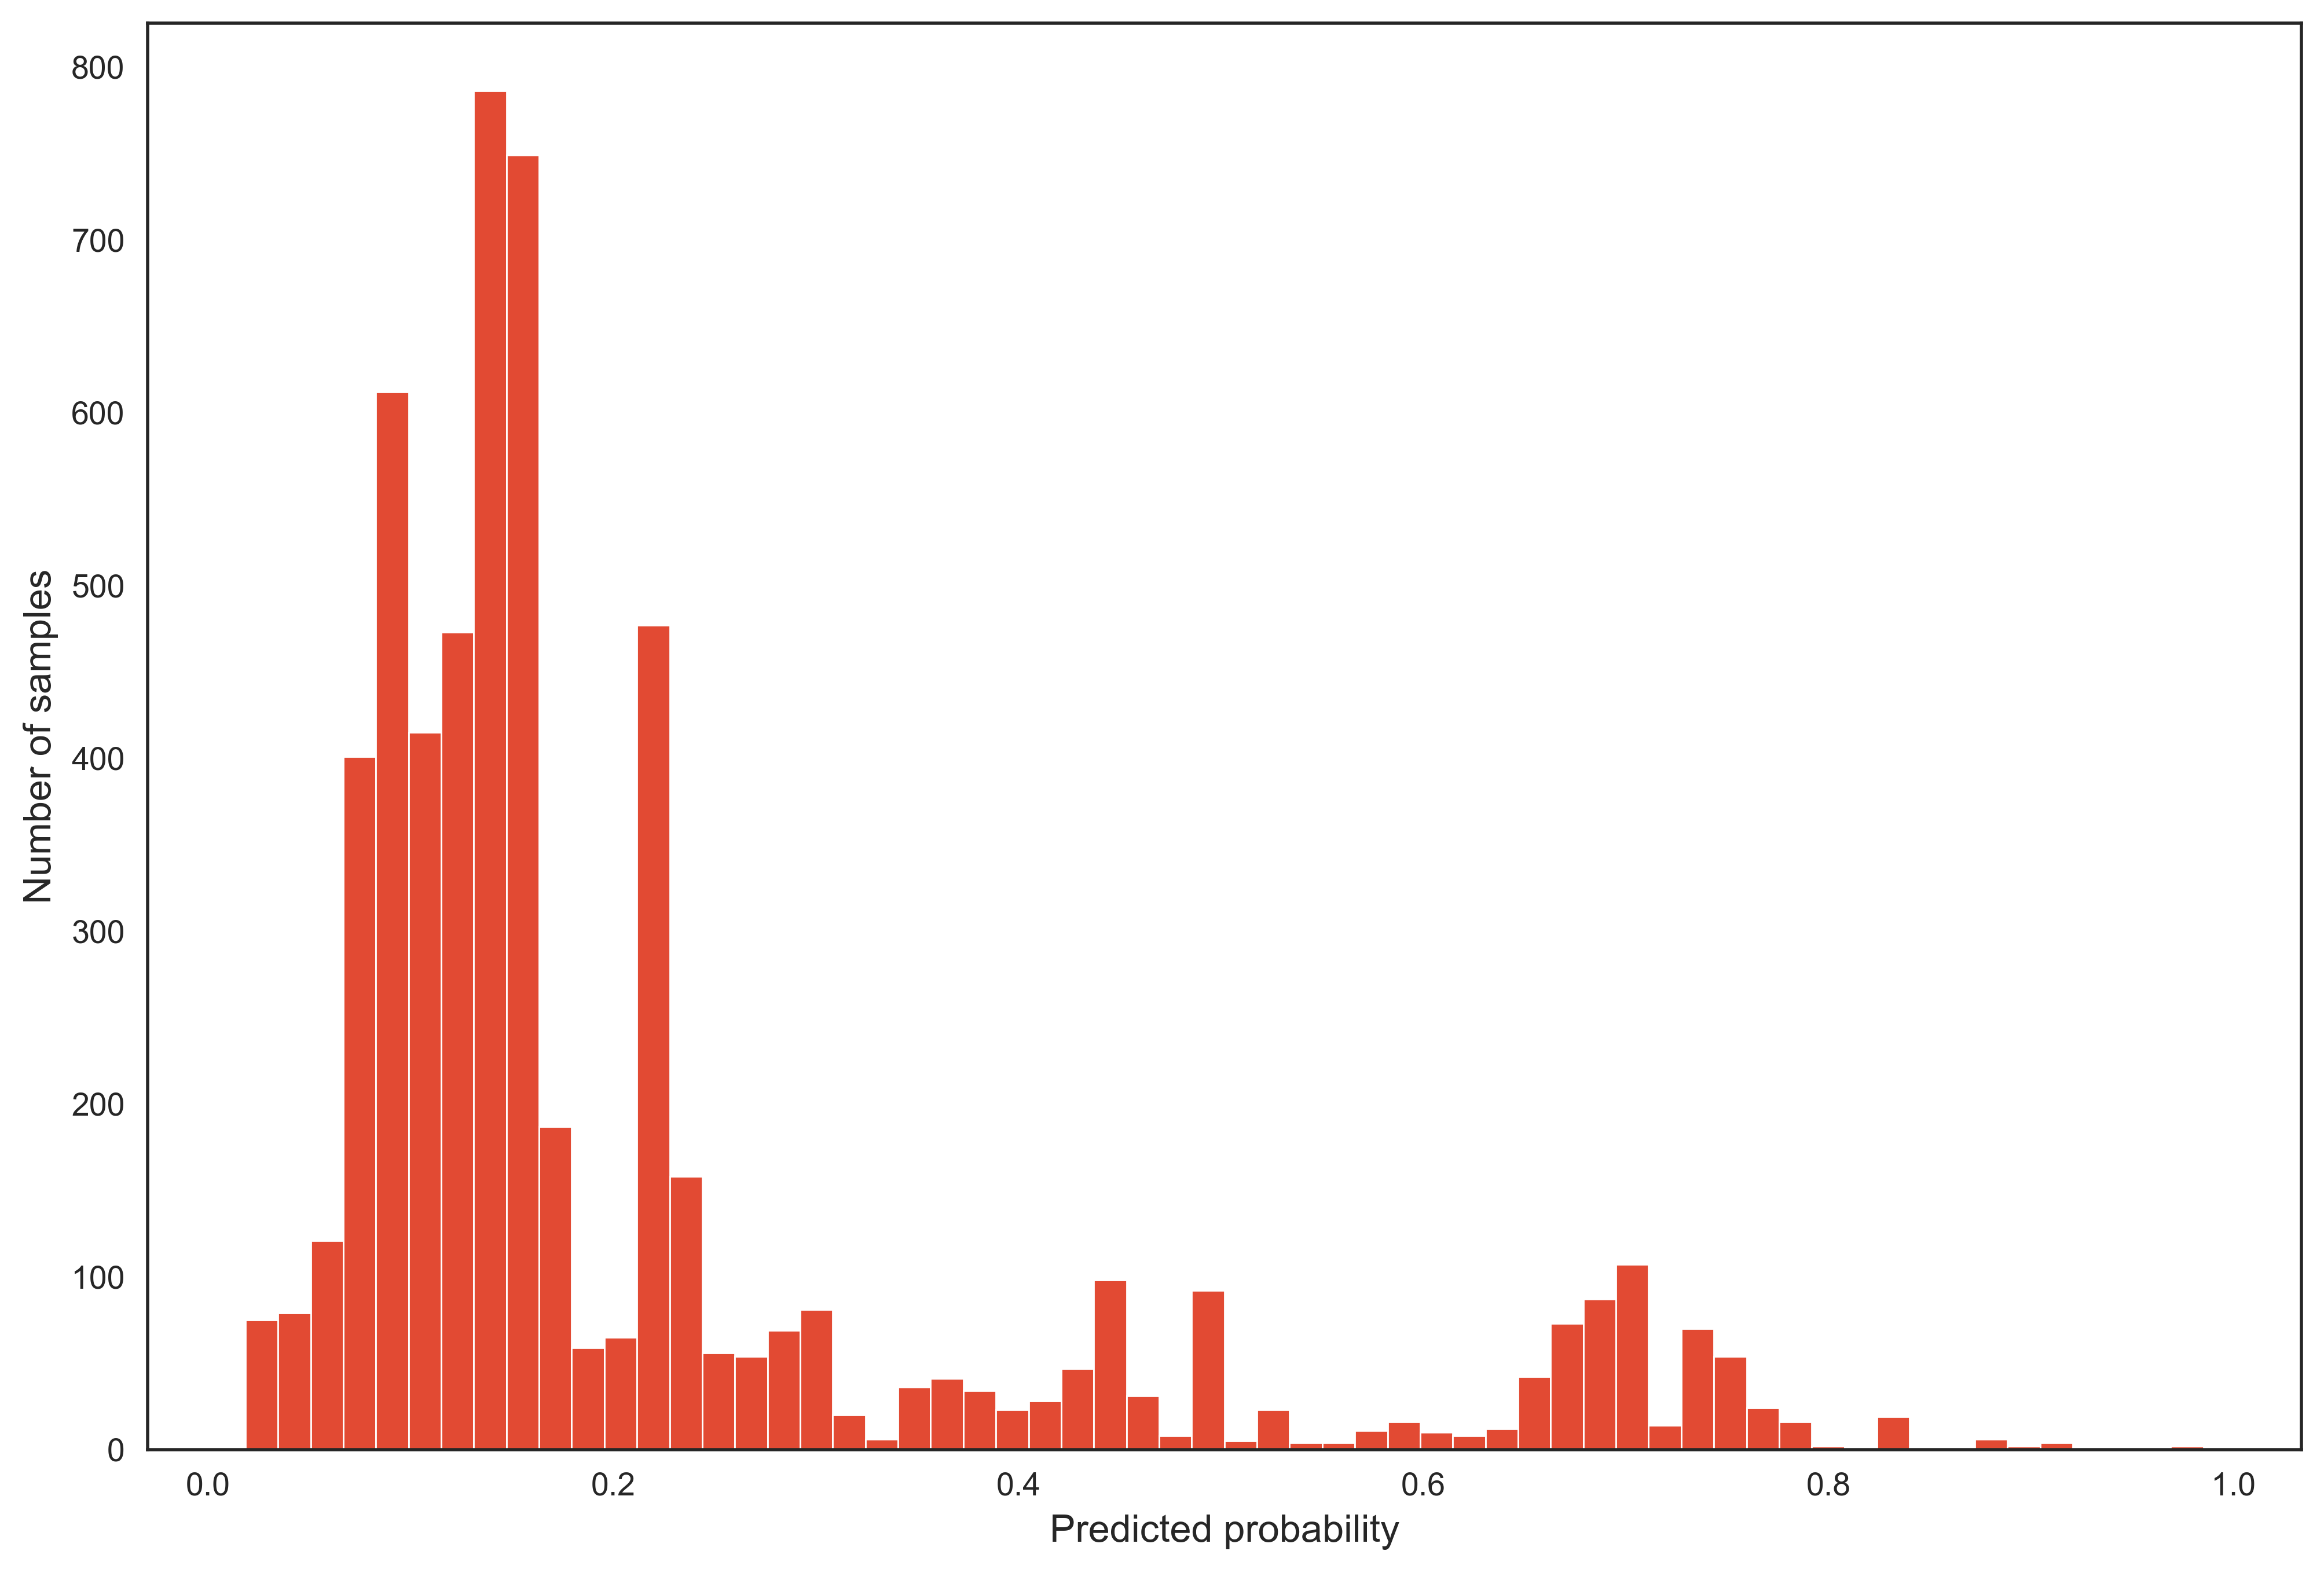

In [67]:
mpl.rcParams['figure.dpi'] = 400
plt.hist(test_set_pred_proba,bins = 60)
plt.xlabel('Predicted probability')
plt.ylabel('Number of samples')

In [68]:
# binning the predicted probability into 10 equal size
deciles, decile_bin_edges = pd.qcut(x=test_set_pred_proba,q=10,retbins=True)

In [69]:
# Comparing with True test data
test_set_df = pd.DataFrame({'Predicted probability':test_set_pred_proba,
                            'Prediction decile':deciles,'Outcome':y_test})
test_set_df.sample(5)

Predicted probability Prediction decile  Outcome
20579                   0.17    (0.163, 0.222]        0
3144                    0.17    (0.163, 0.222]        0
19062                   0.12    (0.119, 0.134]        0
13277                   0.14    (0.134, 0.148]        0
11523                   0.16    (0.148, 0.163]        0

In [70]:
test_set_gr = test_set_df.groupby('Prediction decile')

In [71]:
gr_df = test_set_gr.agg({'Outcome':['count', 'mean']})

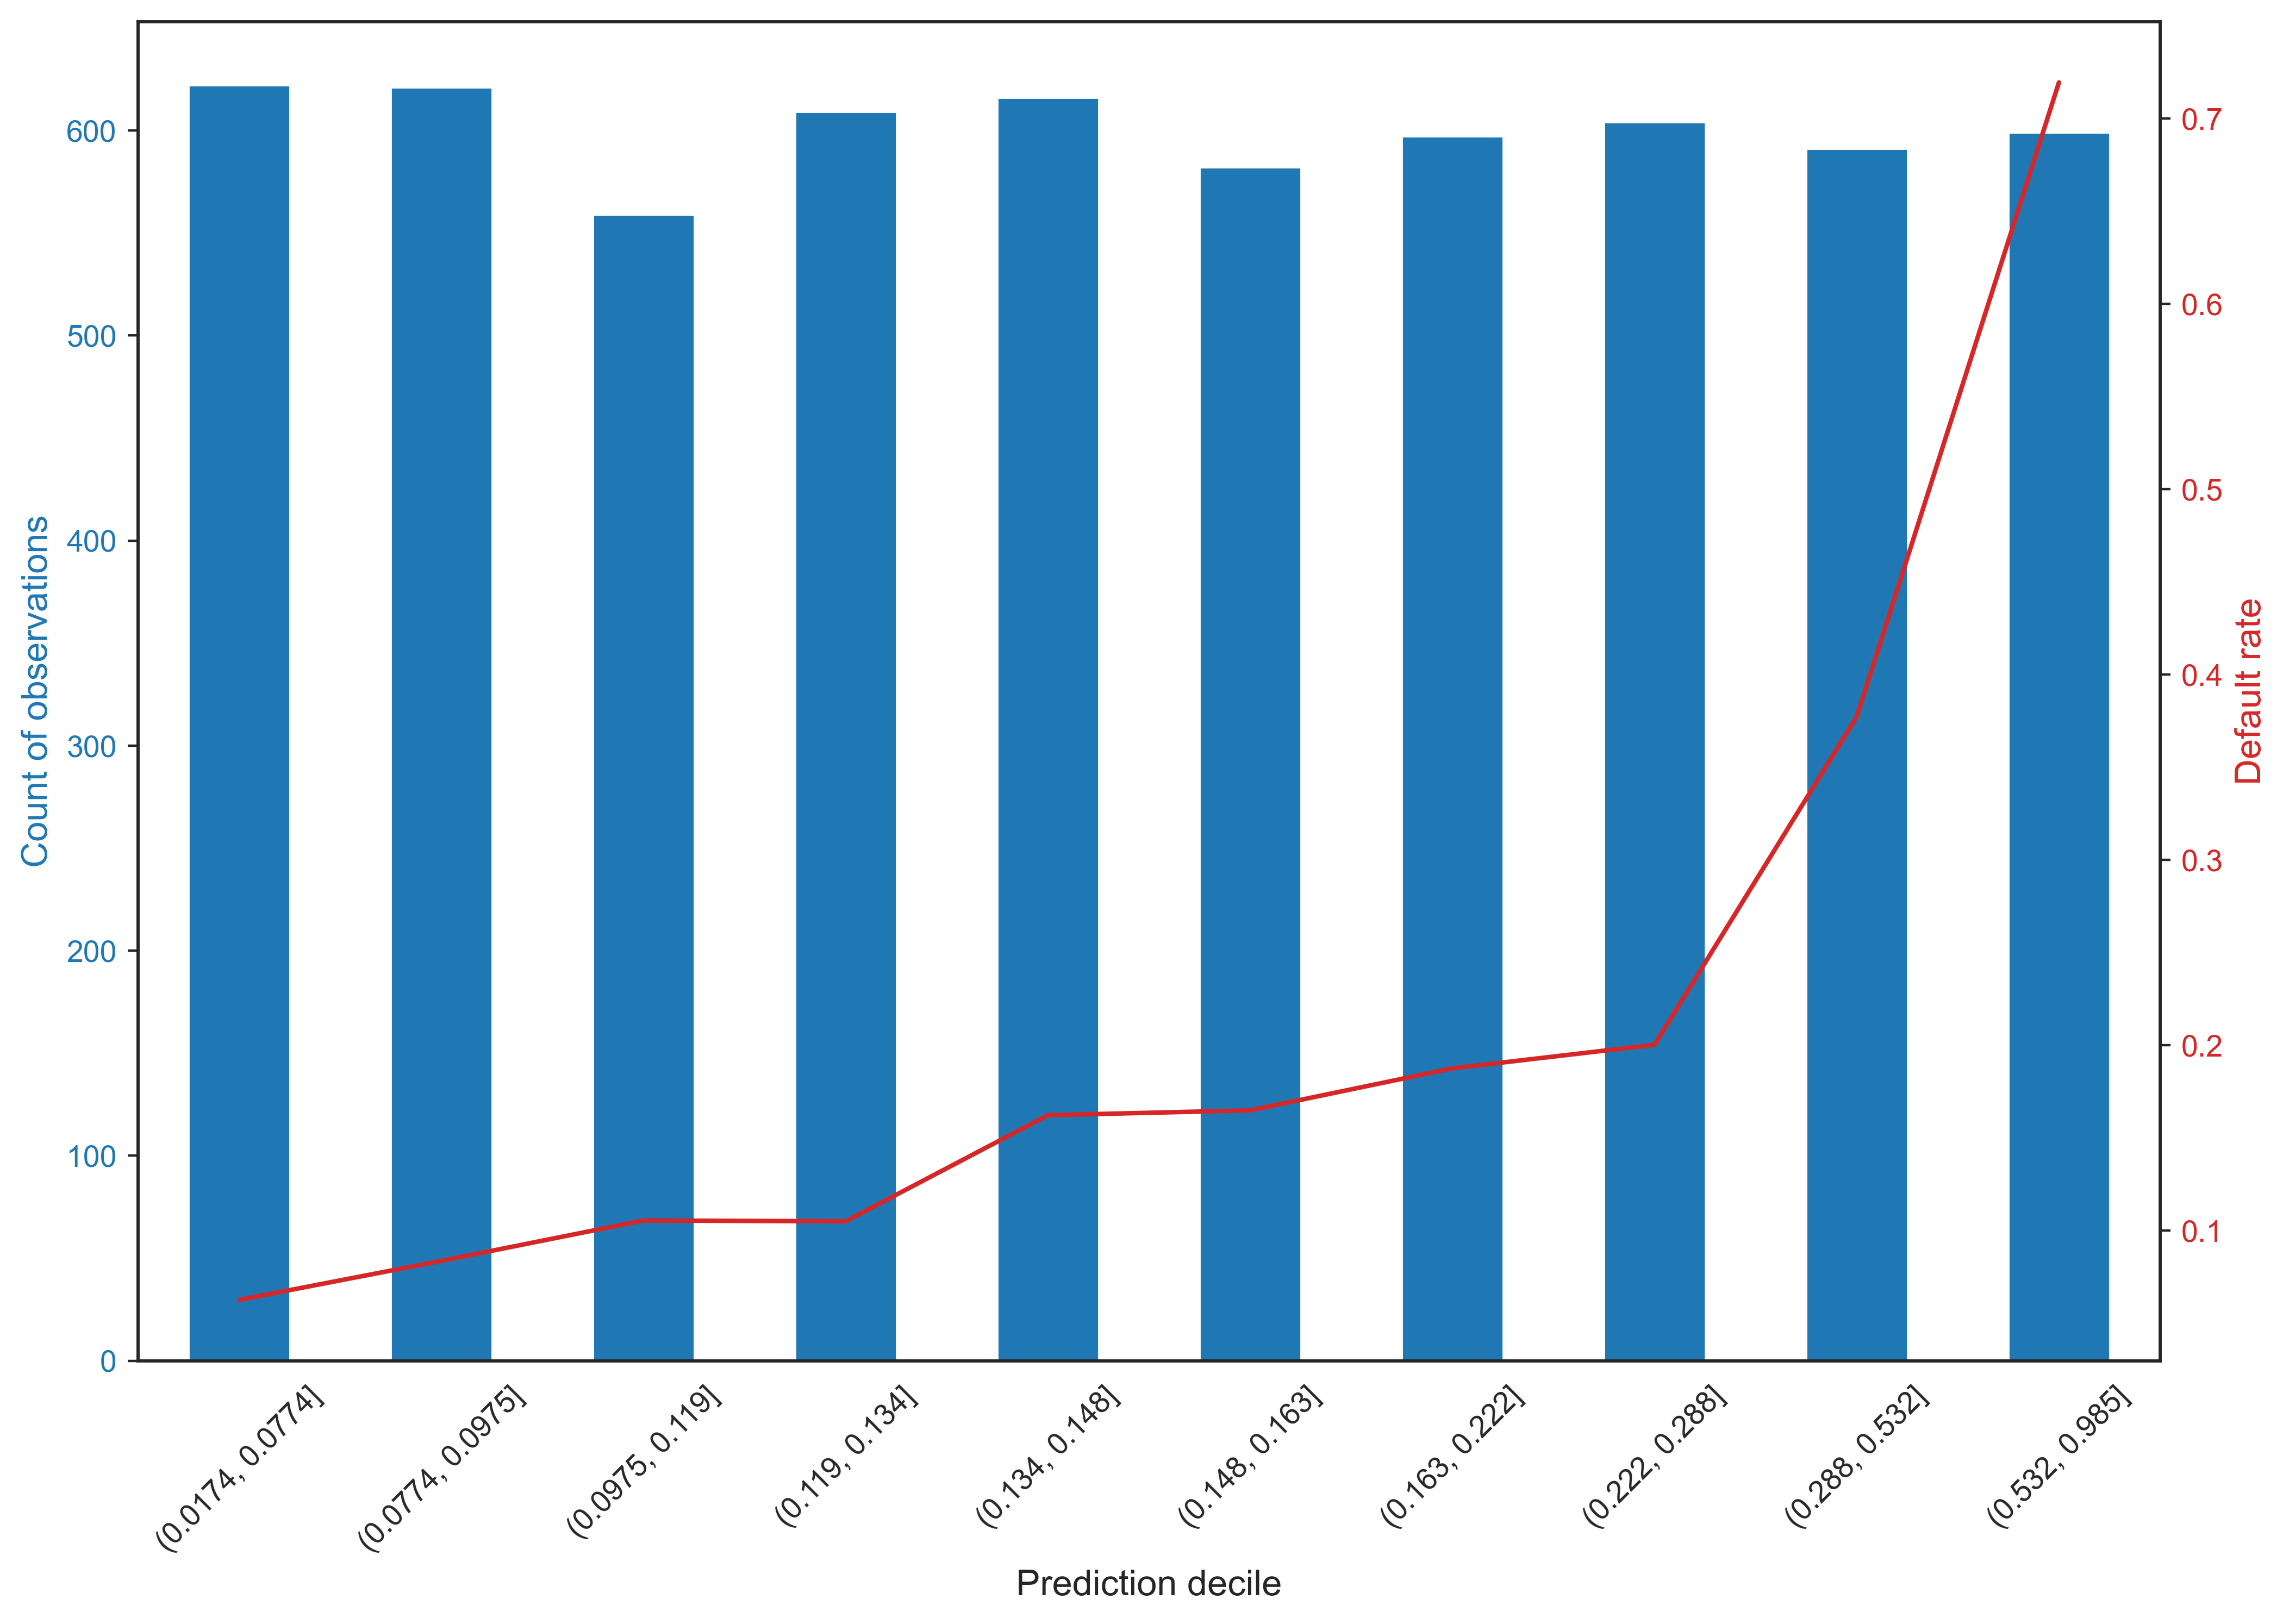

In [72]:
ax_1 = plt.axes()
color_1 = 'tab:blue'
gr_df[('Outcome', 'count')].plot.bar(ax=ax_1, color=color_1)
ax_1.set_ylabel('Count of observations', color=color_1)
ax_1.tick_params(axis='y', labelcolor=color_1)
ax_1.tick_params(axis='x', labelrotation = 45)
ax_2 = ax_1.twinx()
color_2 = 'tab:red'
gr_df[('Outcome', 'mean')].plot(ax=ax_2, color=color_2)
ax_2.set_ylabel('Default rate', color=color_2)
ax_2.tick_params(axis='y', labelcolor=color_2)
# Huge spike from 0.28  to 0.5 probability to predict deafult 

In [73]:
cal_df = test_set_gr.agg({'Outcome':['count', 'mean'],'Predicted probability':'mean'})
cal_df

Outcome      Predicted probability
                    count mean                  mean
Prediction decile                                   
(0.0174, 0.0774]      622 0.06                  0.06
(0.0774, 0.0975]      621 0.08                  0.09
(0.0975, 0.119]       559 0.11                  0.11
(0.119, 0.134]        609 0.11                  0.13
(0.134, 0.148]        616 0.16                  0.14
(0.148, 0.163]        582 0.16                  0.16
(0.163, 0.222]        597 0.19                  0.19
(0.222, 0.288]        604 0.20                  0.24
(0.288, 0.532]        591 0.38                  0.40
(0.532, 0.985]        599 0.72                  0.70

In [74]:
F = cal_df[('Outcome', 'count')].values/y_test.shape[0]

In [75]:
# Below value started to increase our model becoming less calibrated 
ECE = np.sum(F* np.abs(cal_df[('Outcome', 'mean')]- cal_df[('Predicted probability', 'mean')]))
print(ECE)

0.014213759562621518


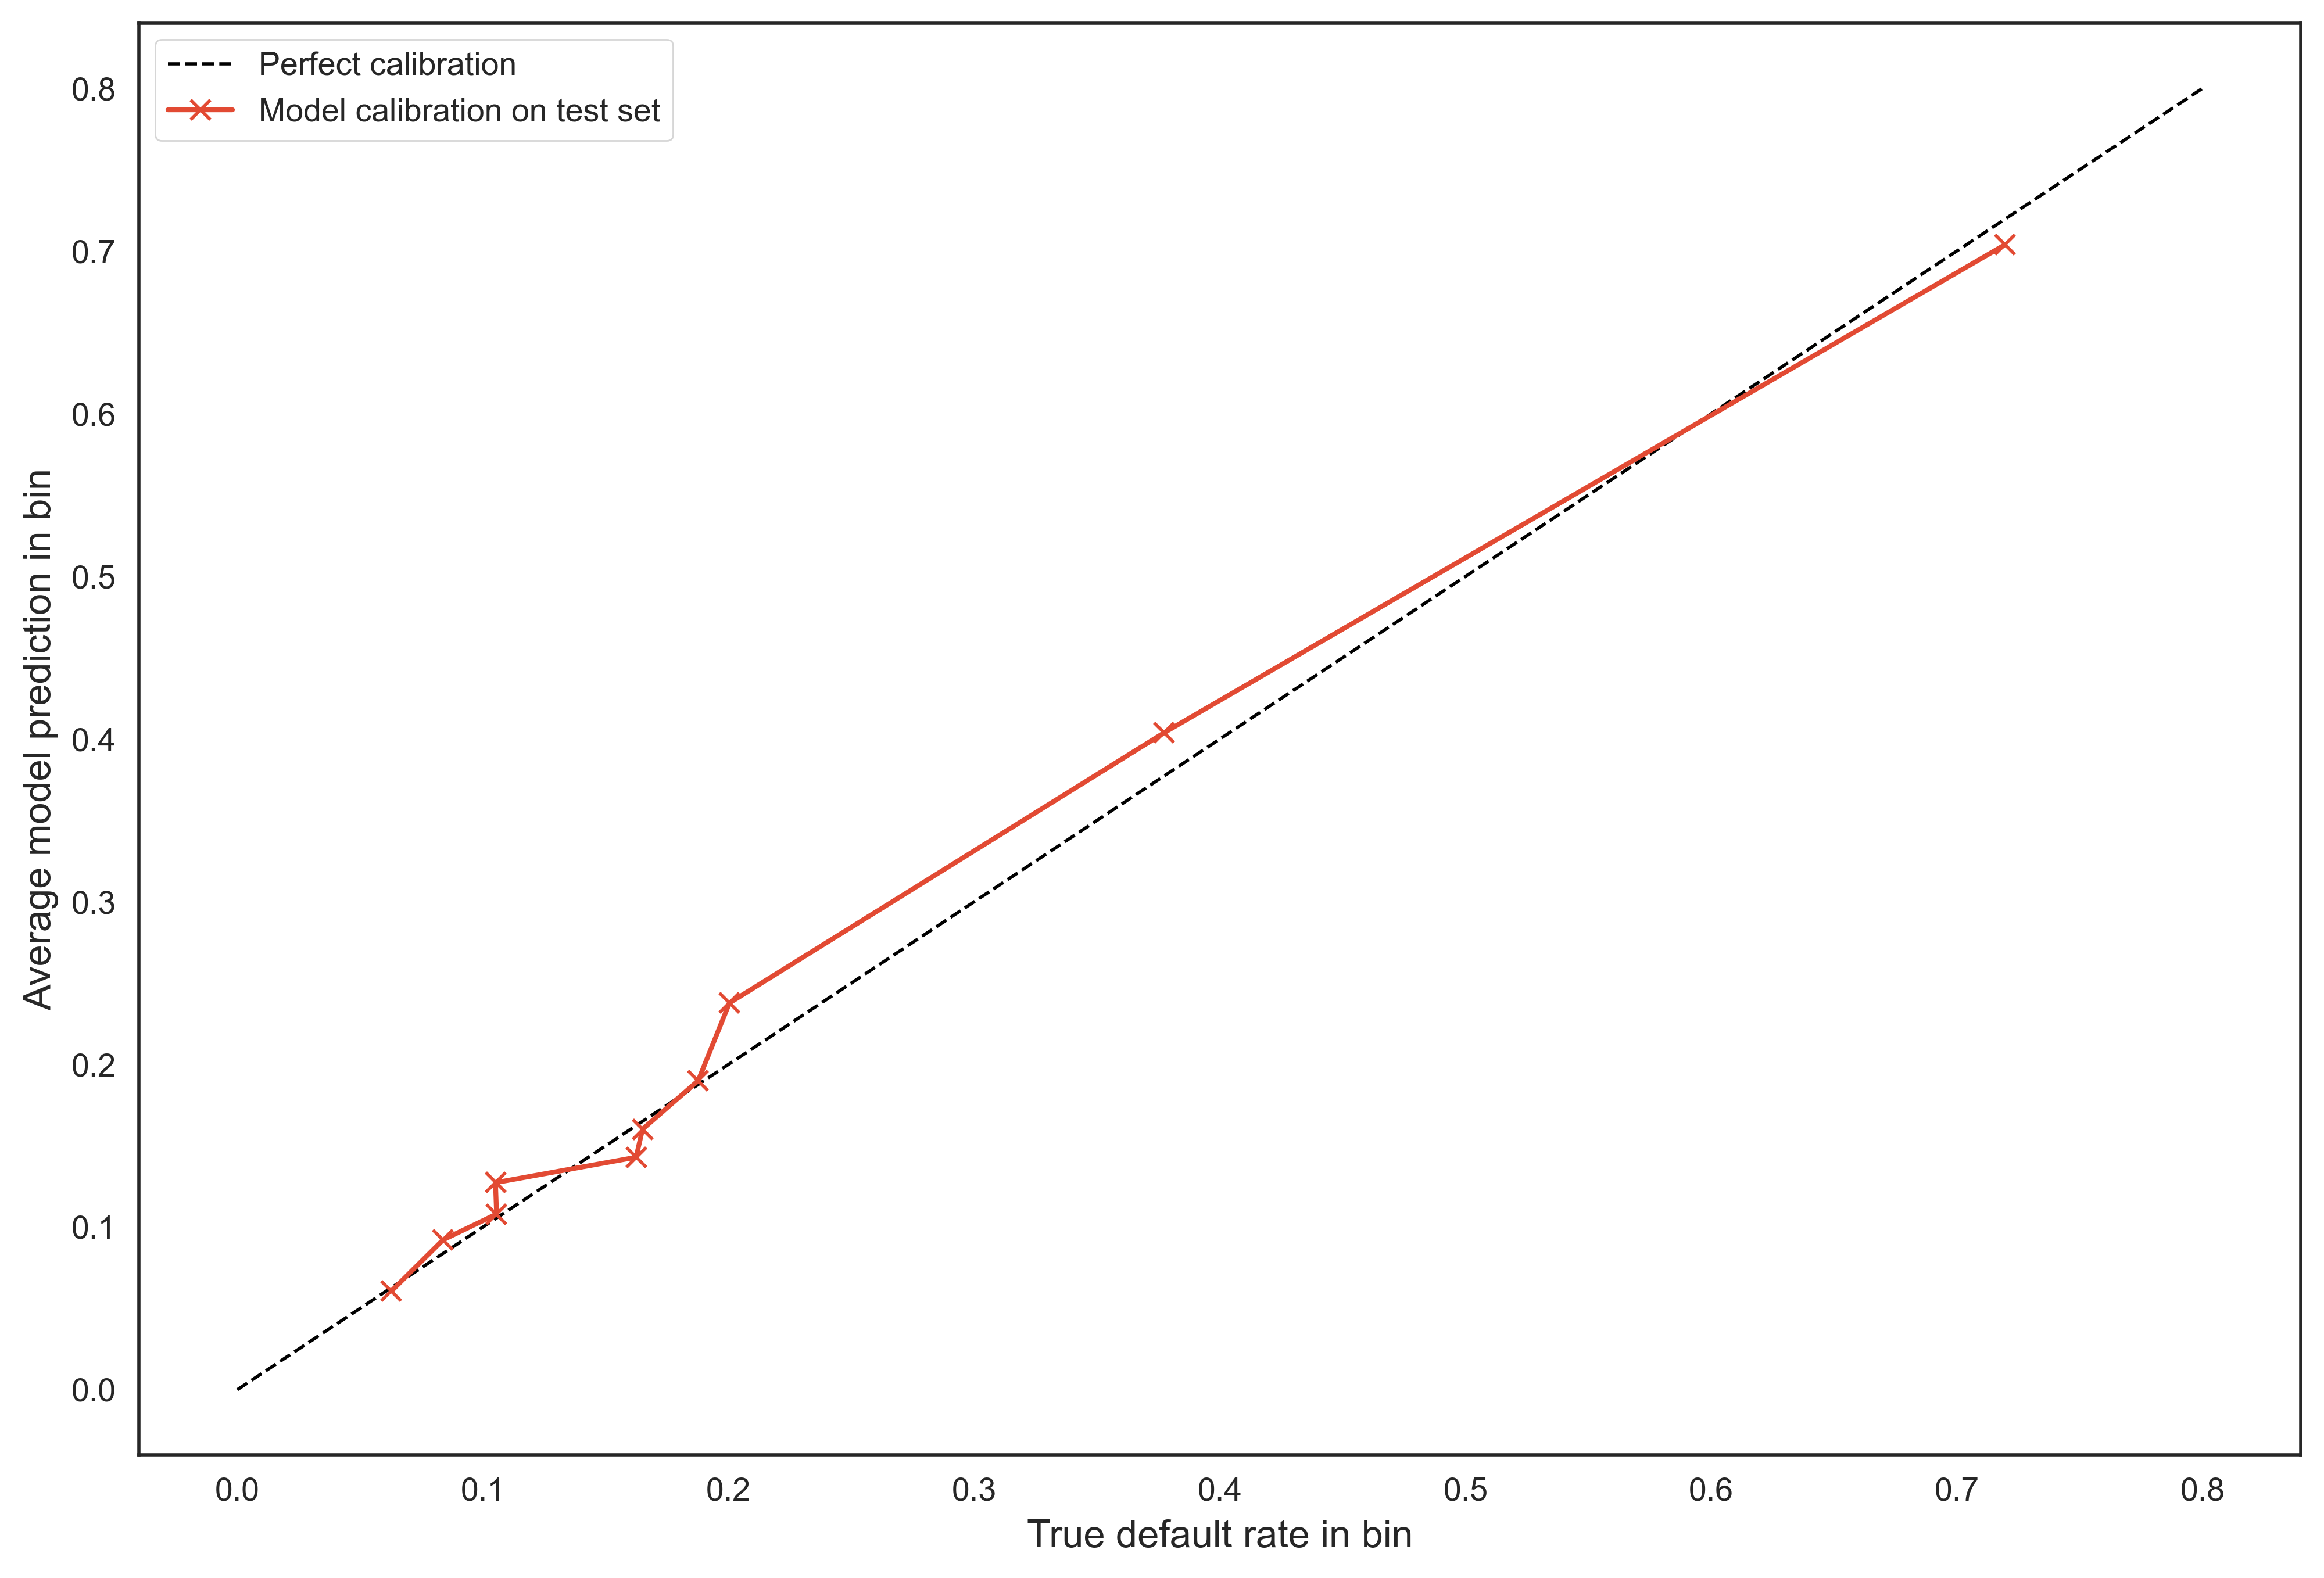

In [144]:
ax = plt.axes()
ax.plot([0, 0.8], [0, 0.8], 'k--', linewidth=1,
label='Perfect calibration')
ax.plot(cal_df[('Outcome', 'mean')],\
cal_df[('Predicted probability', 'mean')],\
marker='x',\
label='Model calibration on test set')
ax.set_xlabel('True default rate in bin')
ax.set_ylabel('Average model prediction in bin')
ax.legend()

Model-predicted probabilities are very close to the true default rates, so the model appears to be well calibrated


In [76]:
# Create 100 thresholds values from 0 to 1
thresholds = np.linspace(0, 1, 101)
thresholds

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [77]:
# Lets assume cost_per_counseling be $7500 & 70% effectiveness we get 
cost_per_counseling = 7500
effectiveness = 0.70
n_pos_pred = np.empty_like(thresholds)
total_cost = np.empty_like(thresholds)
n_true_pos = np.empty_like(thresholds)
total_savings = np.empty_like(thresholds)
counter = 0
for threshold in thresholds:
    pos_pred = test_set_pred_proba > threshold
    n_pos_pred[counter] = sum(pos_pred)
    total_cost[counter]  = n_pos_pred[counter] * cost_per_counseling
    true_pos = pos_pred & y_test.astype(bool)
    n_true_pos[counter] = sum(true_pos)
    total_savings[counter] = np.sum(true_pos.astype(int) * X_test['BILL_AMT_September']  * effectiveness)
    counter += 1

In [78]:
net_savings = total_savings - total_cost

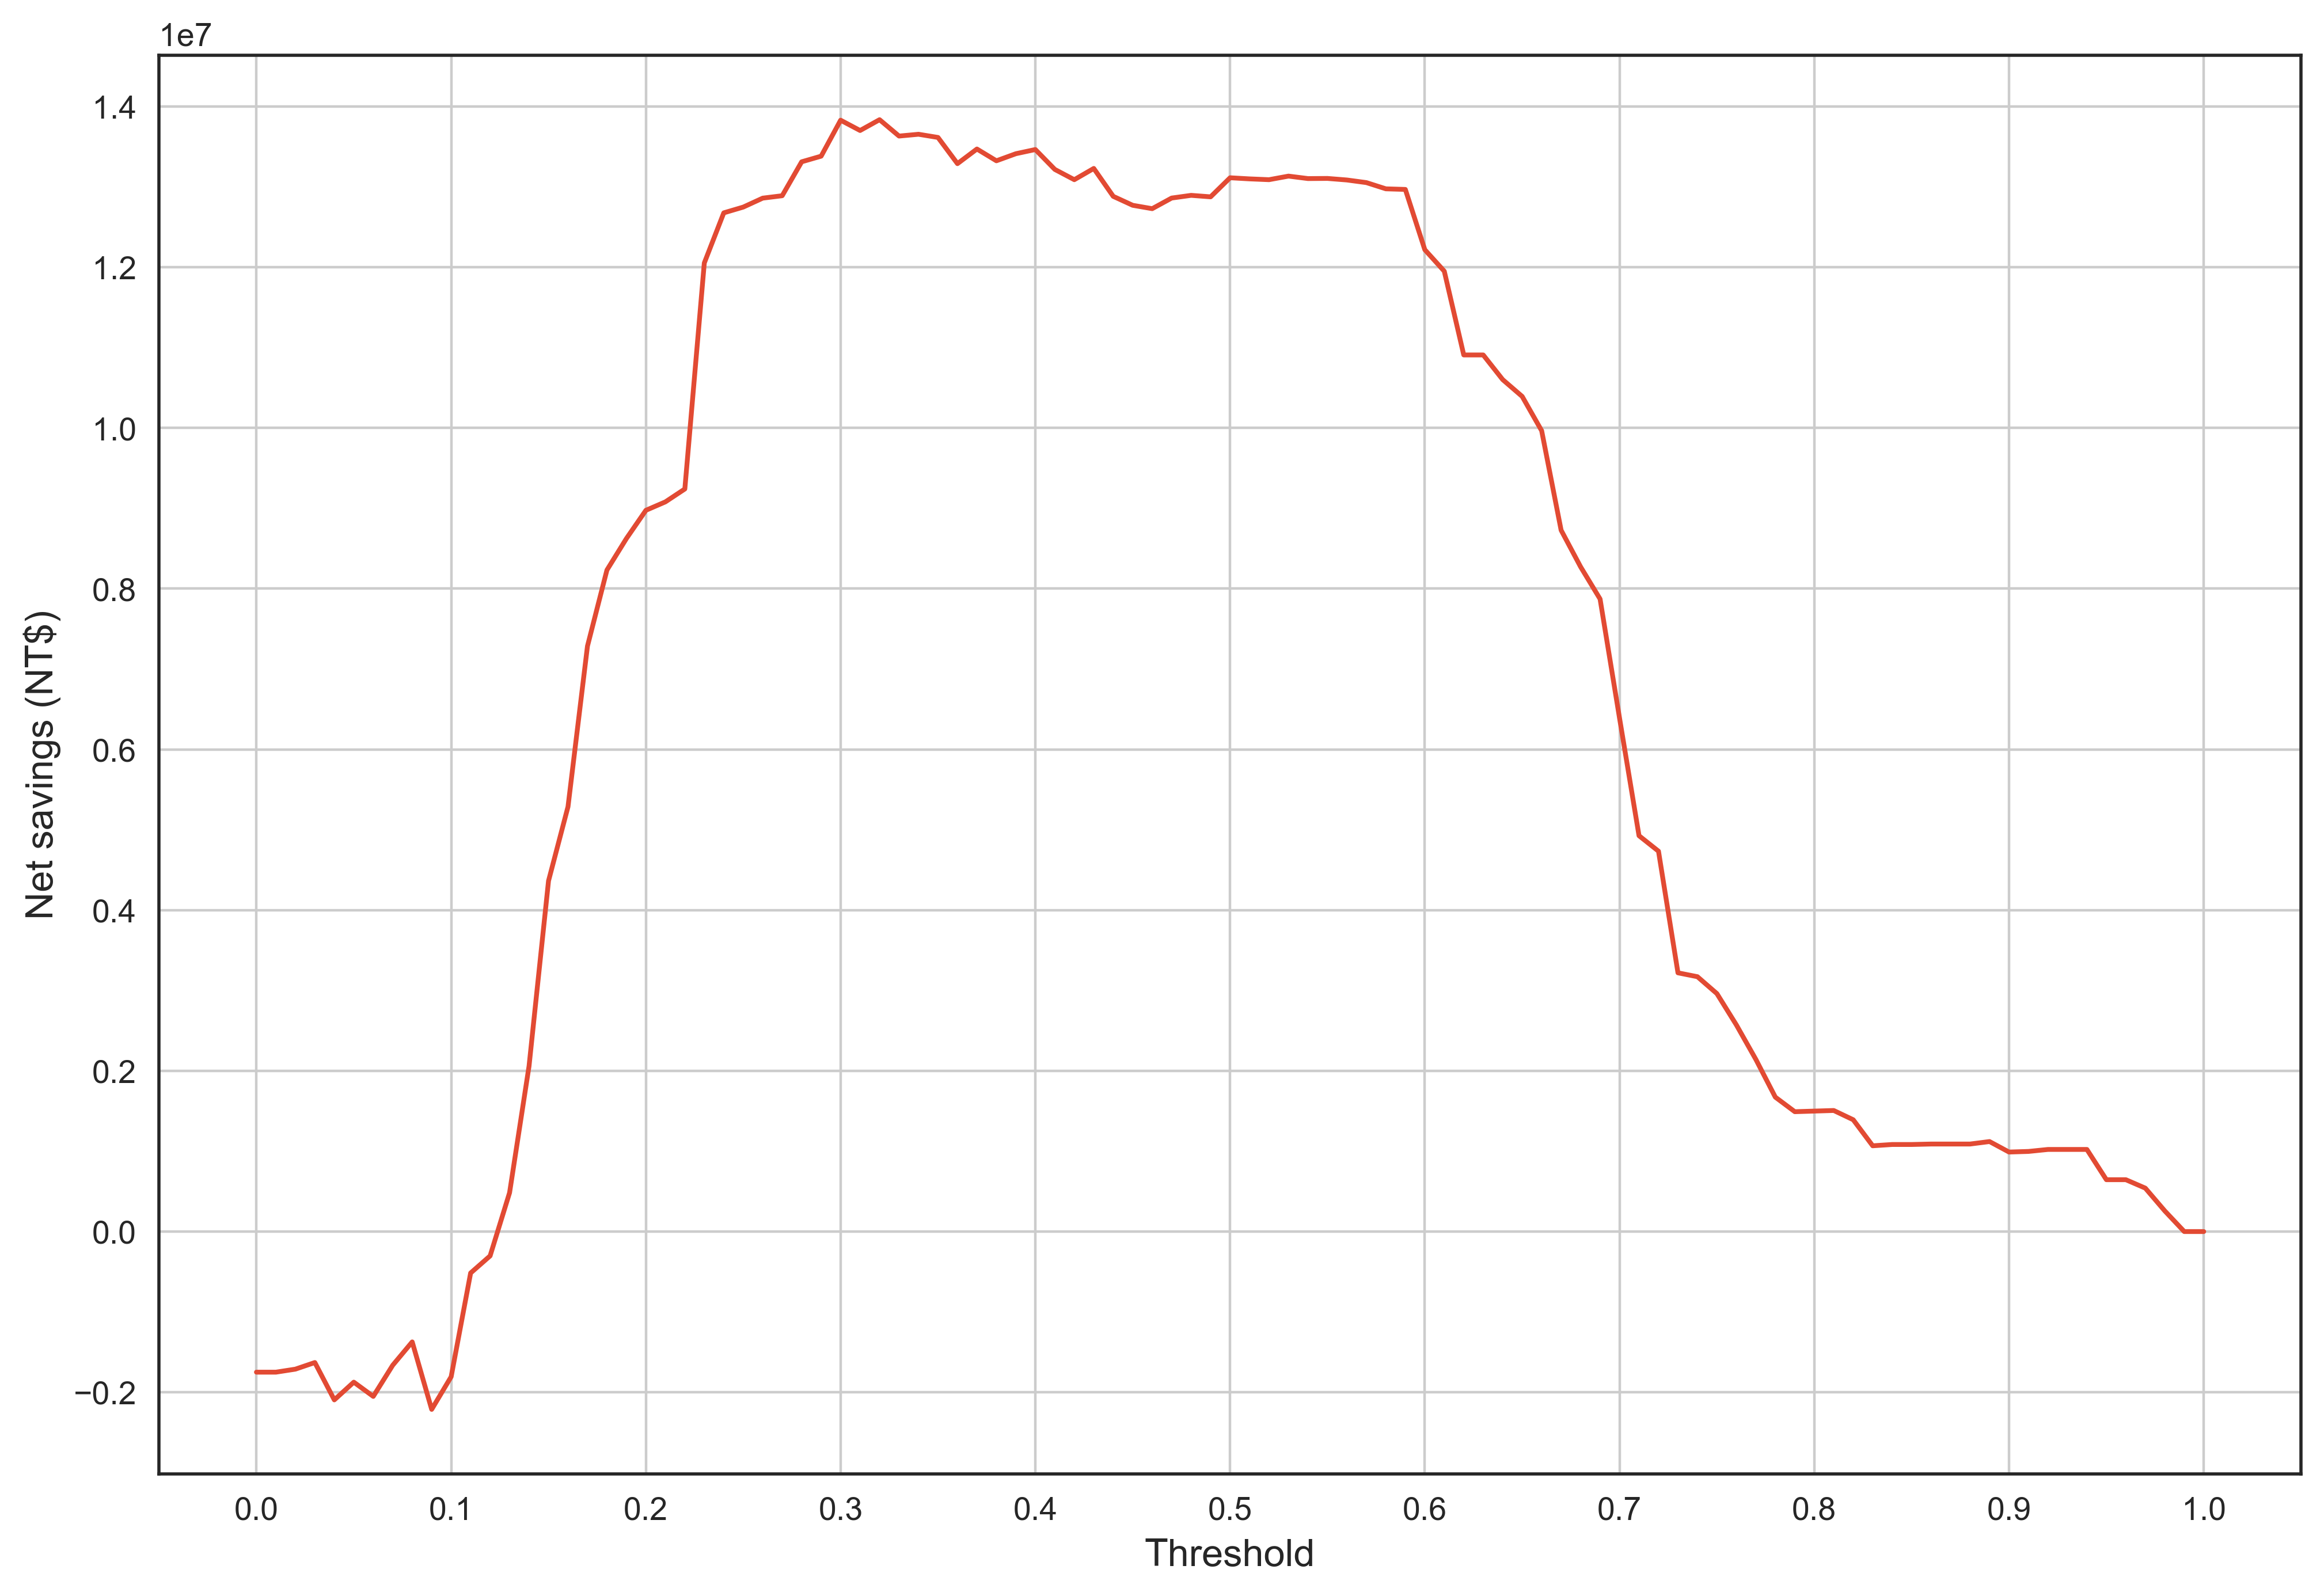

In [79]:
# From below graph max_savings we get $13,836,743.7 @ Threshold set to 0.32
mpl.rcParams['figure.dpi'] = 400
plt.plot(thresholds, net_savings)
plt.xlabel('Threshold')
plt.ylabel('Net savings (NT$)')
plt.xticks(np.linspace(0,1,11))
plt.grid(True)

In [172]:
max_savings_ix = np.argmax(net_savings)
max_savings_ix

32

In [173]:
print("Threshold for max_savings", thresholds[max_savings_ix])
print("Maximum net savings from 0.32 Threshold will be", net_savings[max_savings_ix])

0.32

In [180]:
# cost of all defaults if there were no counseling program
cost_of_defaults = np.sum(y_test * X_test['BILL_AMT_September'])
cost_of_defaults
# 60587763.0

61786034

cost of all defaults if there were no counseling program is $61,786,034

In [181]:
y_test.value_counts()

0    4703
1    1297
Name: Target, dtype: int64

In [182]:
# percent the cost of defaults can be decreased by the counseling program
net_savings[max_savings_ix]/cost_of_defaults

0.22394613805443475

In [183]:
net_savings[max_savings_ix]

13836743.7

Total net_savings from our model in given test dataset is $13,836,743.7


In [184]:
net_savings[max_savings_ix]/len(y_test)

2306.1239499999997

Net savings per account at the optimal threshold relative to the whole test is $2,306.12

Text(0, 0.5, 'Net savings per account (NT$)')

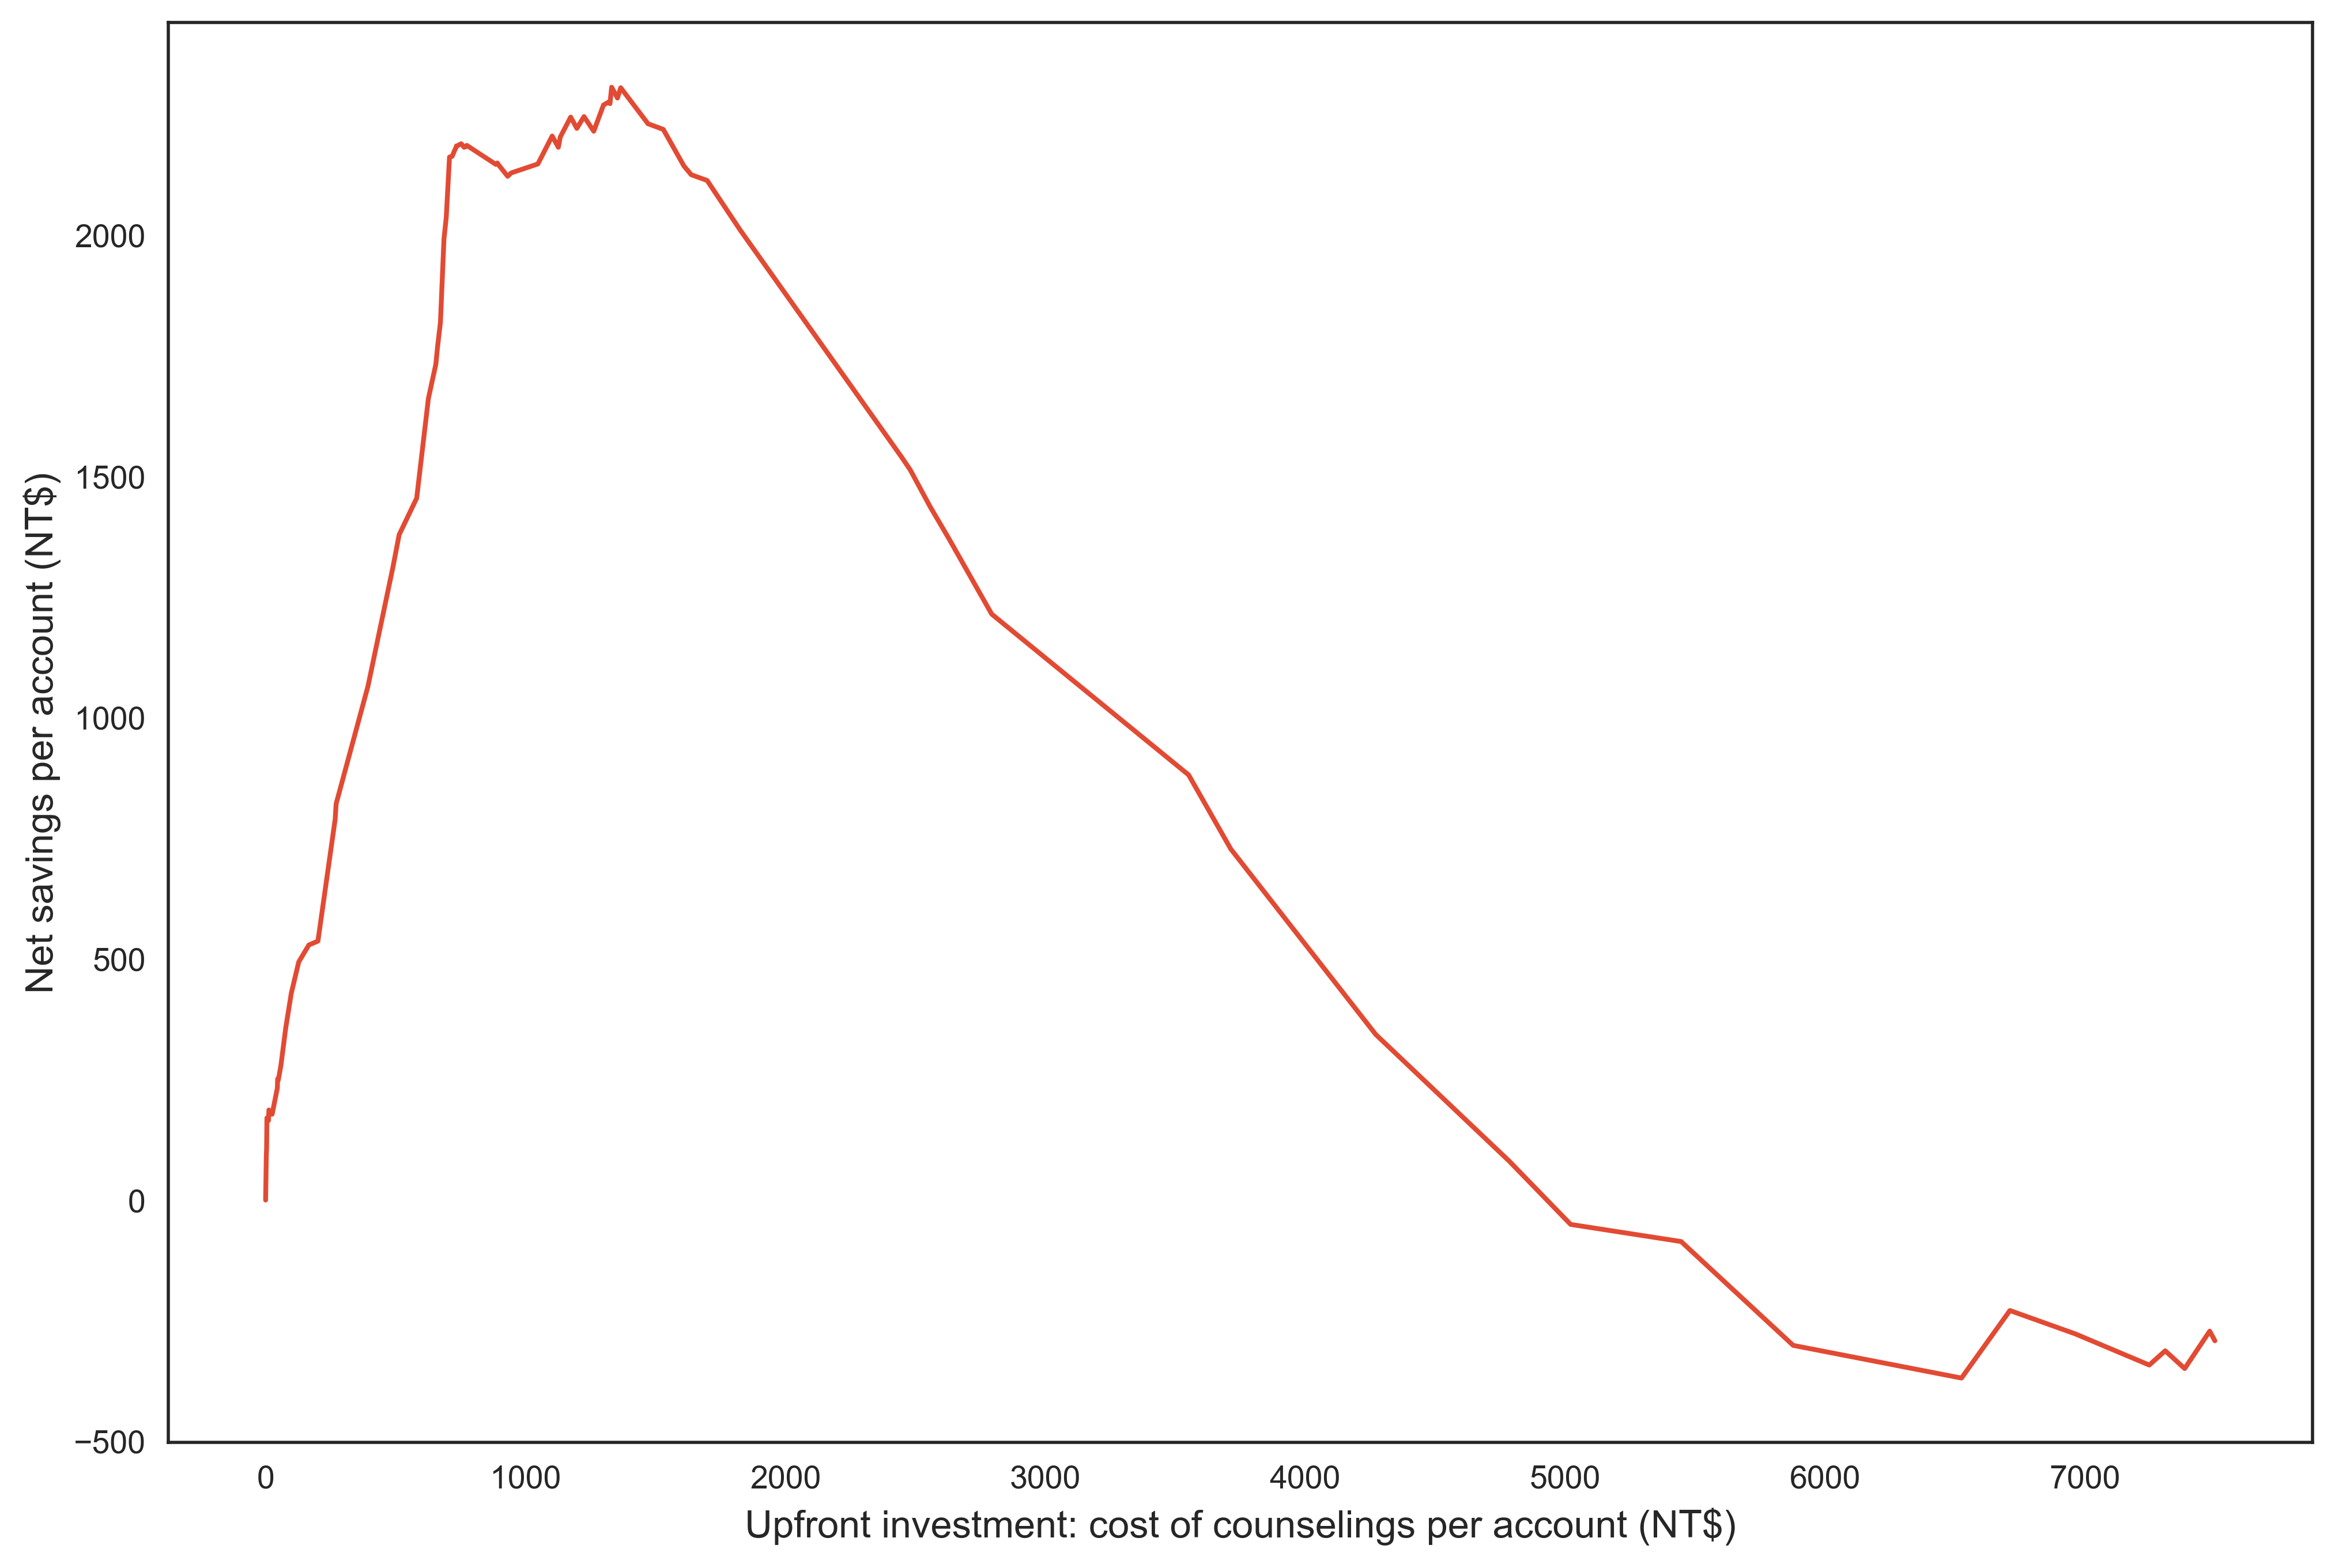

In [186]:
# Net savings per account against the cost of counseling per account for each threshold
plt.plot(total_cost/len(y_test),net_savings/len(y_test))
plt.xlabel('Upfront investment: cost of counselings per account (NT$)')
plt.ylabel('Net savings per account (NT$)')

Text(0.5, 0, 'Threshold')

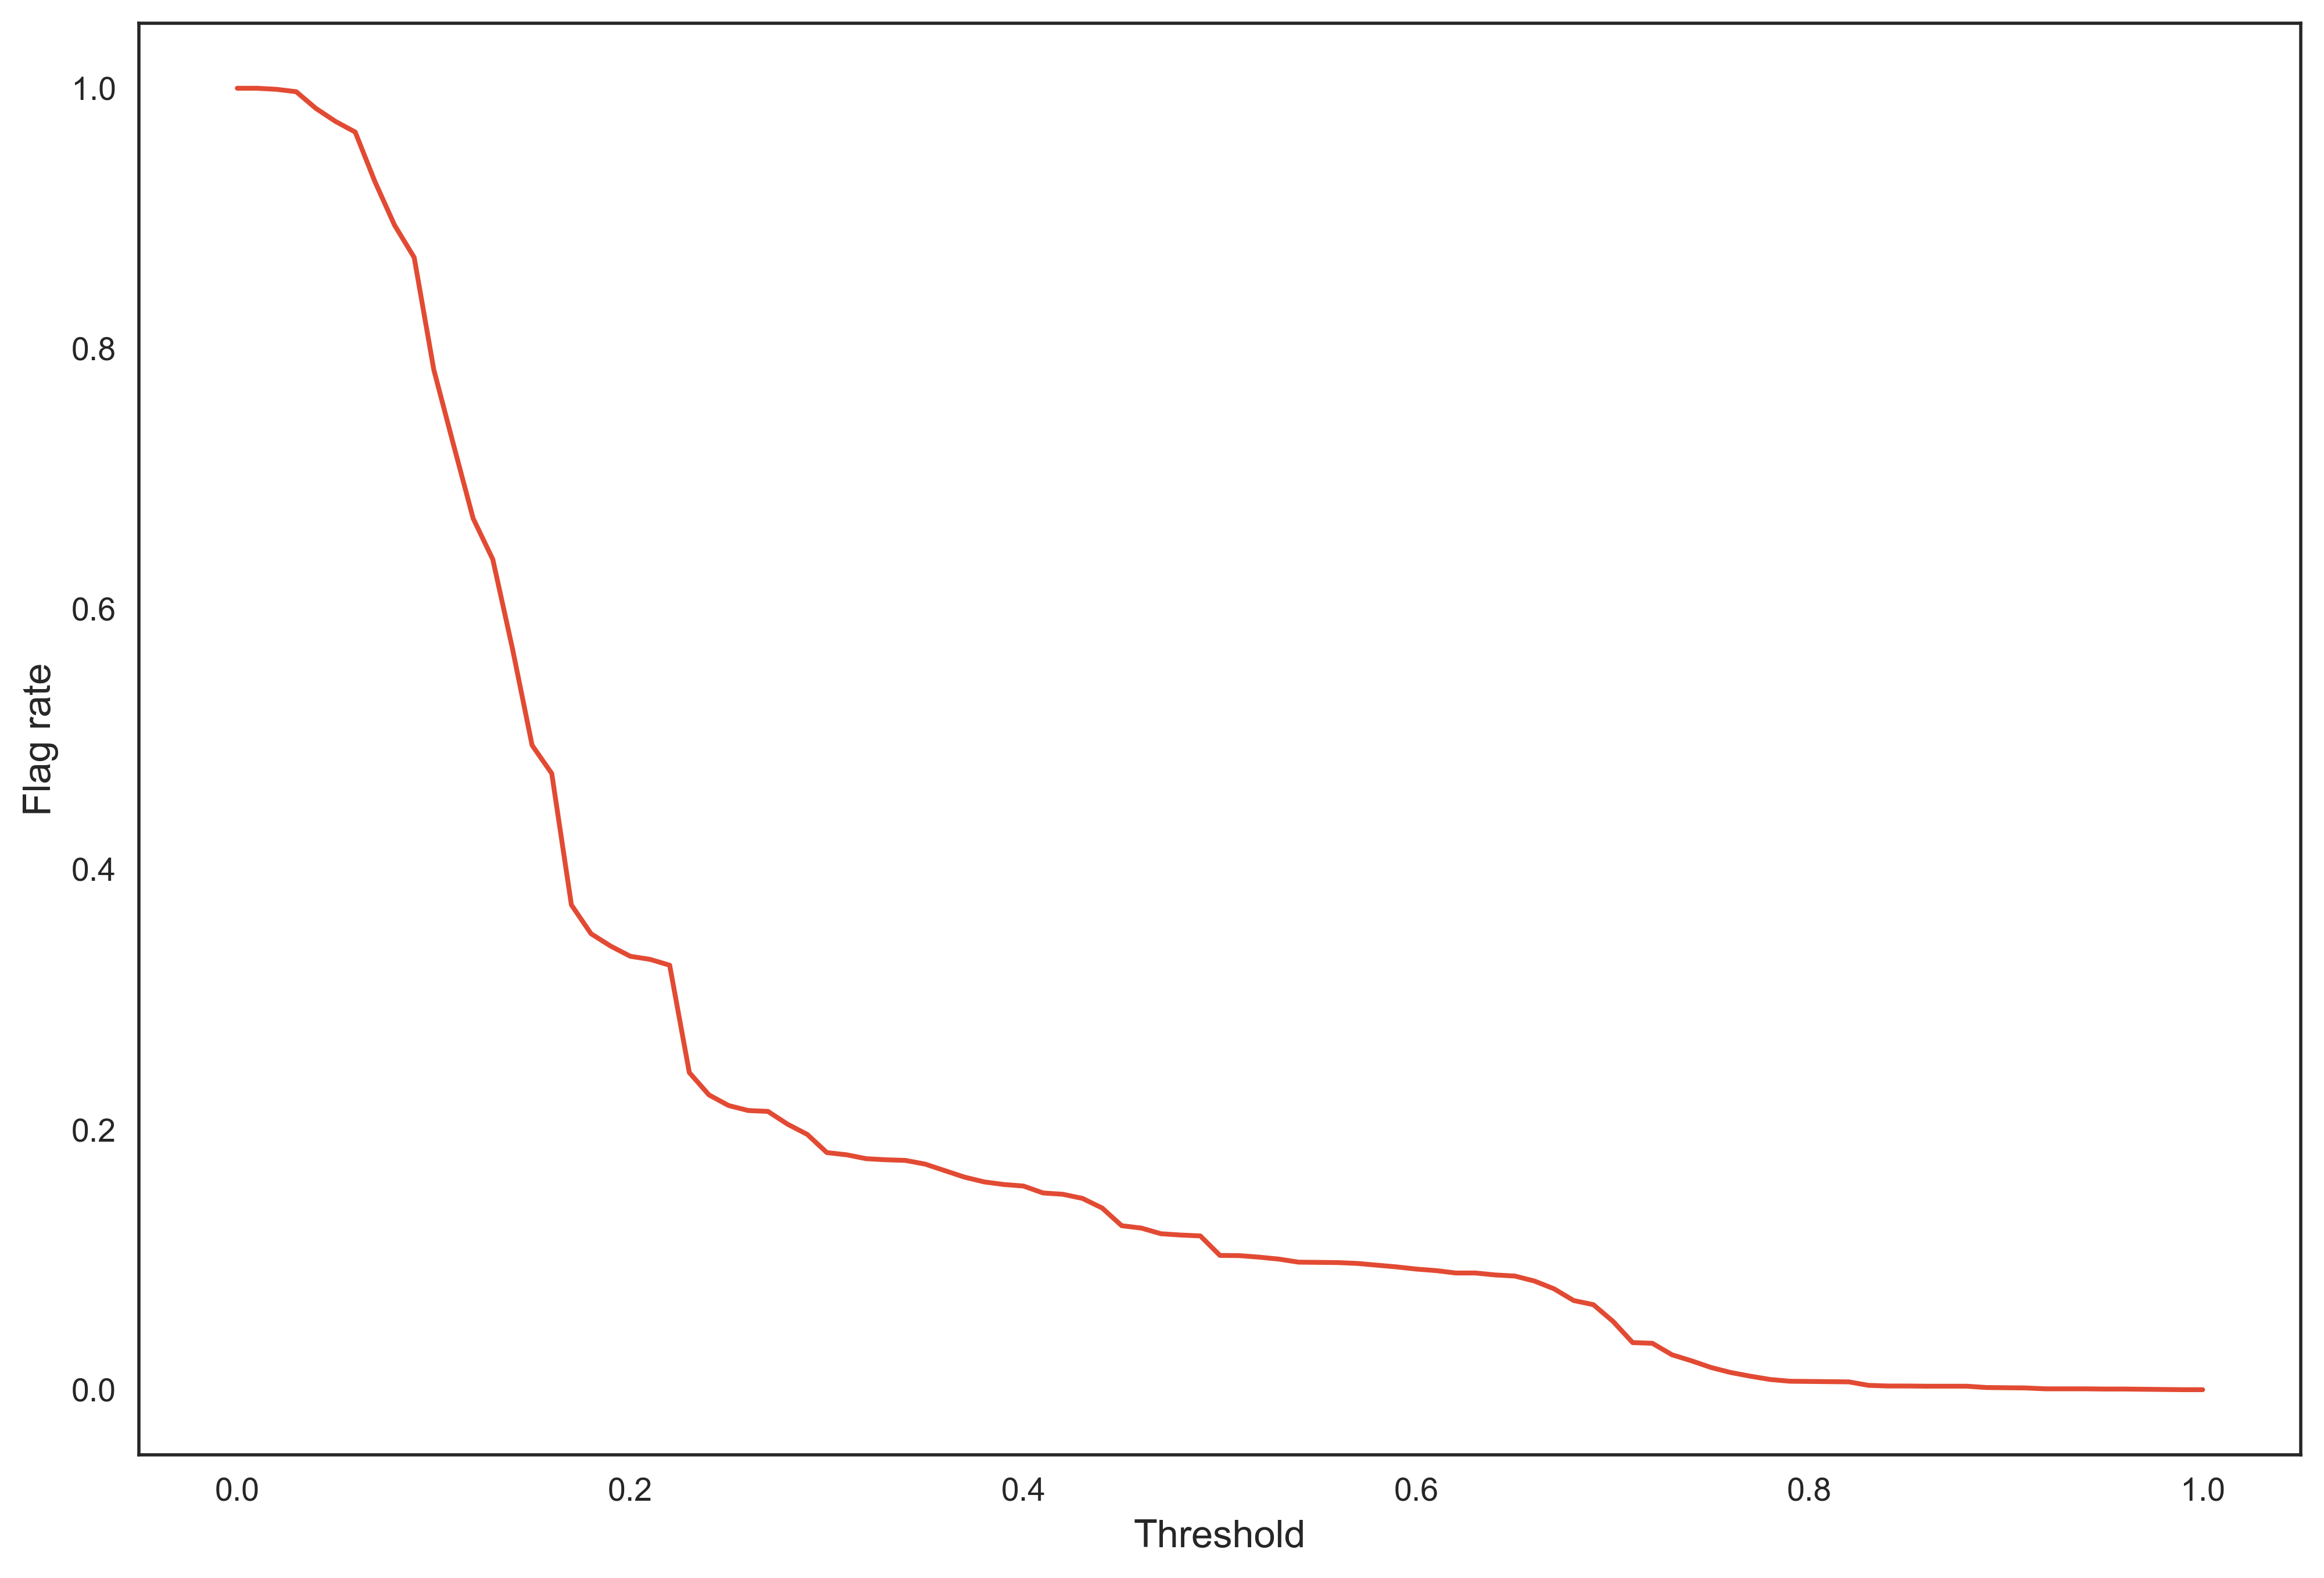

In [80]:
# Fraction of accounts predicted as positive (this is called the "flag rate") at each threshold
plt.plot(thresholds, n_pos_pred/len(y_test))
plt.ylabel('Flag rate')
plt.xlabel('Threshold')

Set the optimal threshold of 0.32, only about 20% of accounts will be flagged for counseling.

Text(0, 0.5, 'Precision')

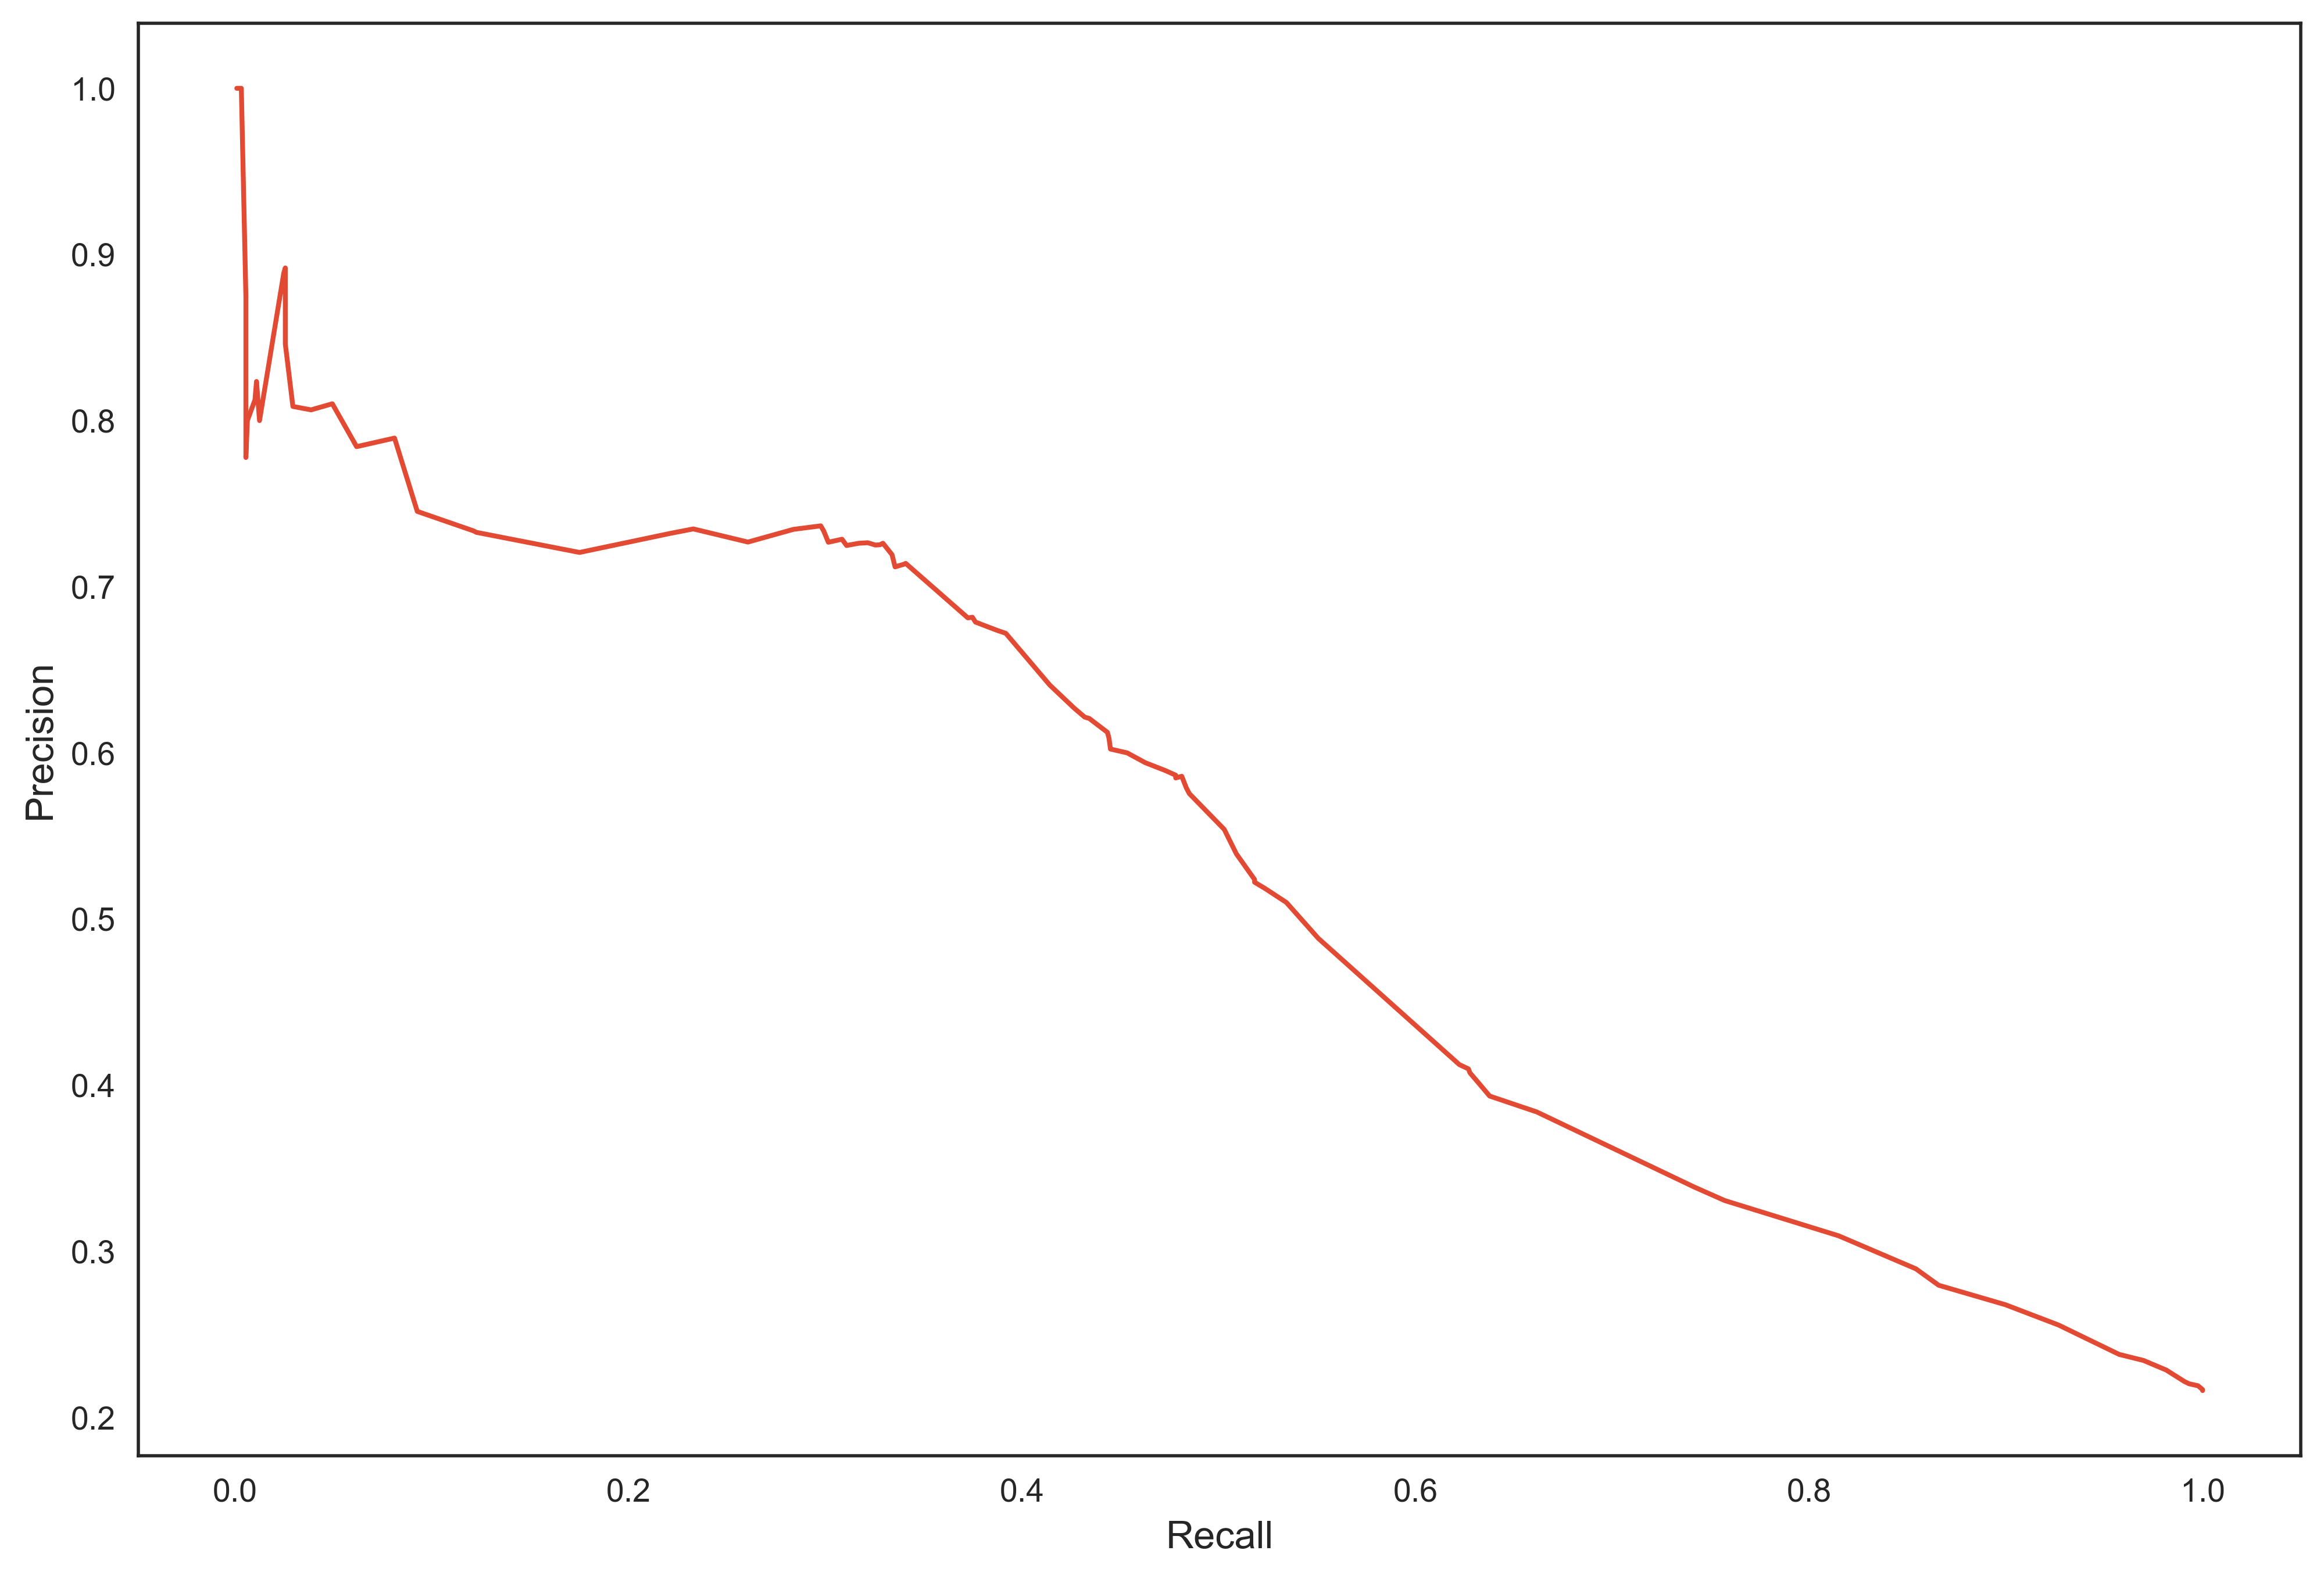

In [188]:
plt.plot(n_true_pos/sum(y_test),\
np.divide(n_true_pos, n_pos_pred))
plt.xlabel('Recall')
plt.ylabel('Precision')

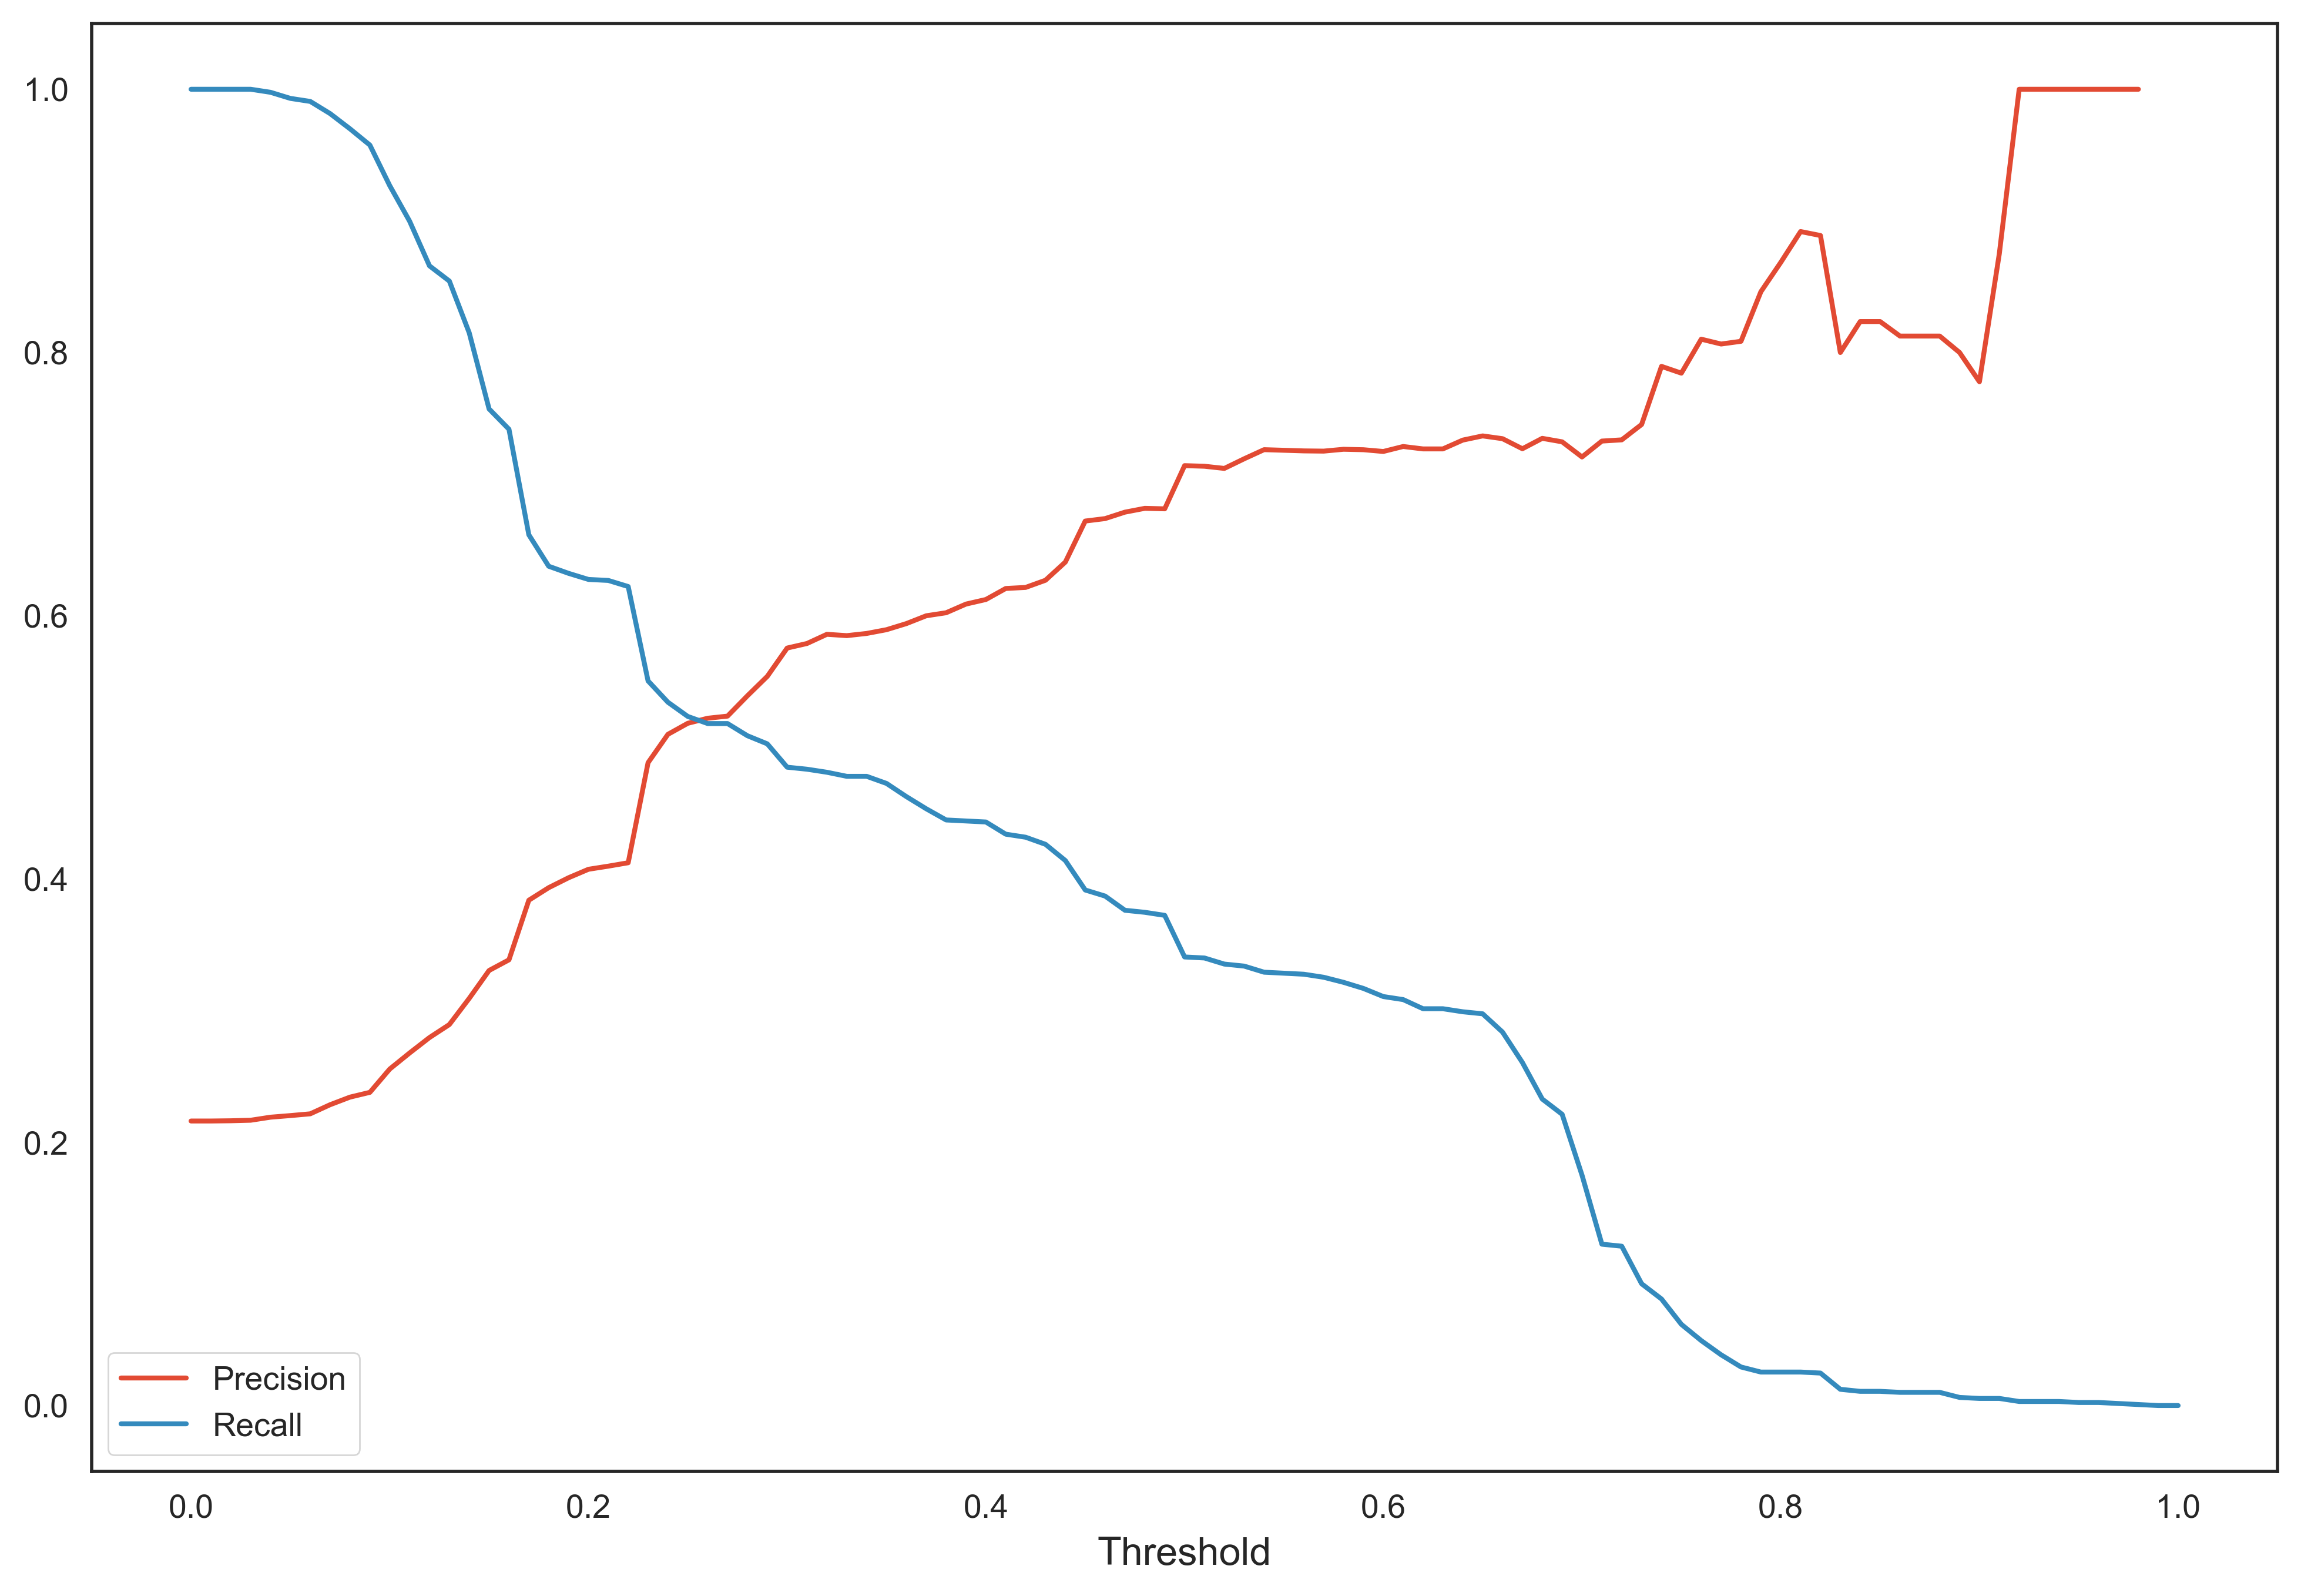

In [189]:
# precision and recall separately on the y-axis against threshold on the x-axis
plt.plot(thresholds, np.divide(n_true_pos, n_pos_pred),
label='Precision')
plt.plot(thresholds, n_true_pos/sum(y_test),
label='Recall')
plt.xlabel('Threshold')
plt.legend()


It shows as same optimal threshold will be 0.32